In [3]:
import numpy as np
print(np.__config__.get_info("blas_opt"))  # Should show 'accelerate'

AttributeError: module 'numpy.__config__' has no attribute 'get_info'

In [4]:
import numpy as np
np.show_config()

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /opt/anaconda3/include
    lib directory: /opt/anaconda3/lib
    name: openblas
    openblas configuration: USE_64BITINT= DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK=0 NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP=0 VORTEX MAX_THREADS=128
    pc file directory: /opt/anaconda3/lib/pkgconfig
    version: 0.3.21
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep4408414224
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -ftree-vectorize, -fPIC, -fPIE, -fstack-protector-strong, -O2, -pipe, -isystem,
      /opt/anaconda3/include, -fdebug-prefix-map=/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a51i_mbs7m/croot/numpy_and_numpy_base_1708638620867/work=/usr/local/src/conda/numpy-base-1.26.4,
      -fdebug-prefix-map=/opt/anaconda3=/usr/local/src/c

In [2]:
import numpy as np
import time

N = 2000
a = np.random.rand(N, N)
b = np.random.rand(N, N)

start = time.time()
c = np.dot(a, b)
end = time.time()

print(f"Time taken: {end - start:.3f} seconds")


Time taken: 0.111 seconds


In [4]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


ModuleNotFoundError: No module named 'tensorflow'

In [8]:
# import typing_extensions
# print(typing_extensions.__version__)
import tensorflow as tf
print(tf.__version__)
# import torch
# print(torch.__version__)
#
# # torch.device("mps")

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
#####################################################################################################################
#                                                                                                                   #
# Libraries                                                                                                         #
#                                                                                                                   #
#####################################################################################################################
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.rcParams['figure.dpi'] = 200 # Plot resolution (dpi)
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import random
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.vector_ar.var_model import VAR # Import VAR class
from tensorflow.keras import layers, Model, Input
import tensorflow as tf
from tensorflow.keras.regularizers import l2

import shap

# Surpressing Warnings
import warnings
import tensorflow as tf

from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
# Suppress Keras UserWarning about input shape in RNN layers
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

# Suppress statsmodels ValueWarning about no frequency information
warnings.filterwarnings("ignore", category=ValueWarning, module='statsmodels')

# Suppress statsmodels ConvergenceWarning about optimization failure
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='statsmodels')

# To suppress all TensorFlow warnings
# warnings.filterwarnings('ignore', category=tf.errors.UserWarning)
warnings.filterwarnings('ignore', message="6 out of the last .* calls to .* triggered tf.function retracing.*", category=UserWarning)



ModuleNotFoundError: No module named 'sklearn'

# Loading Transformed Data

In [2]:

file_path = '/Users/bodamjerry/Downloads/GermanyMacroData/'
os.chdir(file_path)
print(f"Current working directory: {os.getcwd()}")

t_Data_Dir = 'TData/'
r_State_Dir = "RState/"
all_LagsHICP_Dir = "AllLagsHICP/"
all_LagsCPI_Dir = "AllLagsCPI/"
# all_LagsNonNormCPI_Dir = "AllLagsNNCPI/"
# all_LagsNonNormHICP_Dir = "AllLagsNNHICP/"

data = pd.read_csv(filepath_or_buffer = t_Data_Dir + 'full_data_norm.csv')
data_acf_pacf = pd.read_csv(filepath_or_buffer = t_Data_Dir + 'full_cf_lags_data_norm.csv')

# Consider Creating CSV for Data Description
df_date = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
data_acf_pacf.set_index('DATE', inplace=True)
print(data.shape)
print(data.columns)


Current working directory: /Users/bodamjerry/Downloads/GermanyMacroData
(304, 115)
Index(['UNERWG', 'ECBIRRO', 'ECBDFR', 'ECBMLFR', 'MMR', 'CPI', 'RETAILMV',
       'RETAILXMV', 'RETAILGSR', 'RETAILGF',
       ...
       'ECBMLFR_L1', 'ECBMLFR_L2', 'ECBMLFR_L3', 'ECBMLFR_L4', 'ECBMLFR_L5',
       'HICP_L1', 'HICP_L2', 'HICP_L3', 'HICP_L4', 'HICP_L5'],
      dtype='object', length=115)


# Utility Functions

In [3]:

sns.set_theme(style="whitegrid") # Apply seaborn visual theme

def plot_forecast(forecasted_series, actual_series, title_name='Forecasted vs Actual CPIAUCSL'):

    fig = plt.figure(figsize=(12, 6)) # Store figure object

    actual_series.index = pd.to_datetime(actual_series.index) # Try converting to DateTimeIndex

    plt.plot(actual_series.index, forecasted_series, label='Forecasted', color='#e41a1c', linestyle='dashed', linewidth=2) # Red for forecast
    plt.plot(actual_series.index, actual_series, label='Actual', color='#377eb8', linestyle='solid', linewidth=2) # Blue for actual

    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.title(title_name, fontsize=12)

    # Date formatting for x-axis (using logic from your improved plot_series)
    ax = plt.gca()
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=90, ha='right', fontsize=10) # Rotate x-axis labels, adjust font size
    plt.gcf().autofmt_xdate() # Auto-format dates

    plt.legend(fontsize=10, frameon=True, shadow=False, edgecolor='black')
    plt.grid(True, linestyle='--', alpha=0.7, color='gray')

    # Customize Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

    plt.tight_layout() # Adjust layout

    return fig # Return the figure object (do NOT use plt.show() here if you want to control display later)

def plot_observed_vs_fitted_var(var_model_fit, train_df, target_column='CPIAUCSL', title='VAR Model - Observed vs Fitted (Training)'):

    fitted_values = var_model_fit.fittedvalues # Get fitted values from the VAR model
    observed_train = train_df[target_column]   # Observed values from the training data

    # Extract fitted values for the target column
    fitted_cpiauscl = fitted_values[target_column]

    # Ensure index is DateTimeIndex if possible (align with actual_series index if needed)
    try:
        fitted_cpiauscl.index = pd.to_datetime(fitted_cpiauscl.index)
        observed_train.index = pd.to_datetime(observed_train.index) # Align observed index too for plotting
        if not fitted_cpiauscl.index.equals(observed_train.index): # If indexes still not the same, try to align based on actual index
            fitted_cpiauscl.index = observed_train.index # Force index alignment for plotting if possible
    except ValueError:
        print("Warning: Could not convert index to DateTime for Observed vs Fitted plot.")
        pass # Plot without DateTimeIndex if conversion fails

    fig = plt.figure(figsize=(12, 6))

    plt.plot(observed_train.index, observed_train, label="Observed (Train)", linestyle="solid", linewidth=2) # Blue for observed
    plt.plot(fitted_cpiauscl.index, fitted_cpiauscl, label="Fitted (Train)", linestyle="solid", linewidth=2) # Green for fitted

    plt.title(title, fontsize=12)
    plt.xlabel("Date", fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.legend(fontsize=10, frameon=True, shadow=False, edgecolor='black')
    plt.grid(True, linestyle='--', alpha=0.7, color='gray')

    # Date formatting for x-axis
    ax = plt.gca()
    locator = mdates.AutoDateLocator() # Use observed_train index for locator
    ax.xaxis.set_major_locator(locator)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.gcf().autofmt_xdate()

    # Customize Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

    plt.tight_layout()
    plt.show()
    return fig

def plot_predictions(y_actual, y_pred, train_index, title='CNN-LSTM: Actual vs Forecasted Values'):
    """Plots actual vs forecasted values."""
    train_index = pd.to_datetime(train_index)
    fig = plt.figure(figsize=(12, 6))
    plt.plot(train_index, y_actual, label='Actual', color='blue', linestyle='solid')
    plt.plot(train_index, y_pred, label='Forecasted', color='red', linestyle='dashed')

    ax = plt.gca()
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.gcf().autofmt_xdate()

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(title, fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.show()
    return fig

def plot_loss(history):
    # Plots loss function
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM - Loss (MSE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    plt.close()

def plot_observed_vs_fitted(y_train, predictions_train, train_index):
    fig = plt.figure(figsize=(12, 6))
    train_index = pd.to_datetime(train_index)
    plt.plot(train_index, y_train, label="Observed (Train)", linestyle="solid")
    plt.plot(train_index, predictions_train, label="Fitted (Train)", linestyle="solid")
    plt.title("CNN-LSTM - Observed vs. Fitted Values")

    ax = plt.gca()
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    return fig

def plot_arima_observed_vs_fitted(arima_model_fit, train_data, target_column, title='ARIMA Model - Observed vs Fitted (Training)'):
    """
    Plots observed vs fitted values for an ARIMA model on the training data,
    handling cases where fittedvalues might not have an index and ensuring index alignment.
    Includes enhanced index debugging.
    """

    observed_train = train_data[target_column] if isinstance(train_data, pd.DataFrame) else train_data # Handle DataFrame or Series input for train_data
    fitted_series = arima_model_fit.fittedvalues    # Ensure only train data is plotted (if fittedvalues has more values)

    num_values_to_keep = observed_train.index.shape[0]
    fitted_series_train = fitted_series[:num_values_to_keep]

    fitted_series_reduced = pd.Series(fitted_series_train, index=observed_train.index)

    # Extract fitted values for the target column
    fig = plt.figure(figsize=(12, 6))

    plt.plot(observed_train.index, observed_train, label="Observed (Train)", linestyle="solid", linewidth=2) # Blue for observed
    plt.plot(fitted_series_reduced.index, fitted_series_train, label="Fitted (Train)", linestyle="solid", linewidth=2) # Green for fitted

    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(fontsize=10, frameon=True, shadow=False, edgecolor='black')
    plt.grid(True, linestyle='--', alpha=0.7, color='gray')

    # Date formatting for x-axis
    ax = plt.gca()
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.gcf().autofmt_xdate()

    # Customize Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

    plt.tight_layout()
    return fig


# Creating Train and Test Data

In [4]:
main_vars = ['GOODFBT', 'ECBIRRO', 'UNERWG', 'IPI', 'LTIR', 'RETAILGSR', 'RETAILXMV', 'ECBDFR', 'MMR', 'RETAILMV', 'AGRPROD', 'EPI', 'RETAILGF', 'PPIIP', 'UR', 'WPI', 'ECBMLFR', 'HICP', 'CPI_t+1']

s_df = pd.read_csv(filepath_or_buffer = all_LagsCPI_Dir + 'dfCPI_full_dataset_subsample_1.csv')
s_df.set_index('DATE', inplace=True)

In [5]:
data_m = s_df[main_vars]
# print(data.columns)
# target = "dfCPI_L1"
target = "CPI_t+1"
target_hicp = "HICP_t+1"
# data = data.drop(columns="HICP")
# target = horizon_name

In [6]:

# test_size = int(len(data_m) * 0.2)  # Convert percentage to absolute count
test_size = 12  # Convert percentage to absolute count
train_df = data_m.iloc[:-test_size]
test_df = data_m.iloc[-test_size:]

print(train_df.shape)
print(test_df.shape)


(160, 19)
(12, 19)


In [7]:
print(train_df[target].tail())
print(test_df[target].head())


DATE
2015-04-01   -0.105308
2015-05-01    0.003141
2015-06-01    0.435869
2015-07-01   -0.540245
2015-08-01    0.326828
Name: CPI_t+1, dtype: float64
DATE
2015-09-01    0.110345
2015-10-01   -0.759937
2015-11-01    1.308218
2015-12-01   -1.418841
2016-01-01    1.866083
Name: CPI_t+1, dtype: float64


# VAR Model Training & Testing
Given that we need more observations than parameters. A rough formula:

Required observations > lag_order × num_variables²

We need to reduce the maxlags or number of variables.


In [8]:

model = VAR(train_df)

# AIC based lag order (your original code)
lag_order_aic = model.select_order(maxlags=5).aic
print(f"AIC-based Lag Order: {lag_order_aic}")

# BIC based lag order
lag_order_bic = model.select_order(maxlags=5).bic
print(f"BIC-based Lag Order: {lag_order_bic}")

# HQIC based lag order
lag_order_hqic = model.select_order(maxlags=5).hqic
print(f"HQIC-based Lag Order: {lag_order_hqic}")

# Choose the lag order based on the criteria you prefer or by comparing performance with different lag orders.
var_lag_order = lag_order_aic # or lag_order_bic, or lag_order_hqic
var_model = model.fit(var_lag_order)
print(var_lag_order)

# var_model.summary()


AIC-based Lag Order: 5
BIC-based Lag Order: 0
HQIC-based Lag Order: 0
5


In [9]:

def var_forecast(model, train_df, test_df, lag_order, forecast_horizon):

    input_data = train_df.values[-lag_order:]
    forecast = model.forecast(y=input_data, steps=forecast_horizon)

    # Build forecast DataFrame
    forecast_df = pd.DataFrame(forecast, columns=train_df.columns, index=test_df.index)

    # -------------------------------
    # EVALUATE ON TARGET
    # -------------------------------
    actual_cpi = test_df[target]
    forecasted_cpi = forecast_df[target]

    # Compute evaluation metrics
    mae = mean_absolute_error(actual_cpi, forecasted_cpi)
    rmse = np.sqrt(mean_squared_error(actual_cpi, forecasted_cpi))

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    return model, forecasted_cpi, actual_cpi, train_df, mae, rmse



# ***Results***


Mean Absolute Error (MAE): 0.756948412807667
Root Mean Squared Error (RMSE): 0.9314239850959212


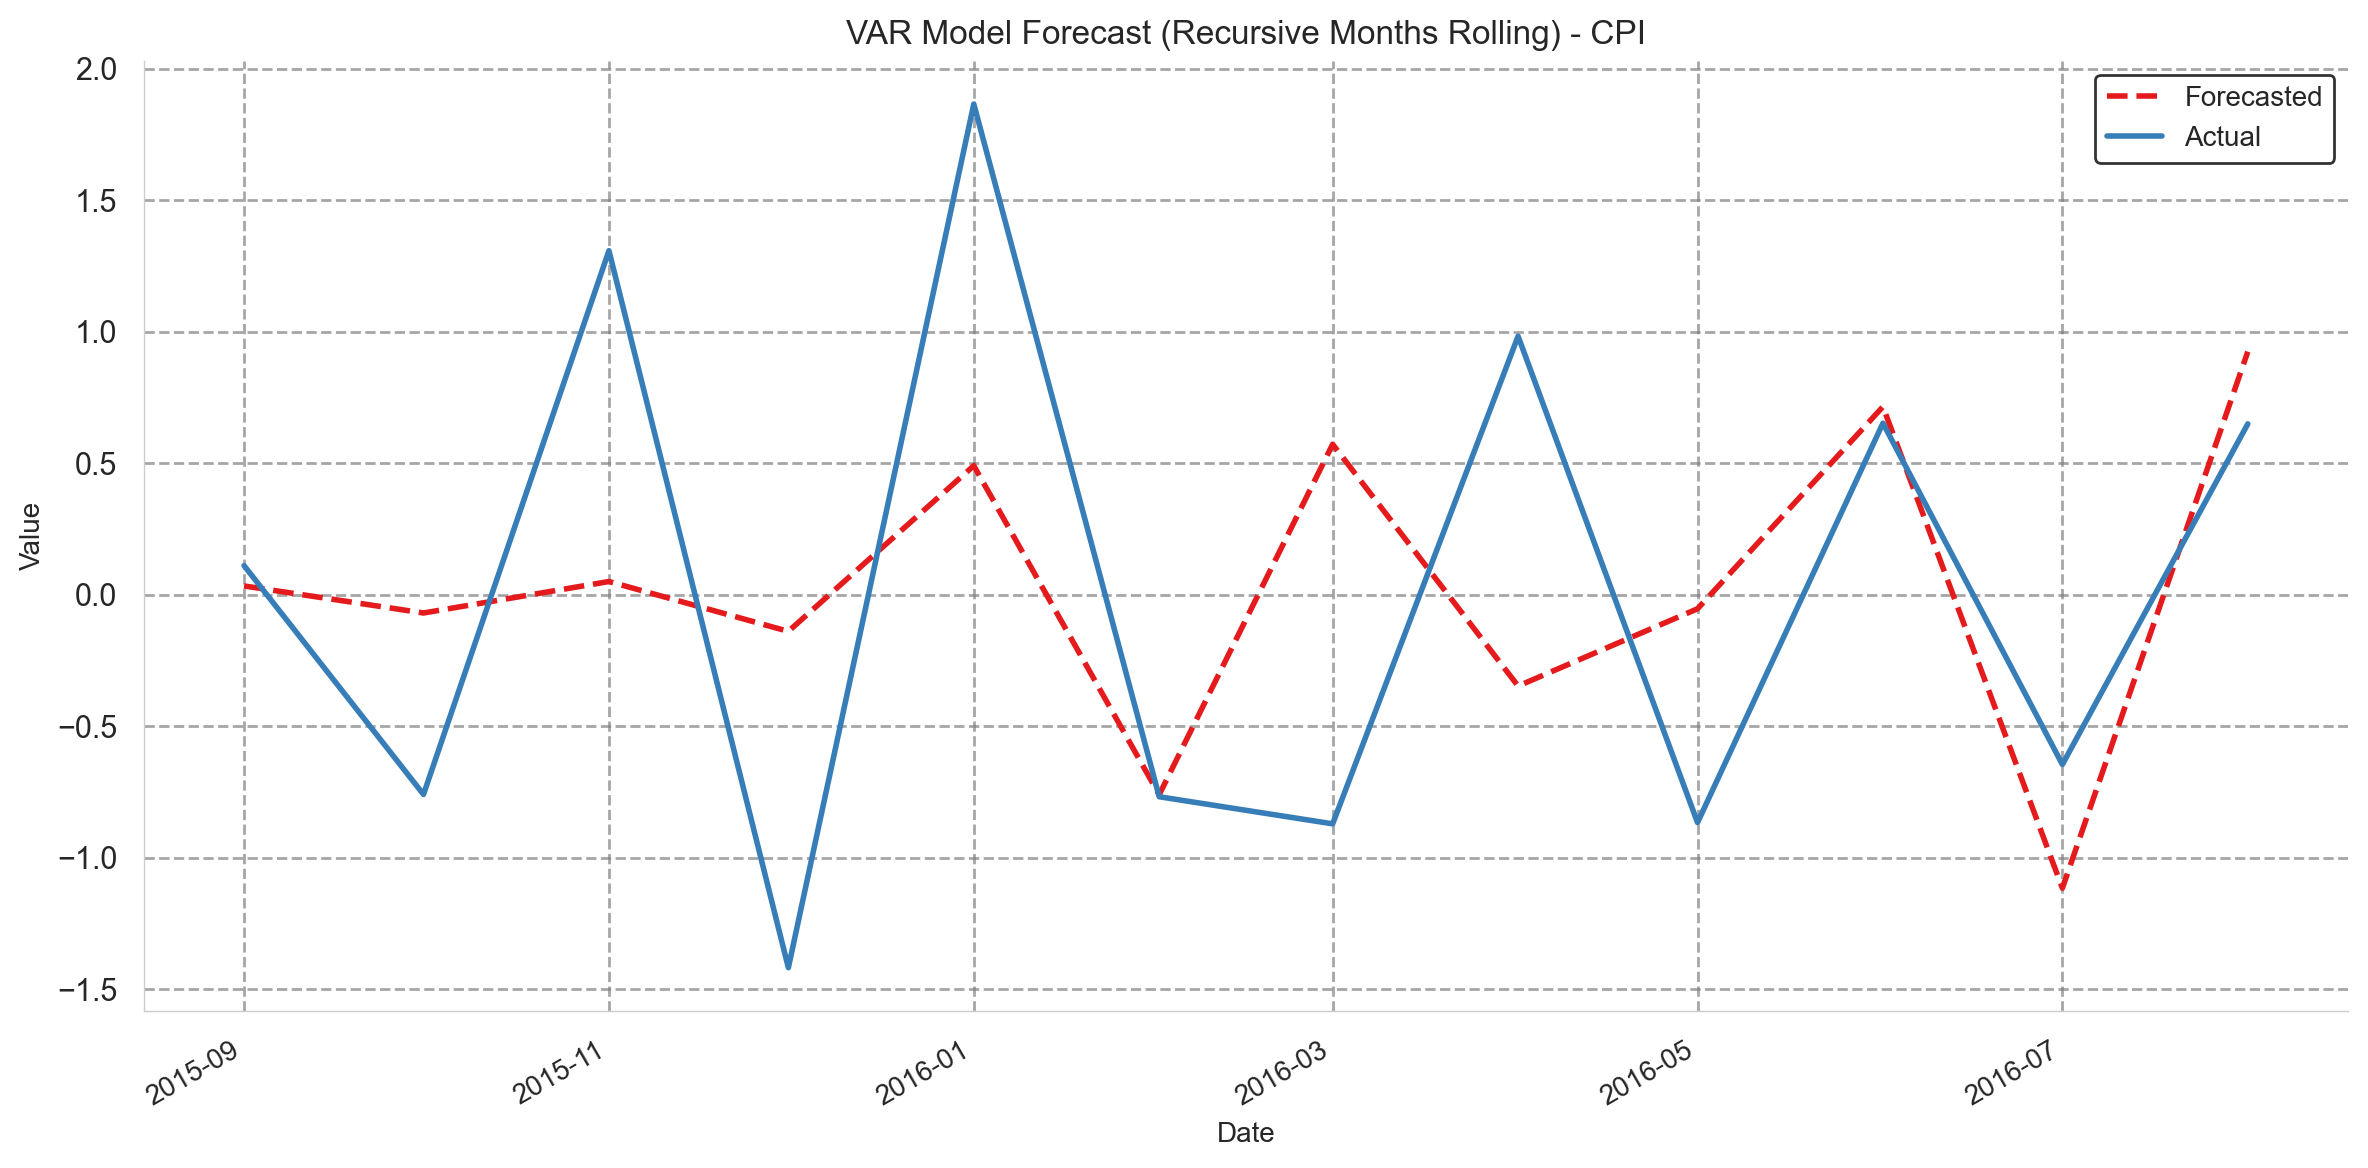

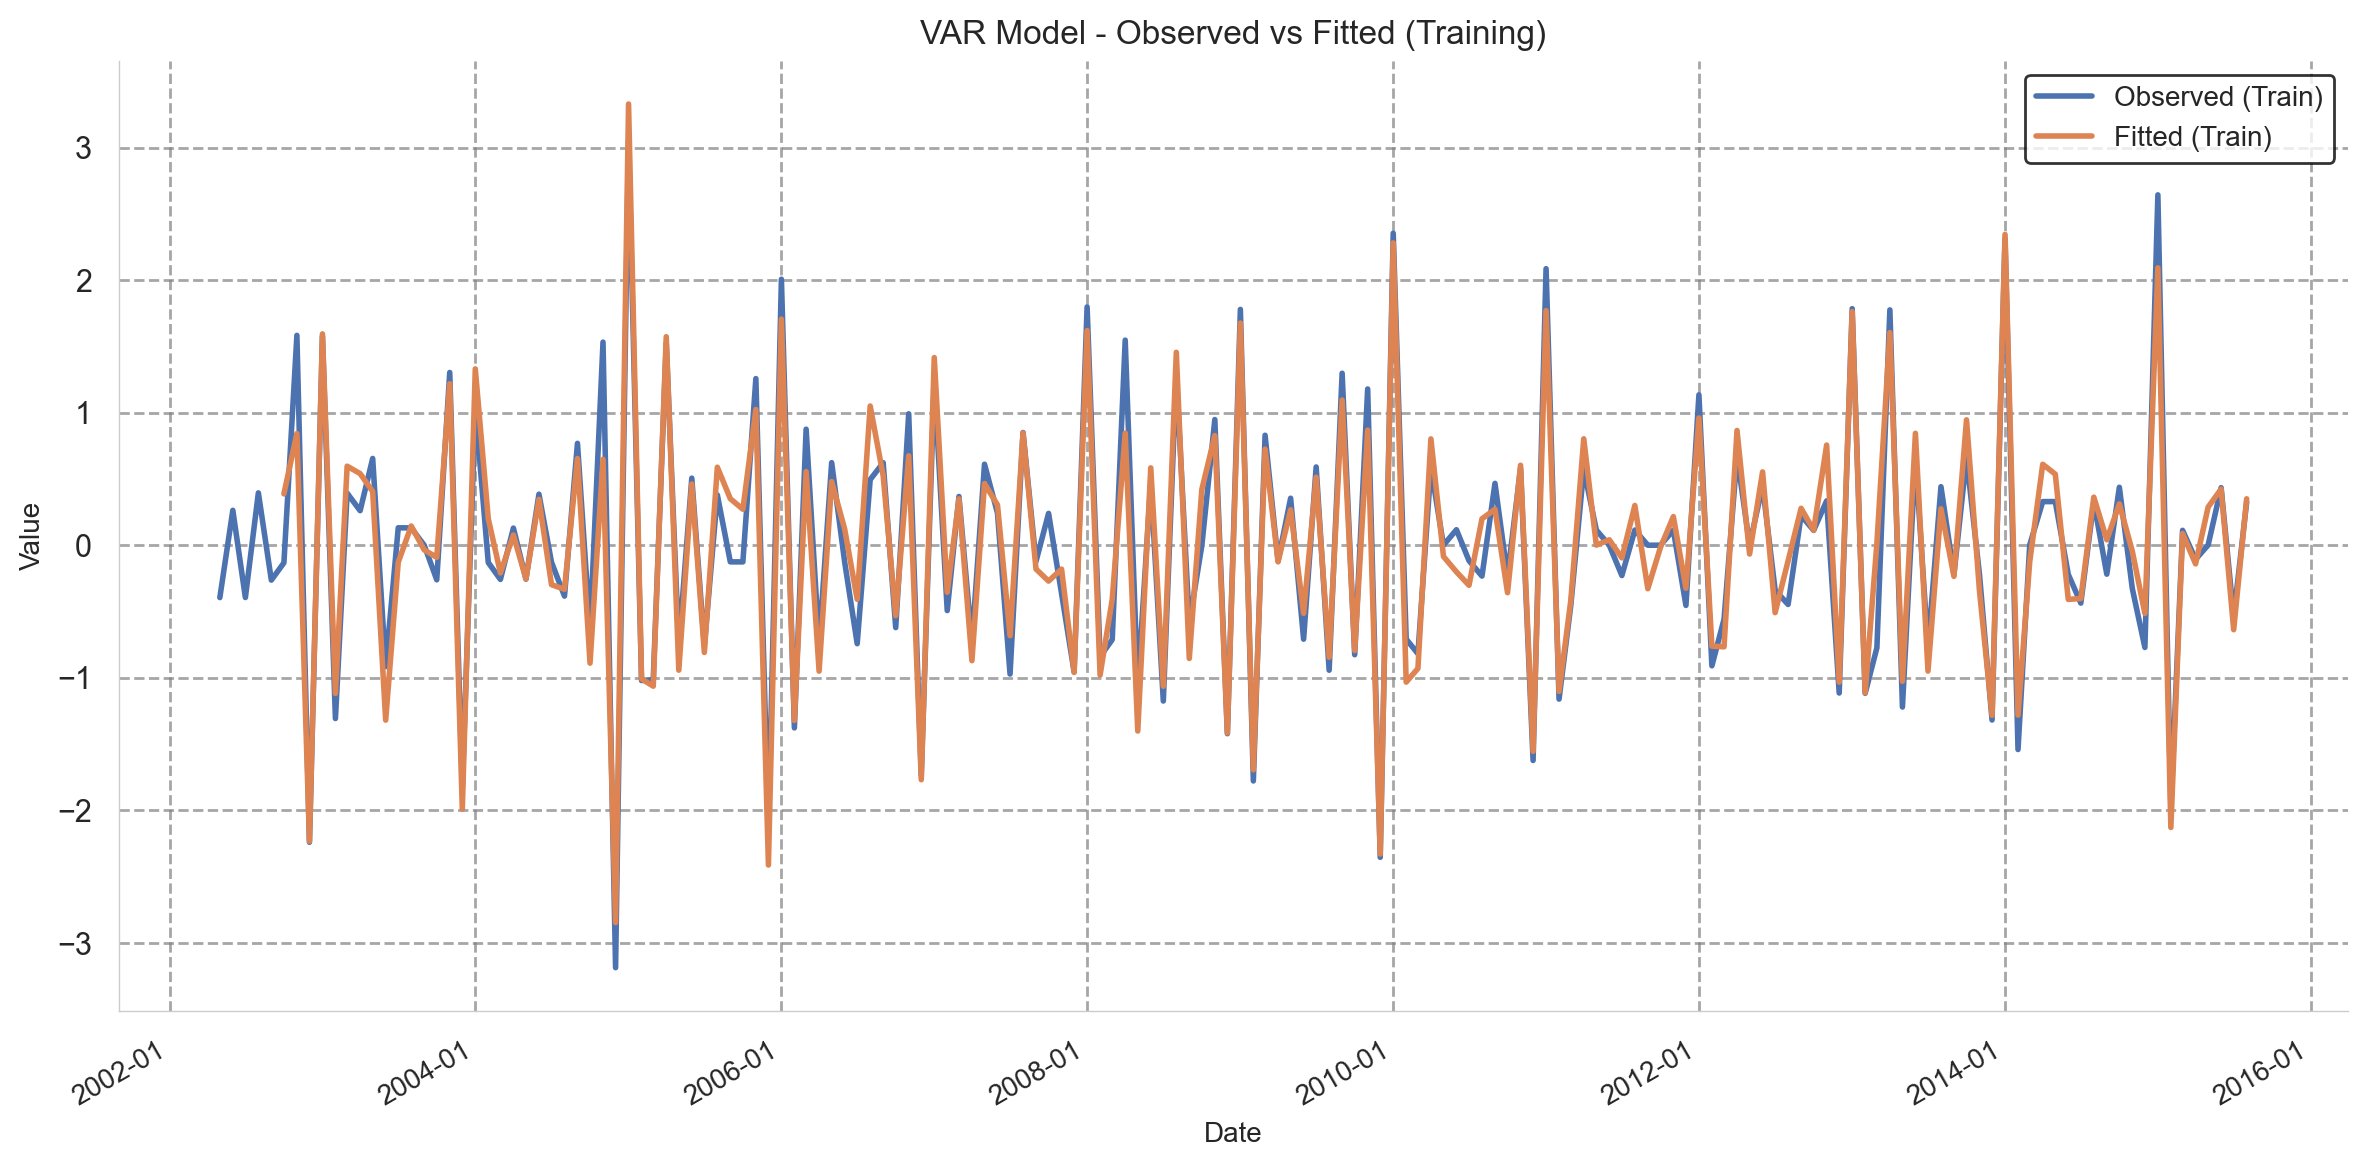

In [10]:
# # Forecast the next 12 months
model, forecasted_cpi, actual_cpi, var_train_df, var_mae, var_rmse = var_forecast(var_model, train_df.copy(), test_df.copy(), var_lag_order, test_size)
var_model_forecast_plot = plot_forecast(forecasted_cpi, actual_cpi, title_name='VAR Model Forecast (Recursive Months Rolling) - CPI')
var_observed_vs_fitted_plot = plot_observed_vs_fitted_var(model, var_train_df, target, 'VAR Model - Observed vs Fitted (Training)')


# ***ARIMA Training and Test***

In [11]:

# Extract CPI series for ARIMA
train_cpi_arima = train_df.copy()[target]
test_cpi_arima = test_df.copy()[target]

In [12]:
# For ARIMA order selection (non-seasonal):
auto_arima_model_arima = auto_arima(train_cpi_arima, seasonal=False, stepwise=True,
                                    suppress_warnings=True, error_action="ignore", max_order=10, trace=True)



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=151.738, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=458.878, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=333.392, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=279.589, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=149.772, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=155.879, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=205.310, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=150.438, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=183.673, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=129.760, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=135.614, Time=0.10 se

In [13]:

def arima_mm_forecast(train_df, test_df, auto_arima_model, forecast_horizon, title='ARIMA: Observed vs Fitted (24 Months Rolling)', target_column=target):
    """
    Performs a rolling multi-step-ahead ARIMA forecast for the entire test dataset.

    Parameters:
    - train_df (pd.DataFrame): Training data
    - test_df (pd.DataFrame): Test data
    - target_column (str): The target variable for evaluation (default 'CPIAUCSL')
    - steps (int): Number of steps ahead for each rolling forecast

    Returns:
    - forecast_df (pd.DataFrame): Forecasted values for the entire test period
    - mae (float): Mean Absolute Error
    - rmse (float): Root Mean Squared Error
    """

    # Extract target series
    train_series = train_df[target_column]
    test_series = test_df[target_column]

    arima_model = ARIMA(train_series.tolist(), order=auto_arima_model.order)
    model_fit = arima_model.fit()

    # Forecast `forecast_horizon` steps ahead (recursive)
    forecast = model_fit.forecast(steps=forecast_horizon)

    # Build output DataFrame
    forecast_index = test_series.index[:forecast_horizon]
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[target])
    actual_series = test_series.iloc[:forecast_horizon]

    # Metrics
    mae = mean_absolute_error(actual_series, forecast_df[target])
    rmse = np.sqrt(mean_squared_error(actual_series, forecast_df[target]))

    print(f"ARIMA Model - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"ARIMA Model - Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Generate and display plots
    print("Train")
    print(train_df.shape)

    plot_forecast(forecast_df[target_column], test_series, title_name=f'ARIMA -Step Ahead Forecast - {target_column}')
    plot_arima_observed_vs_fitted(model_fit, train_df, target_column=target_column, title=title) # Pass target_column

    plt.show()  # Display plots
    return forecast_df, mae, rmse


# Results

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Model - Mean Absolute Error (MAE): 0.8715
ARIMA Model - Root Mean Squared Error (RMSE): 0.9724
Train
(160, 19)


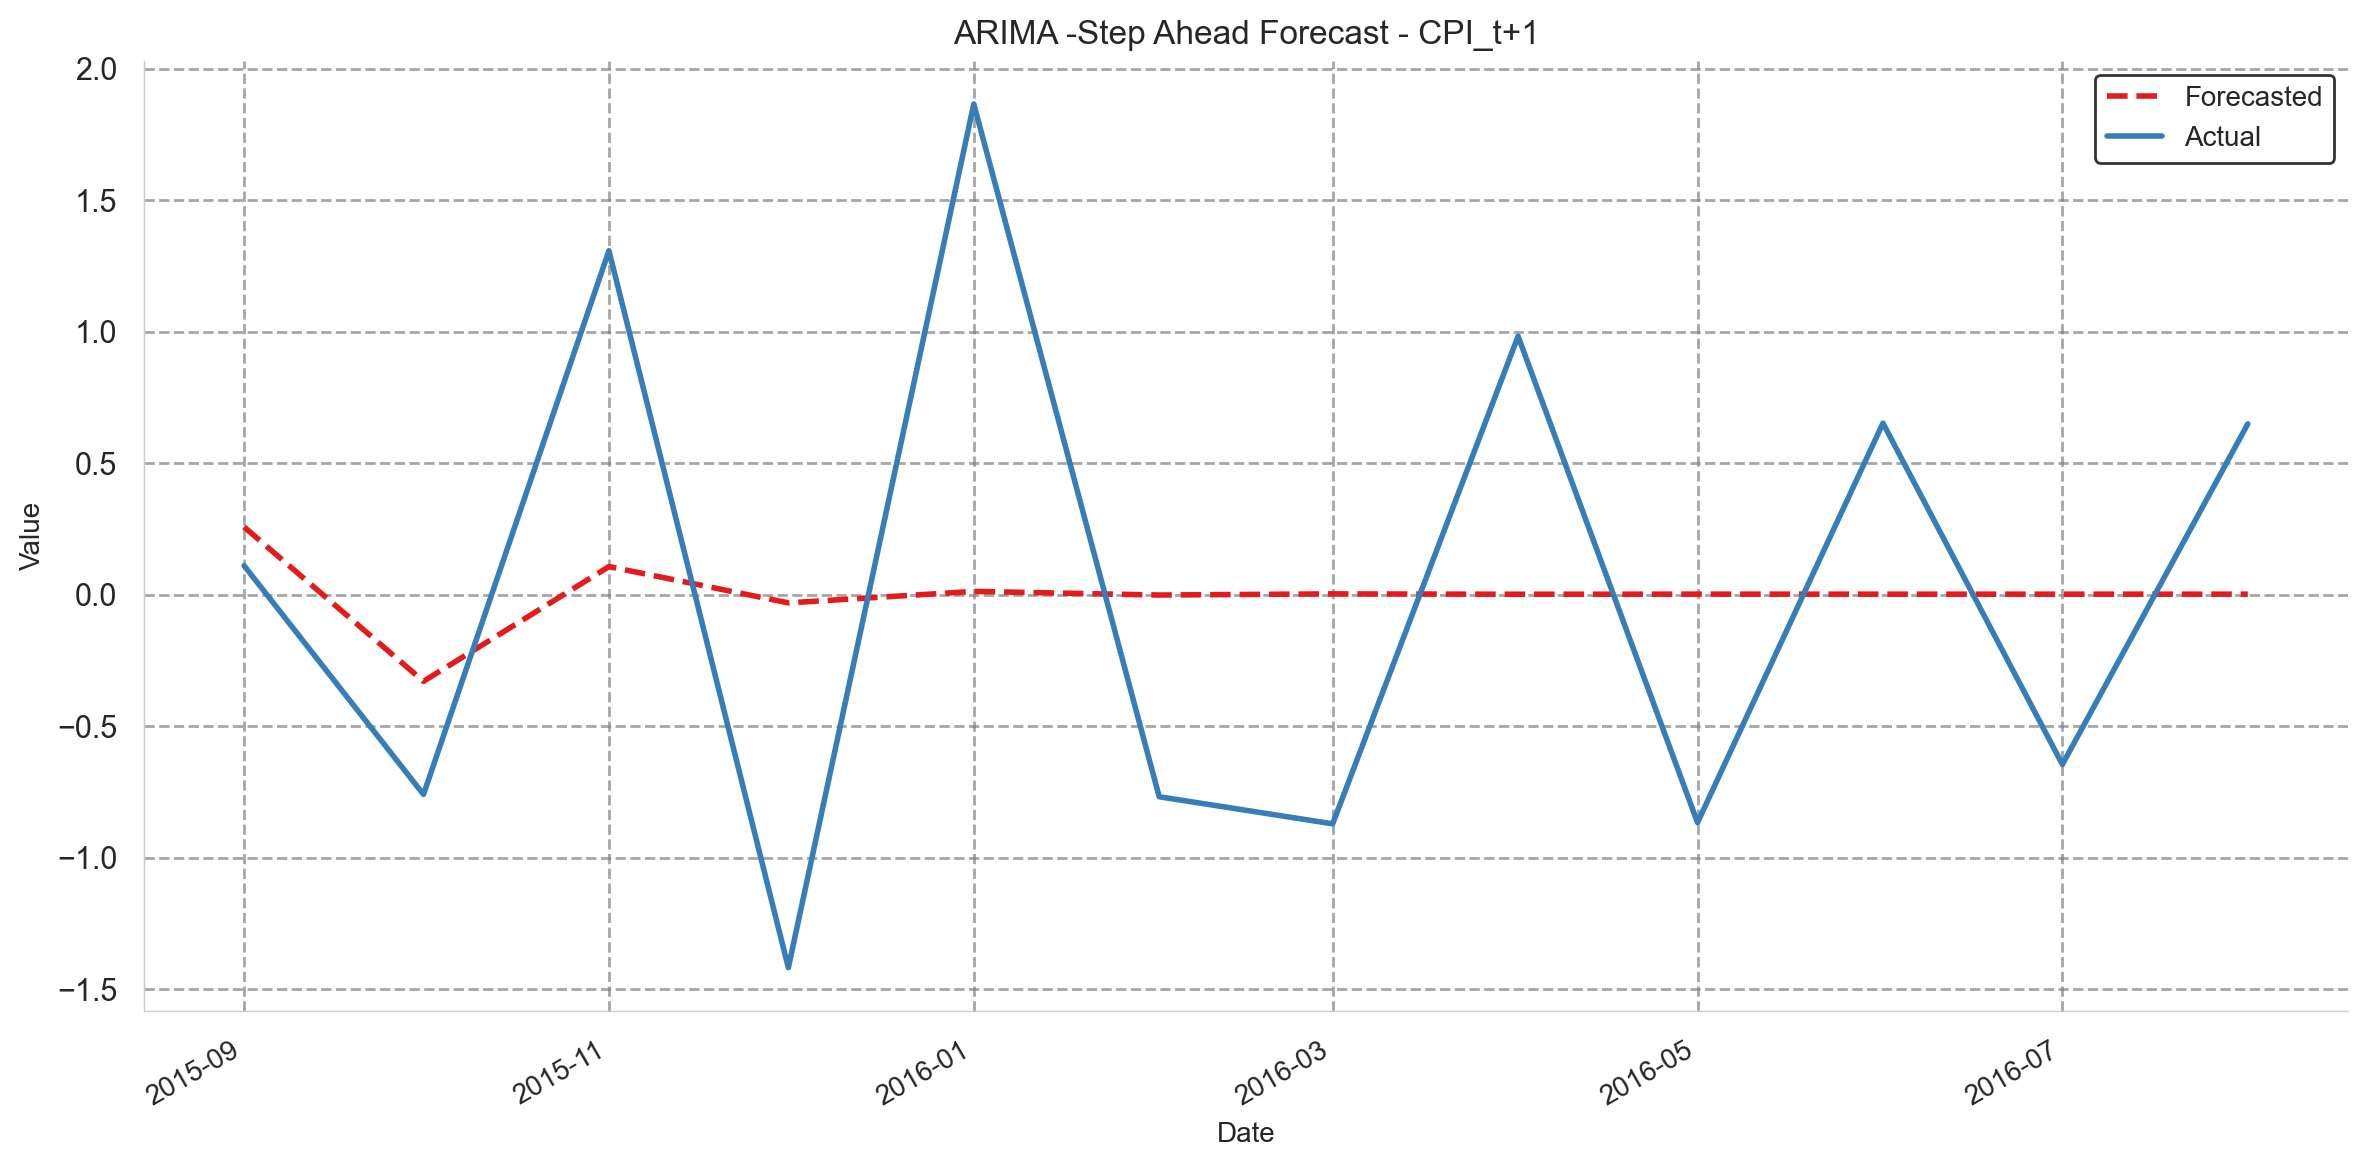

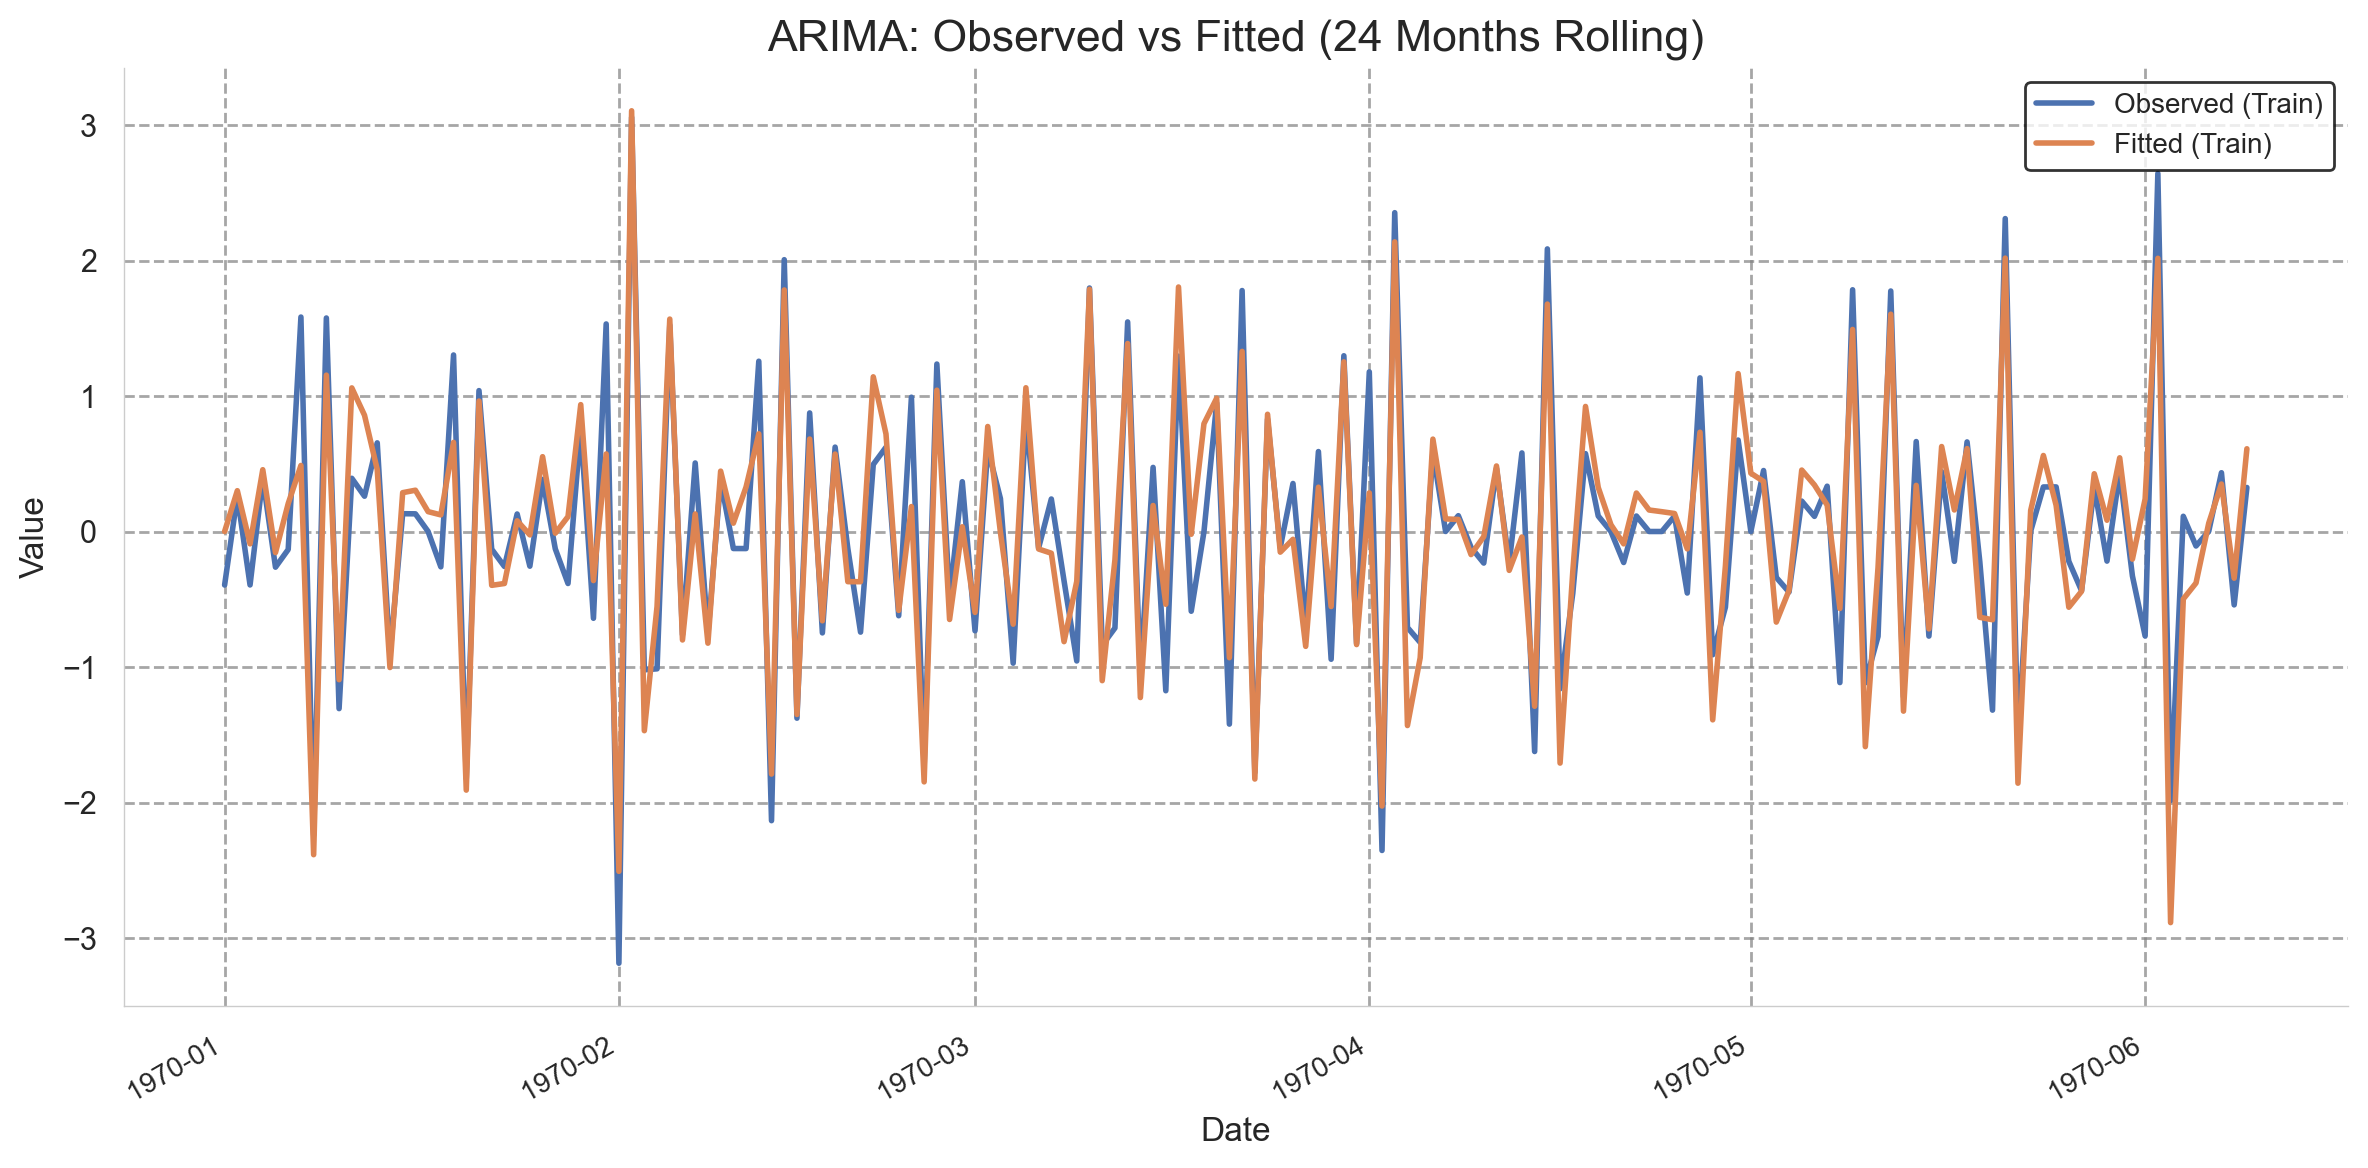

In [14]:
forecast_df, arima_mae, arima_rmse = arima_mm_forecast(train_df, test_df, auto_arima_model_arima, test_size)


# ***SARIMA Training & Test***


In [15]:
train_cpi_sarima = train_df[target]


In [16]:
# For SARIMA order selection (seasonal):
auto_arima_model_sarima = auto_arima(train_cpi_sarima, seasonal=True, m=12, stepwise=True, # m=12 for monthly seasonality
                                     suppress_warnings=True, error_action="ignore", max_order=10, trace=True,
                                     max_p=10, max_q=10, max_P=10, max_Q=10) # Limit search space


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=17.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=460.878, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=252.721, Time=0.85 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=458.878, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=335.392, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=237.492, Time=3.41 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=12.62 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=218.722, Time=9.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=217.144, Time=6.62 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=282.240, Time=2.38 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=218.344, Time=9.27 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=279.546, Time=4.75 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=16.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=333

In [19]:

def sarima_mm_forecast(train_df, test_df, auto_arima_model_sarima, test_size, target_column=target):

    # Extract CPI series for ARIMA
    train_cpiauscl_arima = train_df[target_column]
    test_cpiauscl_arima = test_df[target_column]

    # Ensure the index is datetime for proper date manipulation
    train_cpiauscl_arima.index = pd.to_datetime(train_cpiauscl_arima.index)

    history = train_cpiauscl_arima.tolist()
    sarima_model = SARIMAX(history,
                          order=auto_arima_model_sarima.order,
                          seasonal_order=auto_arima_model_sarima.seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

    sarima_model_fit = sarima_model.fit(disp=False)  # disp=False to suppress convergence output
    forecast = sarima_model_fit.forecast(steps=test_size)

    forecast_df = pd.DataFrame(forecast, index=test_cpiauscl_arima.index, columns=[target_column])

    mae_sarima = mean_absolute_error(test_cpiauscl_arima, forecast_df[target_column])
    rmse_sarima = np.sqrt(mean_squared_error(test_cpiauscl_arima, forecast_df[target_column]))

    # Print evaluation metrics
    print(f'Rolling SARIMA Model - Mean Absolute Error (MAE): {mae_sarima:.4f}')
    print(f'Rolling SARIMA Model - Root Mean Squared Error (RMSE): {rmse_sarima:.4f}')

    # Plot the forecast and the fitted model
    print("DETAILS")
    print(forecast_df.shape)
    print(test_cpiauscl_arima.shape)
    print(sarima_model_fit.fittedvalues.shape)
    sarima_forecast = plot_forecast(forecast_df, test_cpiauscl_arima, title_name='Rolling SARIMA Model Forecast - CPI')
    sarima_fitted = plot_arima_observed_vs_fitted(sarima_model_fit, train_df, target_column=target_column, title='SARIMA Model - Observed vs Fitted (24 Months Rolling)')
    plt.show()

    return sarima_forecast, mae_sarima, rmse_sarima



# Result

Rolling SARIMA Model - Mean Absolute Error (MAE): 0.5157
Rolling SARIMA Model - Root Mean Squared Error (RMSE): 0.6226
DETAILS
(12, 1)
(12,)
(160,)


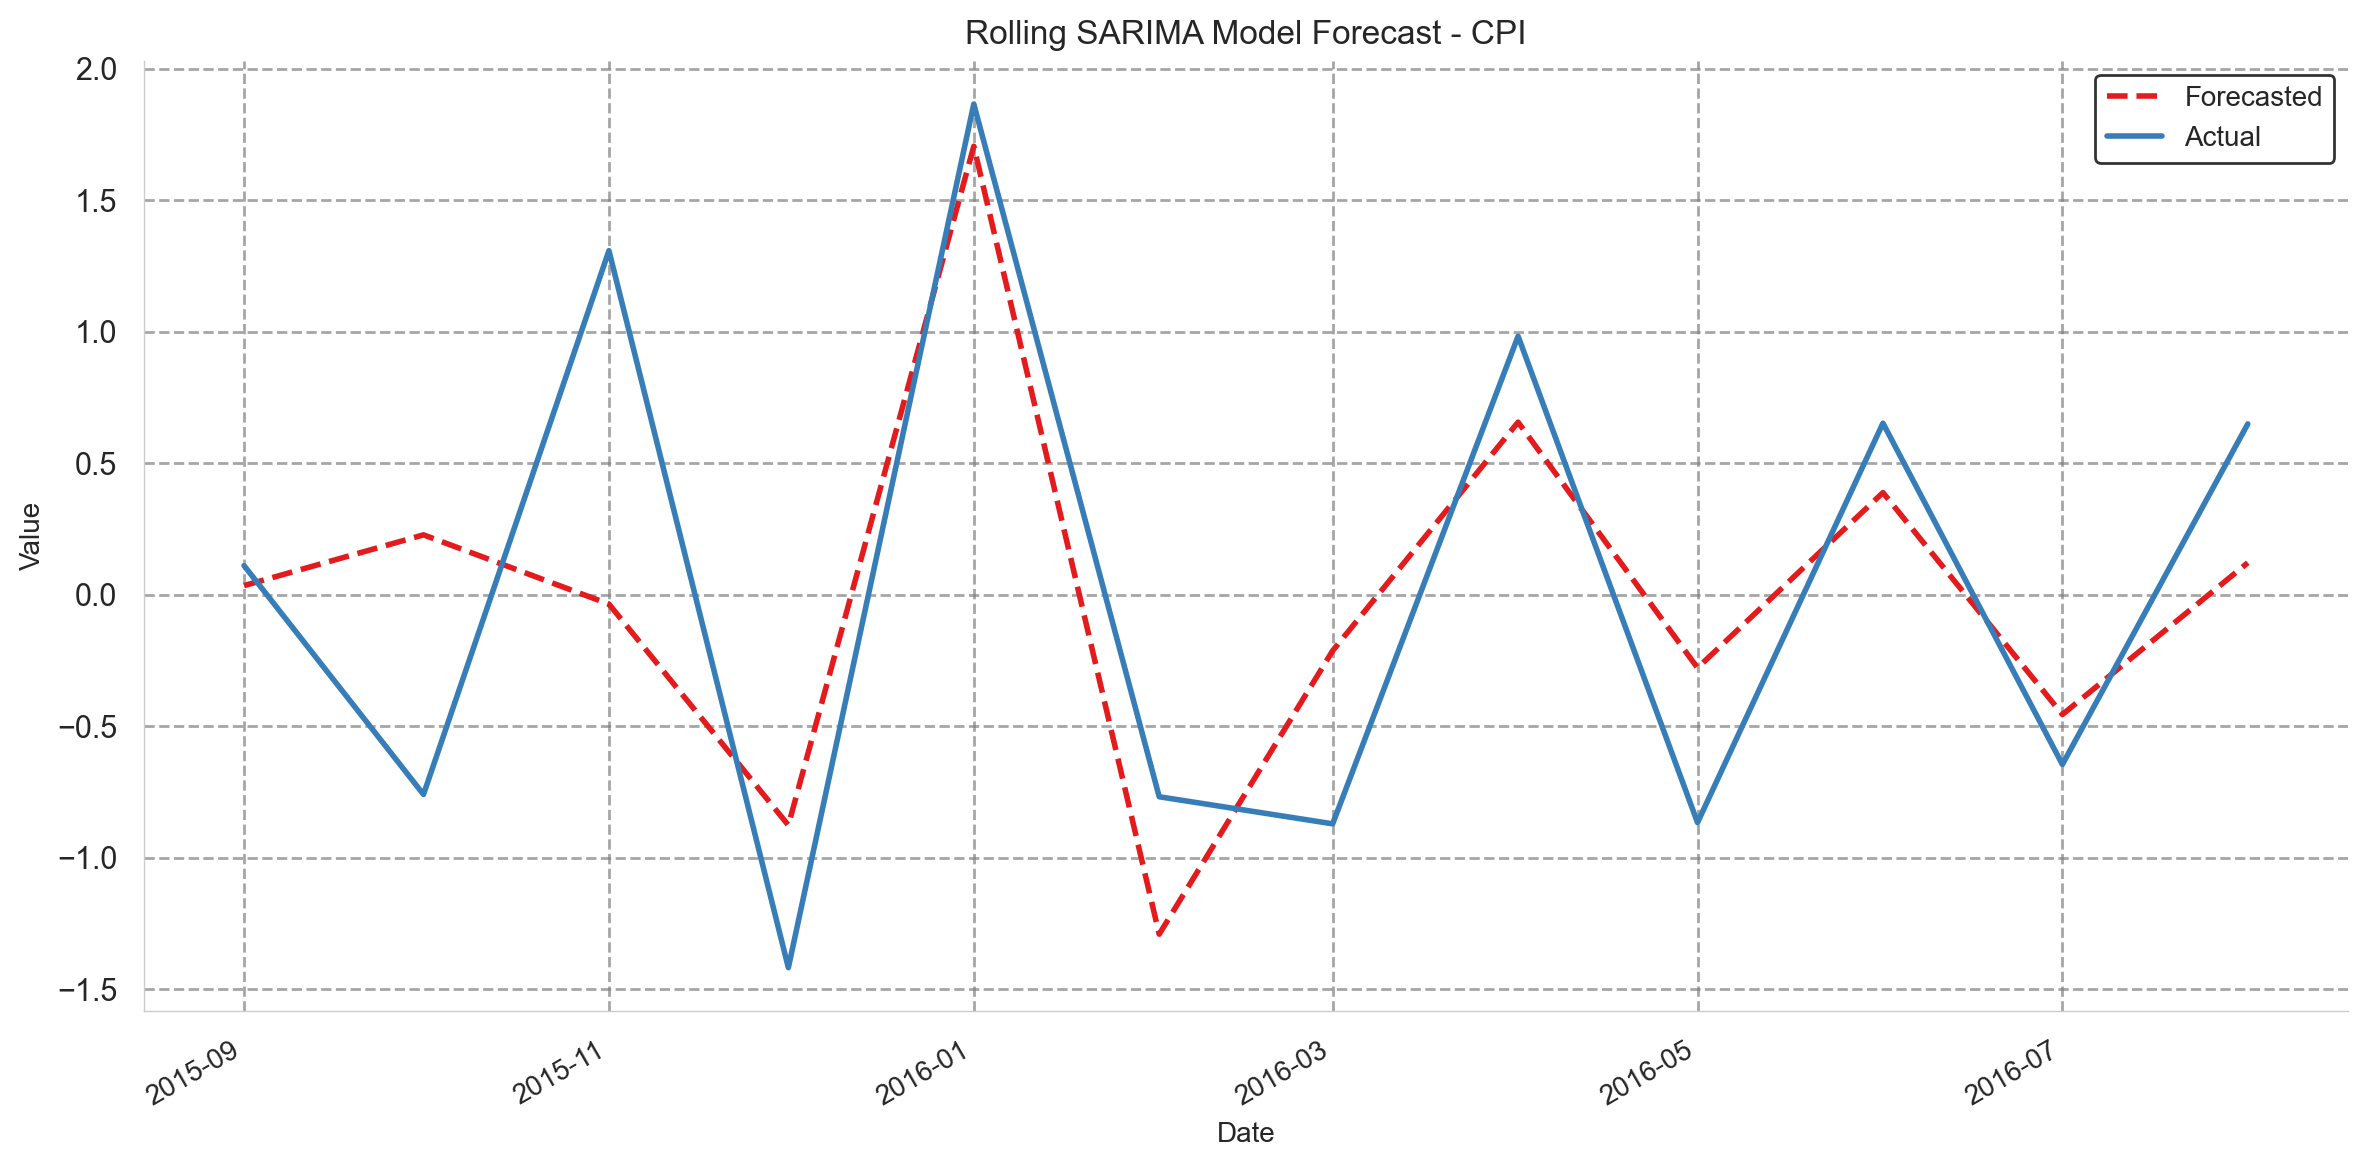

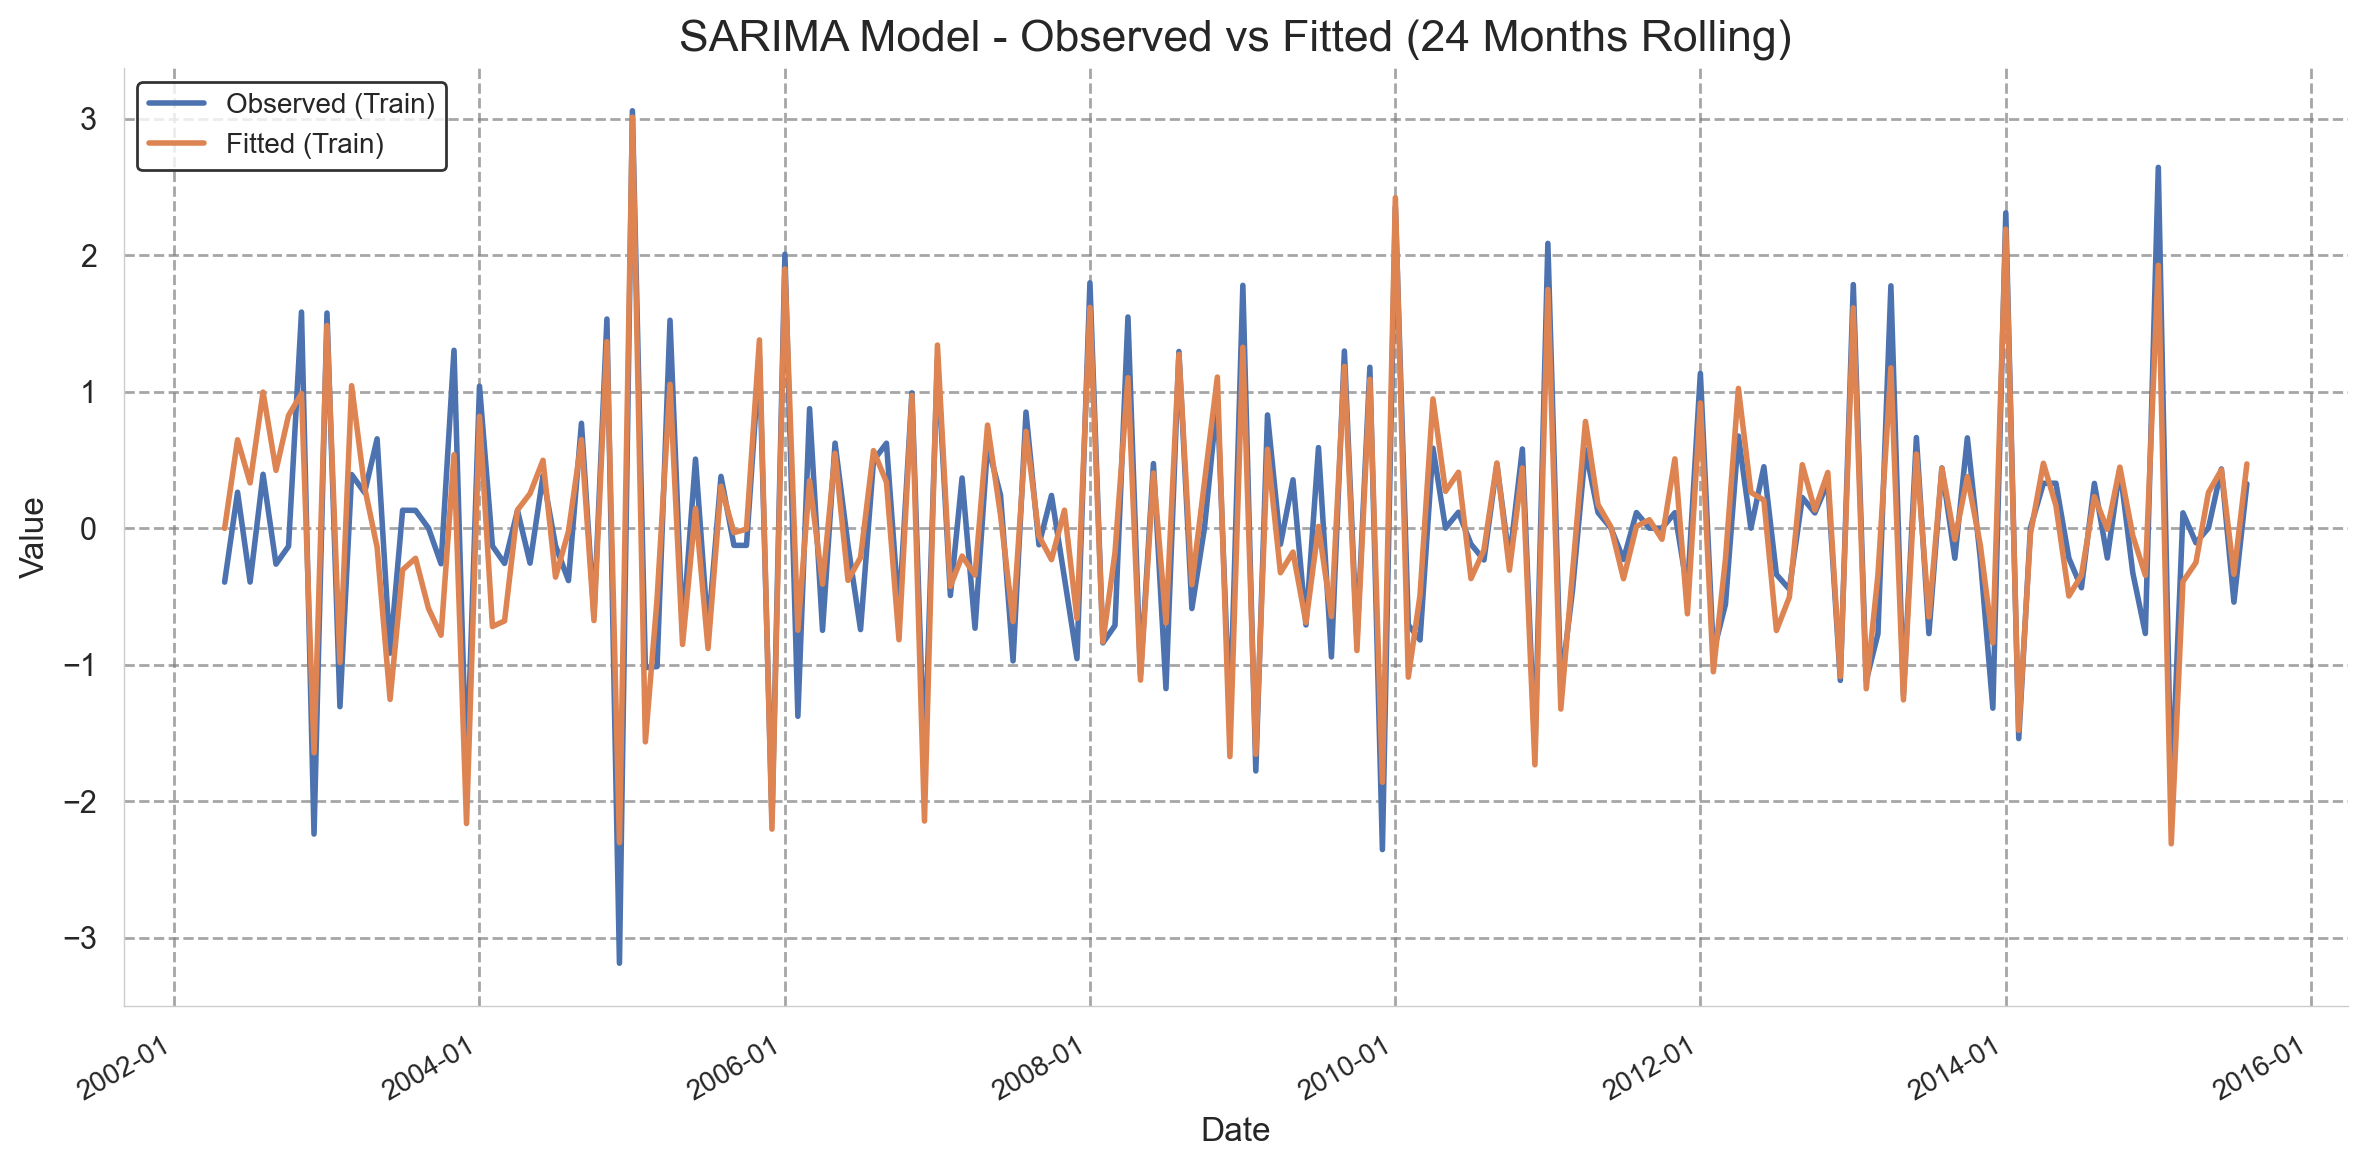

In [20]:

sarima_forecast, sarima_mae, sarima_rmse = sarima_mm_forecast(train_df, test_df, auto_arima_model_sarima, test_size)


# ***CNN-LSTM Training & Testing***

In [21]:

def prepare_data(data, target_column, test_size):

    data_x = data.copy()

    train_df = data_x.iloc[:-test_size]
    test_df = data_x.iloc[-test_size:]
    train_index = train_df.index
    test_index = test_df.index

    feature_names_used = data_x.drop(target_column, axis=1).columns.tolist()
    X_train = train_df.drop(target_column, axis=1).values
    y_train = train_df[target_column].values.reshape(-1, 1)
    X_test = test_df.drop(target_column, axis=1).values
    y_test = test_df[target_column].values.reshape(-1, 1)

    # Initialize scalers
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # Fit scalers on training data only
    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train)

    # Transform test data
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test)

    # Reshape for ConvLSTM2D: [samples, timesteps, rows, cols, channels]
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 1, 1, X_train_scaled.shape[1]))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 1, 1, X_test_scaled.shape[1]))

    return X_train, y_train_scaled, X_test, y_test_scaled, train_index, test_index, scaler_y, feature_names_used


In [22]:


# BEST SO FAR 128, 16
def build_model(input_shape):
    """Builds and compiles a ConvLSTM2D model."""
    model = Sequential([
        ConvLSTM2D(filters=16, kernel_size=(1, 1), activation='tanh', return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.002)),
        ConvLSTM2D(filters=8, kernel_size=(1, 1), activation='tanh', return_sequences=False, kernel_regularizer=l2(0.002)),
        # Dropout(0.6),
        Flatten(),
        Dense(1)
    ])
    opt = Adam(learning_rate=0.0007)
    model.compile(optimizer=opt, loss='mse')
    return model

def train_model(model, X_train, y_train):
    """Trains the model with early stopping."""
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=600, batch_size=16, shuffle=False, validation_split=0.2, callbacks=[early_stopping], verbose=0)
    return history

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and returns the test loss and predictions."""
    loss = model.evaluate(X_test, y_test, verbose=0)
    predictions = model.predict(X_test, verbose=0)
    return loss, predictions

def inverse_transform(scaler, data):
    """Inverse transforms the scaled data."""
    return scaler.inverse_transform(data.reshape(-1, 1))

def cnn_lstm_model(data, test_size=test_size):
    """Main function to execute the pipeline."""
    X_train, y_train, X_test, y_test, train_index, test_index, scaler_y, feature_names_used = prepare_data(data, target, test_size=test_size)
    model = build_model((1, 1, 1, X_train.shape[-1]))
    history = train_model(model, X_train, y_train)

    loss, predictions = evaluate_model(model, X_test, y_test)
    # print(f'Test Loss: {loss}')
    
    y_test_actual = inverse_transform(scaler_y, y_test)
    predictions_actual = inverse_transform(scaler_y, predictions)

    mae = mean_absolute_error(y_test_actual, predictions_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
    plot_cnn_forecast = plot_predictions(y_test_actual, predictions_actual, test_index)
    # plot_loss(history)

    predictions_train = model.predict(X_train, verbose=0) # Predict on X_train
    predictions_train_actual = inverse_transform(scaler_y, predictions_train) # Inverse transform fitted values
    y_train_actual = inverse_transform(scaler_y, y_train) # Inverse transform y_train

    # --- Plot Observed vs Fitted on Training Data ---
    plot_cnn_obs_vs_fitted = plot_observed_vs_fitted(y_train_actual, predictions_train_actual, train_index) # Pass y_train_actual and predictions_train_actual
    # plot_observed_vs_fitted(y_train, predictions)

    print(f'Mean Absolute Error (MAE): {mae:.8f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.8f}')
    return model, X_train, X_test, mae, rmse, feature_names_used



In [ ]:
print(data.shape)

In [ ]:
model, X_train, X_test, no_lags_cnn_mae, no_lags_cnn_rmse, fnames_no_lags = cnn_lstm_model(data_m, test_size)

ACF/PACF Lags

In [ ]:
model, X_train, X_test, pacf_cnn_mae, pacf_ccnn_rmse, feature_names_acf_pacf = cnn_lstm_model(data_acf_pacf, test_size)

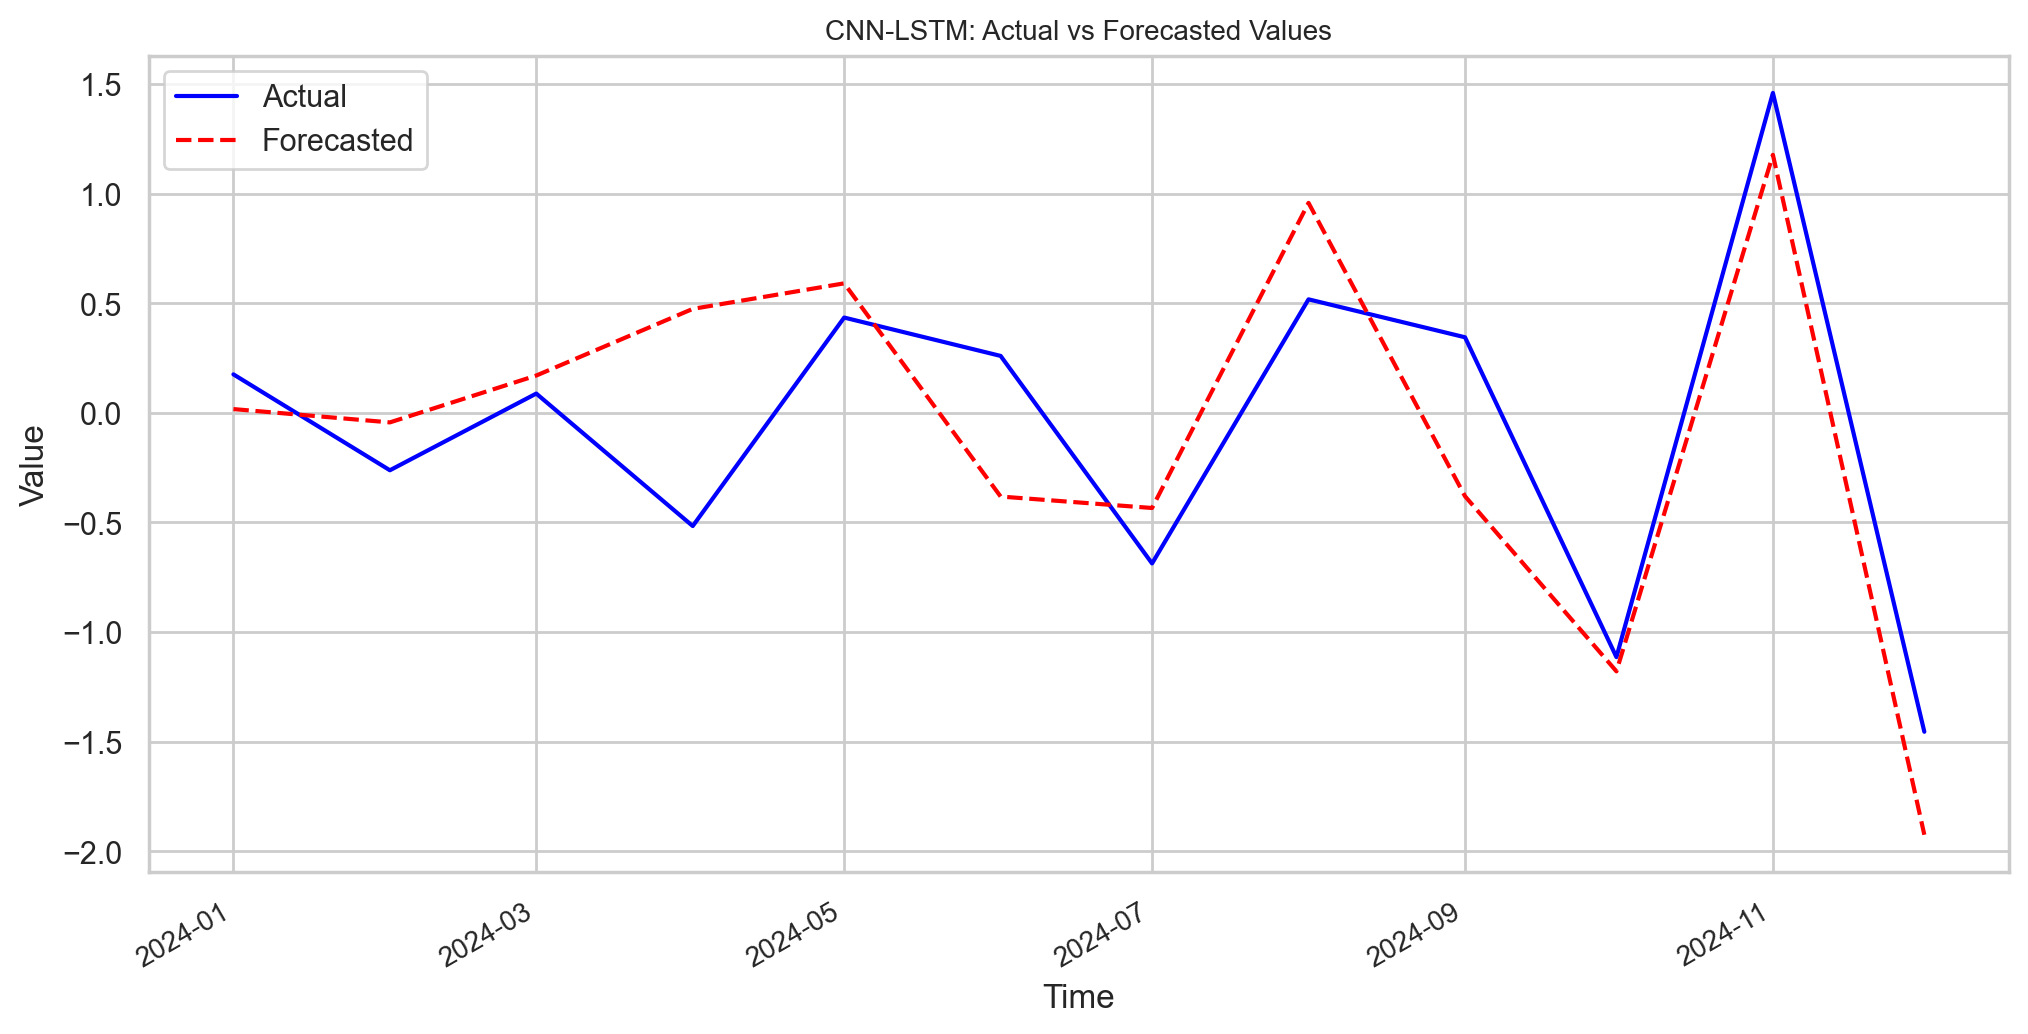

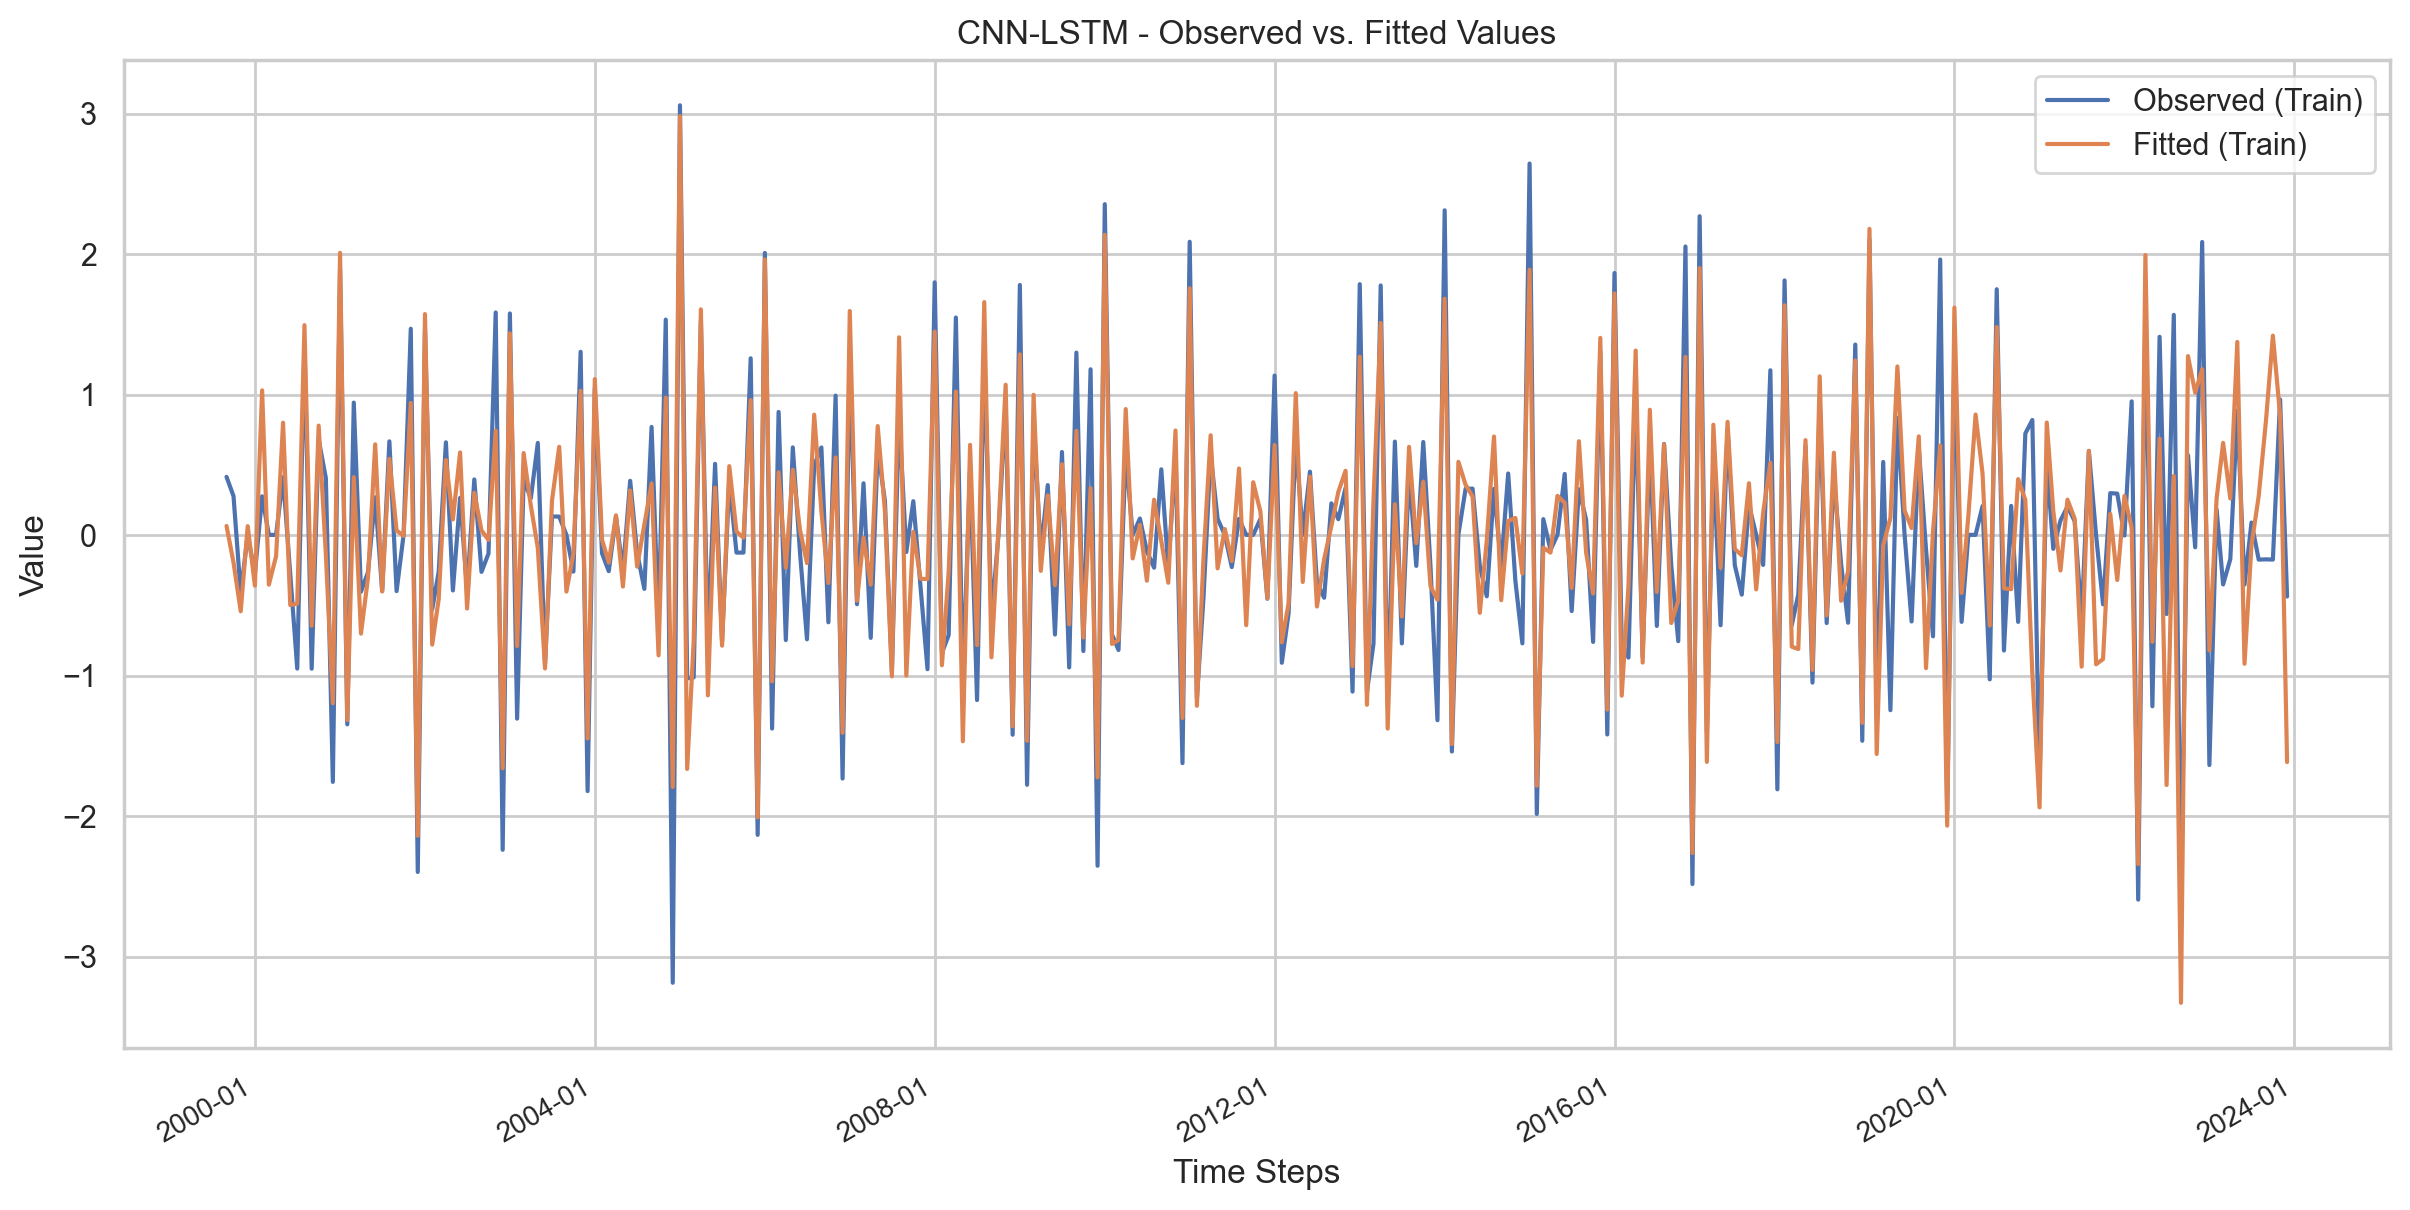

Mean Absolute Error (MAE): 0.37359717
Root Mean Squared Error (RMSE): 0.46419402


In [23]:
model, X_train, X_test, five_lags_cnn_mae, five_lags_cnn_rmse, feature_names_five_lags = cnn_lstm_model(data, test_size)

In [32]:
print(f'CNN-LSTM + ACF/PCF LAGS (MAE): {pacf_cnn_mae}')
print(f'CNN-LSTM + ACF/PCF LAGS (RMSE): {pacf_ccnn_rmse}')
print(f'CNN-LSTM (MAE) Five Lags: {five_lags_cnn_mae}')
print(f'CNN-LSTM (RMSE) Five Lags: {five_lags_cnn_rmse}')
print(f'CNN-LSTM (MAE): {no_lags_cnn_mae}')
print(f'CNN-LSTM (RMSE): {no_lags_cnn_rmse}')
print(f'VAR (MAE): {var_mae}')
print(f'VAR (RMSE): {var_rmse}')
print(f'ARIMA (MAE): {arima_mae}')
print(f'ARIMA (RMSE): {arima_rmse}')
print(f'SARIMA (MAE): {sarima_mae}')
print(f'SARIMA (RMSE): {sarima_rmse}')

CNN-LSTM + ACF/PCF LAGS (MAE): 0.3651833994466507
CNN-LSTM + ACF/PCF LAGS (RMSE): 0.46151395204391643
CNN-LSTM (MAE) Five Lags: 0.3695853737966941
CNN-LSTM (RMSE) Five Lags: 0.461124215549873
CNN-LSTM (MAE): 0.4140688627260014
CNN-LSTM (RMSE): 0.4562107049294147
VAR (MAE): 0.5877618477364212
VAR (RMSE): 0.7477106130859954
ARIMA (MAE): 0.6471004631246271
ARIMA (RMSE): 0.7775001318325307
SARIMA (MAE): 0.5806824756469929
SARIMA (RMSE): 0.7769290897305442


# SHAP Value Estimation for CNN-LSTM Model

In [25]:
# Wrapper function for SHAP
def model_predict(X):
    """Predict function for SHAP that ensures correct input shape."""
    X = X.reshape((X.shape[0], 1, 1, 1, X.shape[1]))  # Reshape to original model input shape
    return model.predict(X, verbose=0).flatten()  # Flatten output for SHAP

# Select a subset of X_test for SHAP analysis
def shappy(feature_names):
    # feature_names = data.drop(columns=[target]).columns.tolist()
    num_samples = min(50, X_test.shape[0])  # Ensure we don't exceed the available samples

    print("Original feature count:", len(feature_names))  # Should be 19
    print("X_test shape:", X_test.shape)  # e.g. (samples, 1, 1, 1, features)
    print("Number of features in model input:", X_test.shape[-1])  # e.g. 114?

    X_sample = X_test[:num_samples].reshape((num_samples, X_test.shape[-1]))  # Convert to 2D
    X_sample_df = pd.DataFrame(X_sample, columns=feature_names)  # Convert NumPy array back to DataFrame
    
    # Create Kernel SHAP Explainer
    explainer = shap.KernelExplainer(model_predict, X_sample_df)
    
    # Compute SHAP values
    shap_values = explainer.shap_values(X_sample_df)
    
    # Create SHAP summary plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
    shap.summary_plot(shap_values, X_sample_df, show=False)  # Prevent immediate display
    
    # Adjust font sizes
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(8)  # Change this value to your desired font size
    
    plt.show()
    return shap_values, feature_names

# Plot summary plot
# shap.summary_plot(shap_values, X_sample_df)


Original feature count: 114
X_test shape: (12, 1, 1, 1, 114)
Number of features in model input: 114


  0%|          | 0/12 [00:00<?, ?it/s]

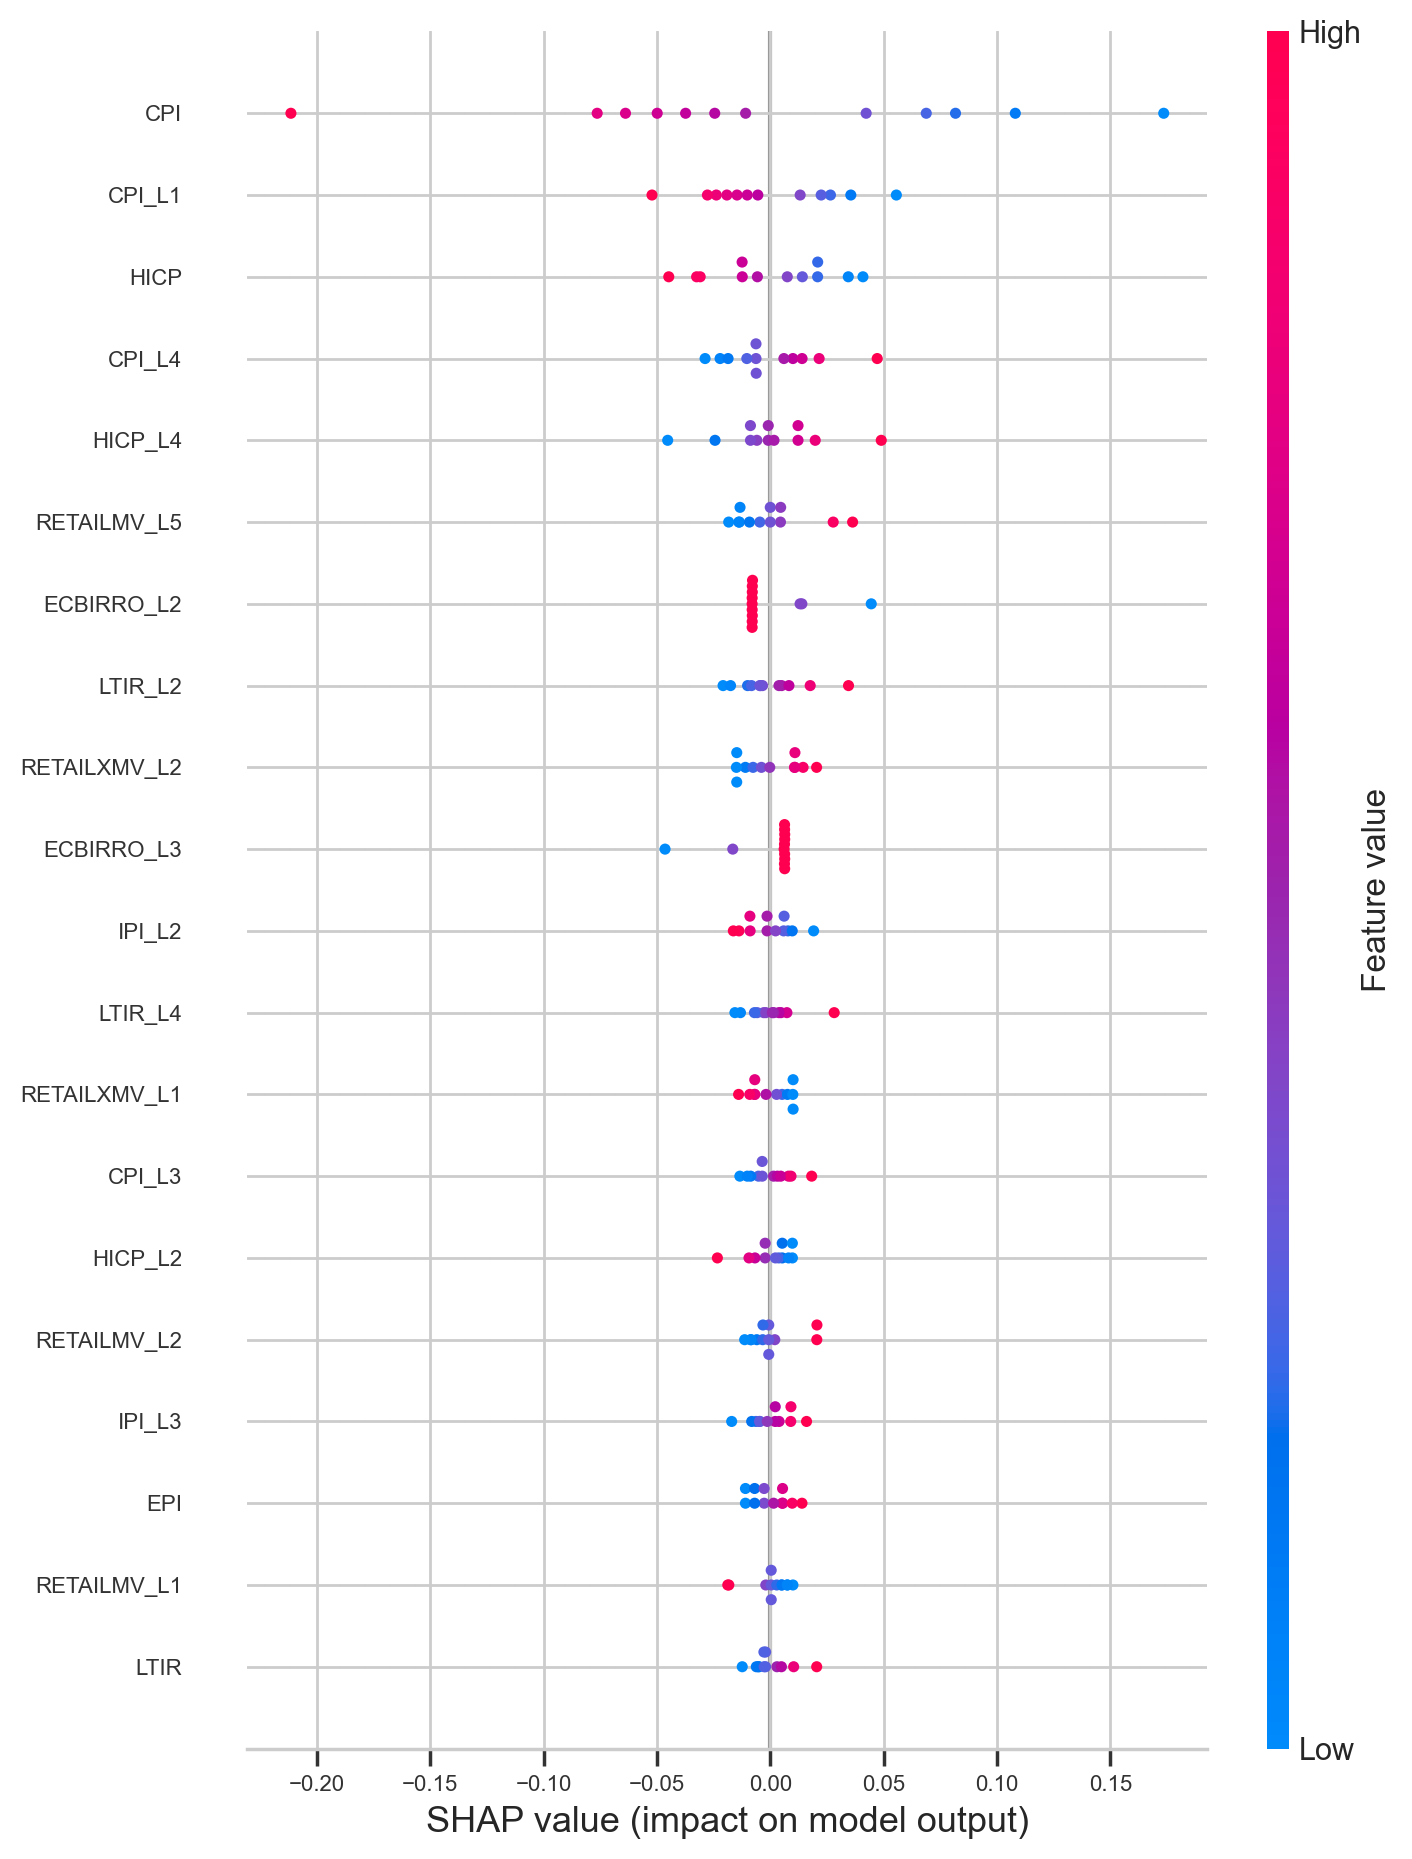

In [26]:
# print(len(data_acf_pacf.columns))
shap_values, feature_names = shappy(feature_names_five_lags)

# ***Top Influential Variables***

In [28]:
# Compute mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values).mean(axis=0)

# Create a dictionary mapping feature names to their importance
shap_importance_dict = dict(zip(feature_names, shap_importance))

# Sort features by importance (descending order)
sorted_features = sorted(shap_importance_dict, key=shap_importance_dict.get, reverse=True)



In [29]:
# Convert the dictionary to a list of (feature, importance) tuples
shap_importance_list = list(shap_importance_dict.items())

# Sort the list in descending order based on the importance value (second element of the tuple)
shap_importance_list.sort(key=lambda item: item[1], reverse=True)

# Print the sorted feature names and their importance values
print("SHAP Feature Importance (Descending Order):")
for feature, importance in shap_importance_list:
    print(f"{feature}: {importance:.4f}") # You can adjust the formatting of the importance value

SHAP Feature Importance (Descending Order):
CPI: 0.0790
CPI_L1: 0.0255
HICP: 0.0231
CPI_L4: 0.0164
HICP_L4: 0.0158
RETAILMV_L5: 0.0122
ECBIRRO_L2: 0.0119
LTIR_L2: 0.0115
RETAILXMV_L2: 0.0112
ECBIRRO_L3: 0.0105
IPI_L2: 0.0085
LTIR_L4: 0.0077
RETAILXMV_L1: 0.0076
CPI_L3: 0.0074
HICP_L2: 0.0073
RETAILMV_L2: 0.0072
IPI_L3: 0.0071
EPI: 0.0069
RETAILMV_L1: 0.0065
LTIR: 0.0064
ECBIRRO_L1: 0.0064
HICP_L3: 0.0062
GOODFBT_L2: 0.0060
LTIR_L3: 0.0059
RETAILXMV: 0.0055
HICP_L1: 0.0055
LTIR_L1: 0.0054
ECBMLFR: 0.0054
LTIR_L5: 0.0052
AGRPROD_L2: 0.0050
IPI: 0.0049
AGRPROD_L3: 0.0049
PPIIP_L4: 0.0049
HICP_L5: 0.0048
RETAILGF_L2: 0.0047
IPI_L4: 0.0047
WPI_L3: 0.0046
ECBDFR: 0.0045
RETAILMV_L4: 0.0044
RETAILXMV_L5: 0.0043
RETAILXMV_L3: 0.0042
RETAILGF_L4: 0.0042
RETAILGSR_L4: 0.0037
ECBMLFR_L2: 0.0036
IPI_L1: 0.0033
RETAILMV: 0.0032
RETAILGSR_L2: 0.0031
RETAILMV_L3: 0.0031
ECBMLFR_L5: 0.0031
CPI_L2: 0.0031
WPI_L2: 0.0031
ECBDFR_L2: 0.0029
AGRPROD_L5: 0.0028
ECBMLFR_L3: 0.0026
AGRPROD_L4: 0.0025
PPIIP_L3

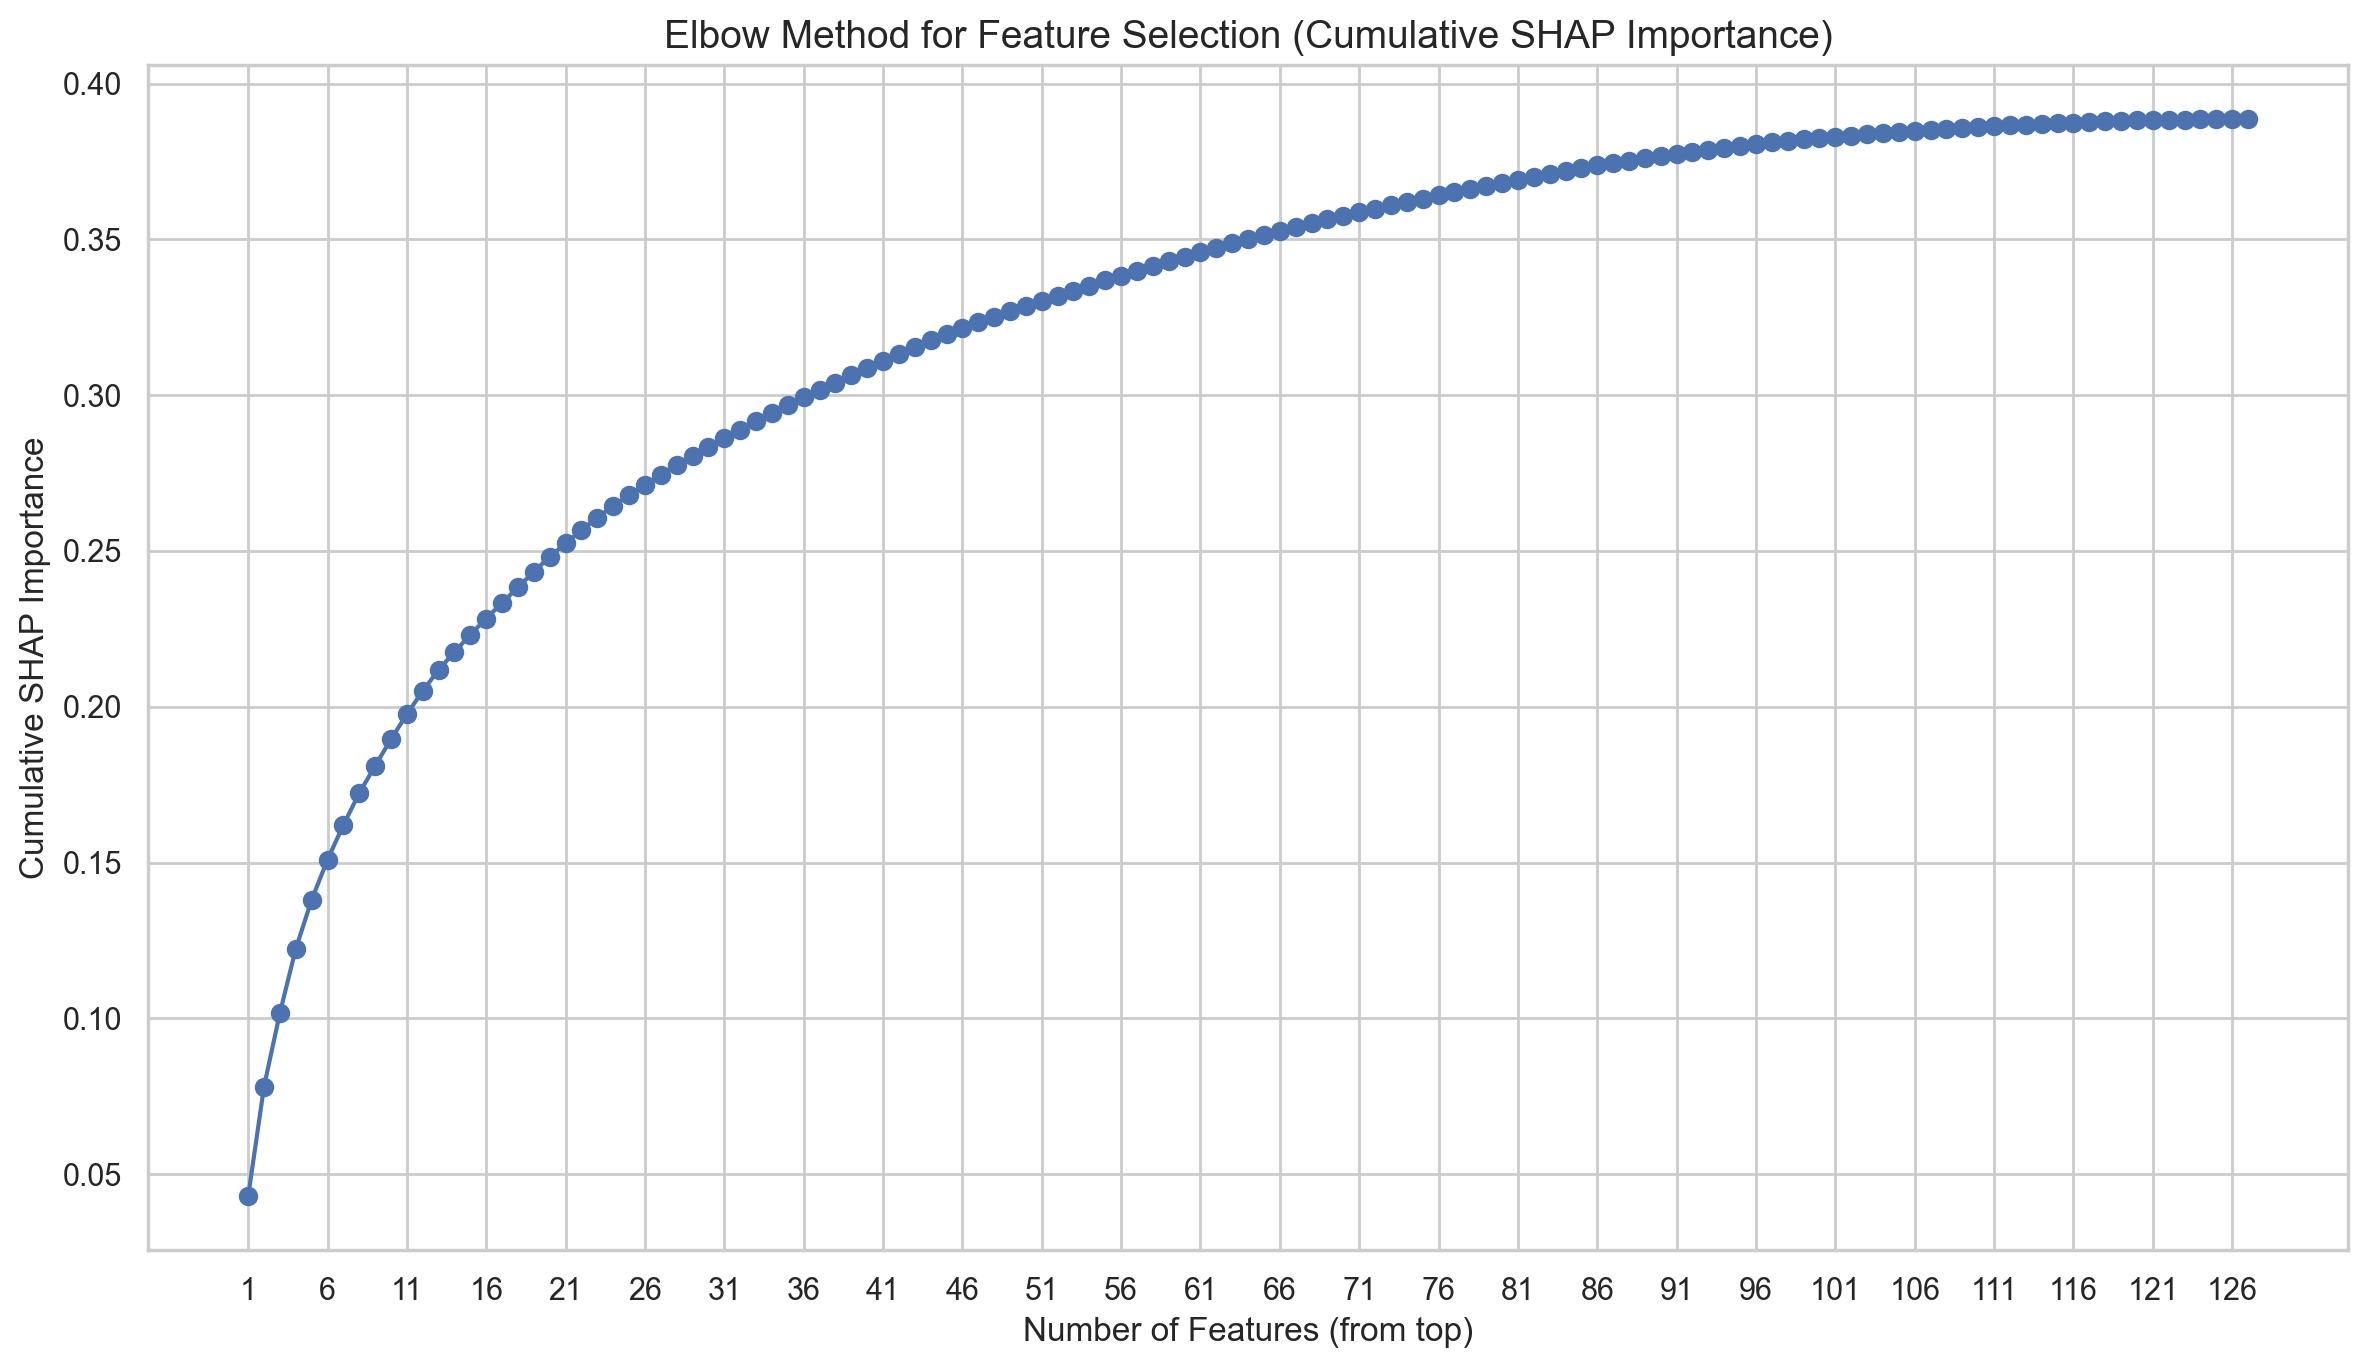

In [40]:
# Extract importance values
importance_values = [item[1] for item in shap_importance_list]

# Calculate cumulative importance
cumulative_importance = [sum(importance_values[:i+1]) for i in range(len(importance_values))]

# Plotting with adjustments
plt.figure(figsize=(12, 7))  # Increase figure size
plt.plot(range(1, len(importance_values) + 1), cumulative_importance, marker='o', linestyle='-')
plt.xlabel("Number of Features (from top)", fontsize=12)
plt.ylabel("Cumulative SHAP Importance", fontsize=12)
plt.title("Elbow Method for Feature Selection (Cumulative SHAP Importance)", fontsize=14)
plt.grid(True)

# Adjust x-axis ticks to be less dense (show every 5 features)
plt.xticks(range(1, len(importance_values) + 1, 5))

plt.tight_layout()
plt.show()

In [30]:
# Since no elbow we settle for the top 30 variables as this captures over 80% of the total importance
# one_third = len(sorted_features) // 3
top_influential_variables = np.array(sorted_features)[:13]

# Print the top influential variables
print("*** Top 13 influential variables based on elbow ***")
print(top_influential_variables)
print("*** All variables sorted in order of influence ***")
print(sorted_features)

*** Top 13 influential variables based on elbow ***
['CPI' 'CPI_L1' 'HICP' 'CPI_L4' 'HICP_L4' 'RETAILMV_L5' 'ECBIRRO_L2'
 'LTIR_L2' 'RETAILXMV_L2' 'ECBIRRO_L3' 'IPI_L2' 'LTIR_L4' 'RETAILXMV_L1']
*** All variables sorted in order of influence ***
['CPI', 'CPI_L1', 'HICP', 'CPI_L4', 'HICP_L4', 'RETAILMV_L5', 'ECBIRRO_L2', 'LTIR_L2', 'RETAILXMV_L2', 'ECBIRRO_L3', 'IPI_L2', 'LTIR_L4', 'RETAILXMV_L1', 'CPI_L3', 'HICP_L2', 'RETAILMV_L2', 'IPI_L3', 'EPI', 'RETAILMV_L1', 'LTIR', 'ECBIRRO_L1', 'HICP_L3', 'GOODFBT_L2', 'LTIR_L3', 'RETAILXMV', 'HICP_L1', 'LTIR_L1', 'ECBMLFR', 'LTIR_L5', 'AGRPROD_L2', 'IPI', 'AGRPROD_L3', 'PPIIP_L4', 'HICP_L5', 'RETAILGF_L2', 'IPI_L4', 'WPI_L3', 'ECBDFR', 'RETAILMV_L4', 'RETAILXMV_L5', 'RETAILXMV_L3', 'RETAILGF_L4', 'RETAILGSR_L4', 'ECBMLFR_L2', 'IPI_L1', 'RETAILMV', 'RETAILGSR_L2', 'RETAILMV_L3', 'ECBMLFR_L5', 'CPI_L2', 'WPI_L2', 'ECBDFR_L2', 'AGRPROD_L5', 'ECBMLFR_L3', 'AGRPROD_L4', 'PPIIP_L3', 'UNERWG_L3', 'PPIIP_L5', 'EPI_L5', 'RETAILGF_L5', 'ECBMLFR_L1', 'UNE

# ***CNN-LSTM + Variable Selection***

In [31]:

# Add the target variable to the list of influential variables
top_influential_variables = np.append(top_influential_variables, target)
data_iv = data_acf_pacf[top_influential_variables]


Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3507 - val_loss: 0.3233
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3134 - val_loss: 0.2864
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2766 - val_loss: 0.2494
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2396 - val_loss: 0.2122
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2026 - val_loss: 0.1763
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1675 - val_loss: 0.1447
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1372 - val_loss: 0.1204
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1146 - val_loss: 0.1054
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1009 - val_loss: 0.0978
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0936 - val_loss: 0.0933
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0889 - val_loss: 0.0896
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

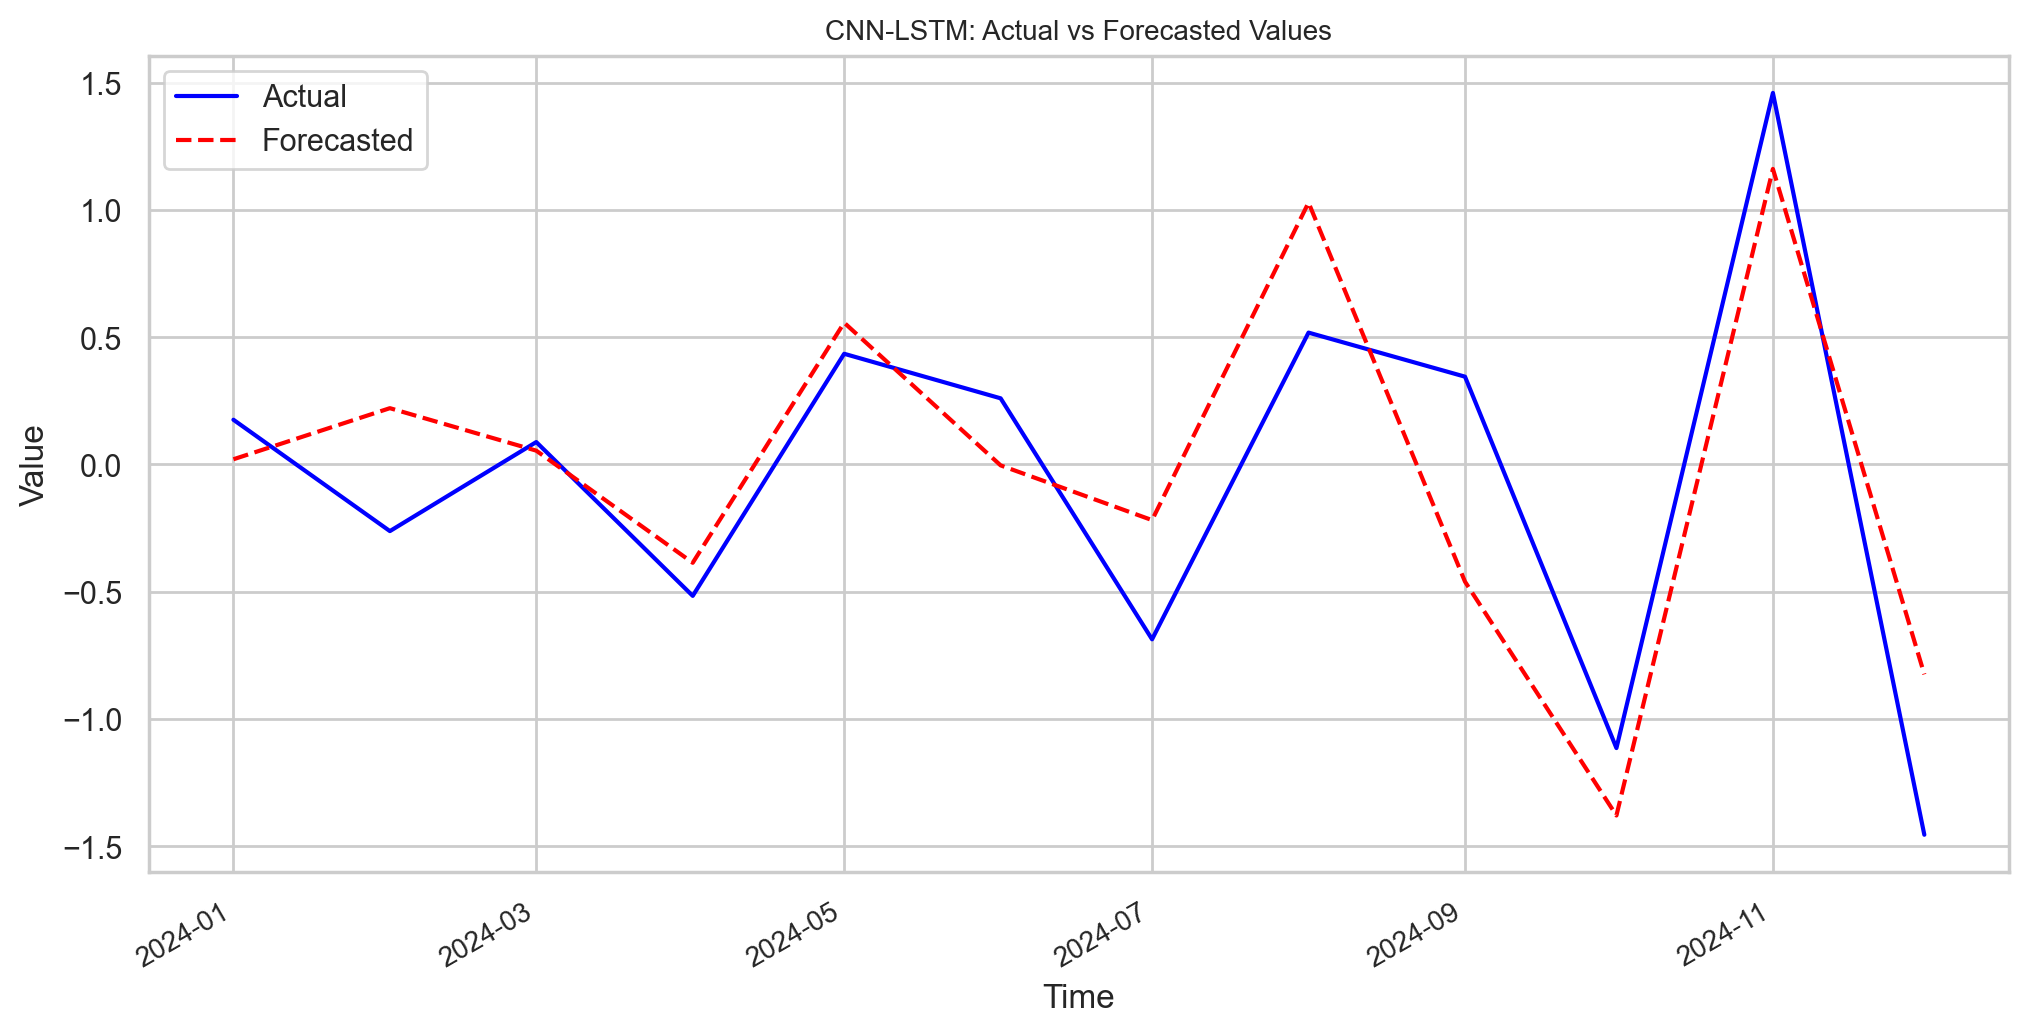

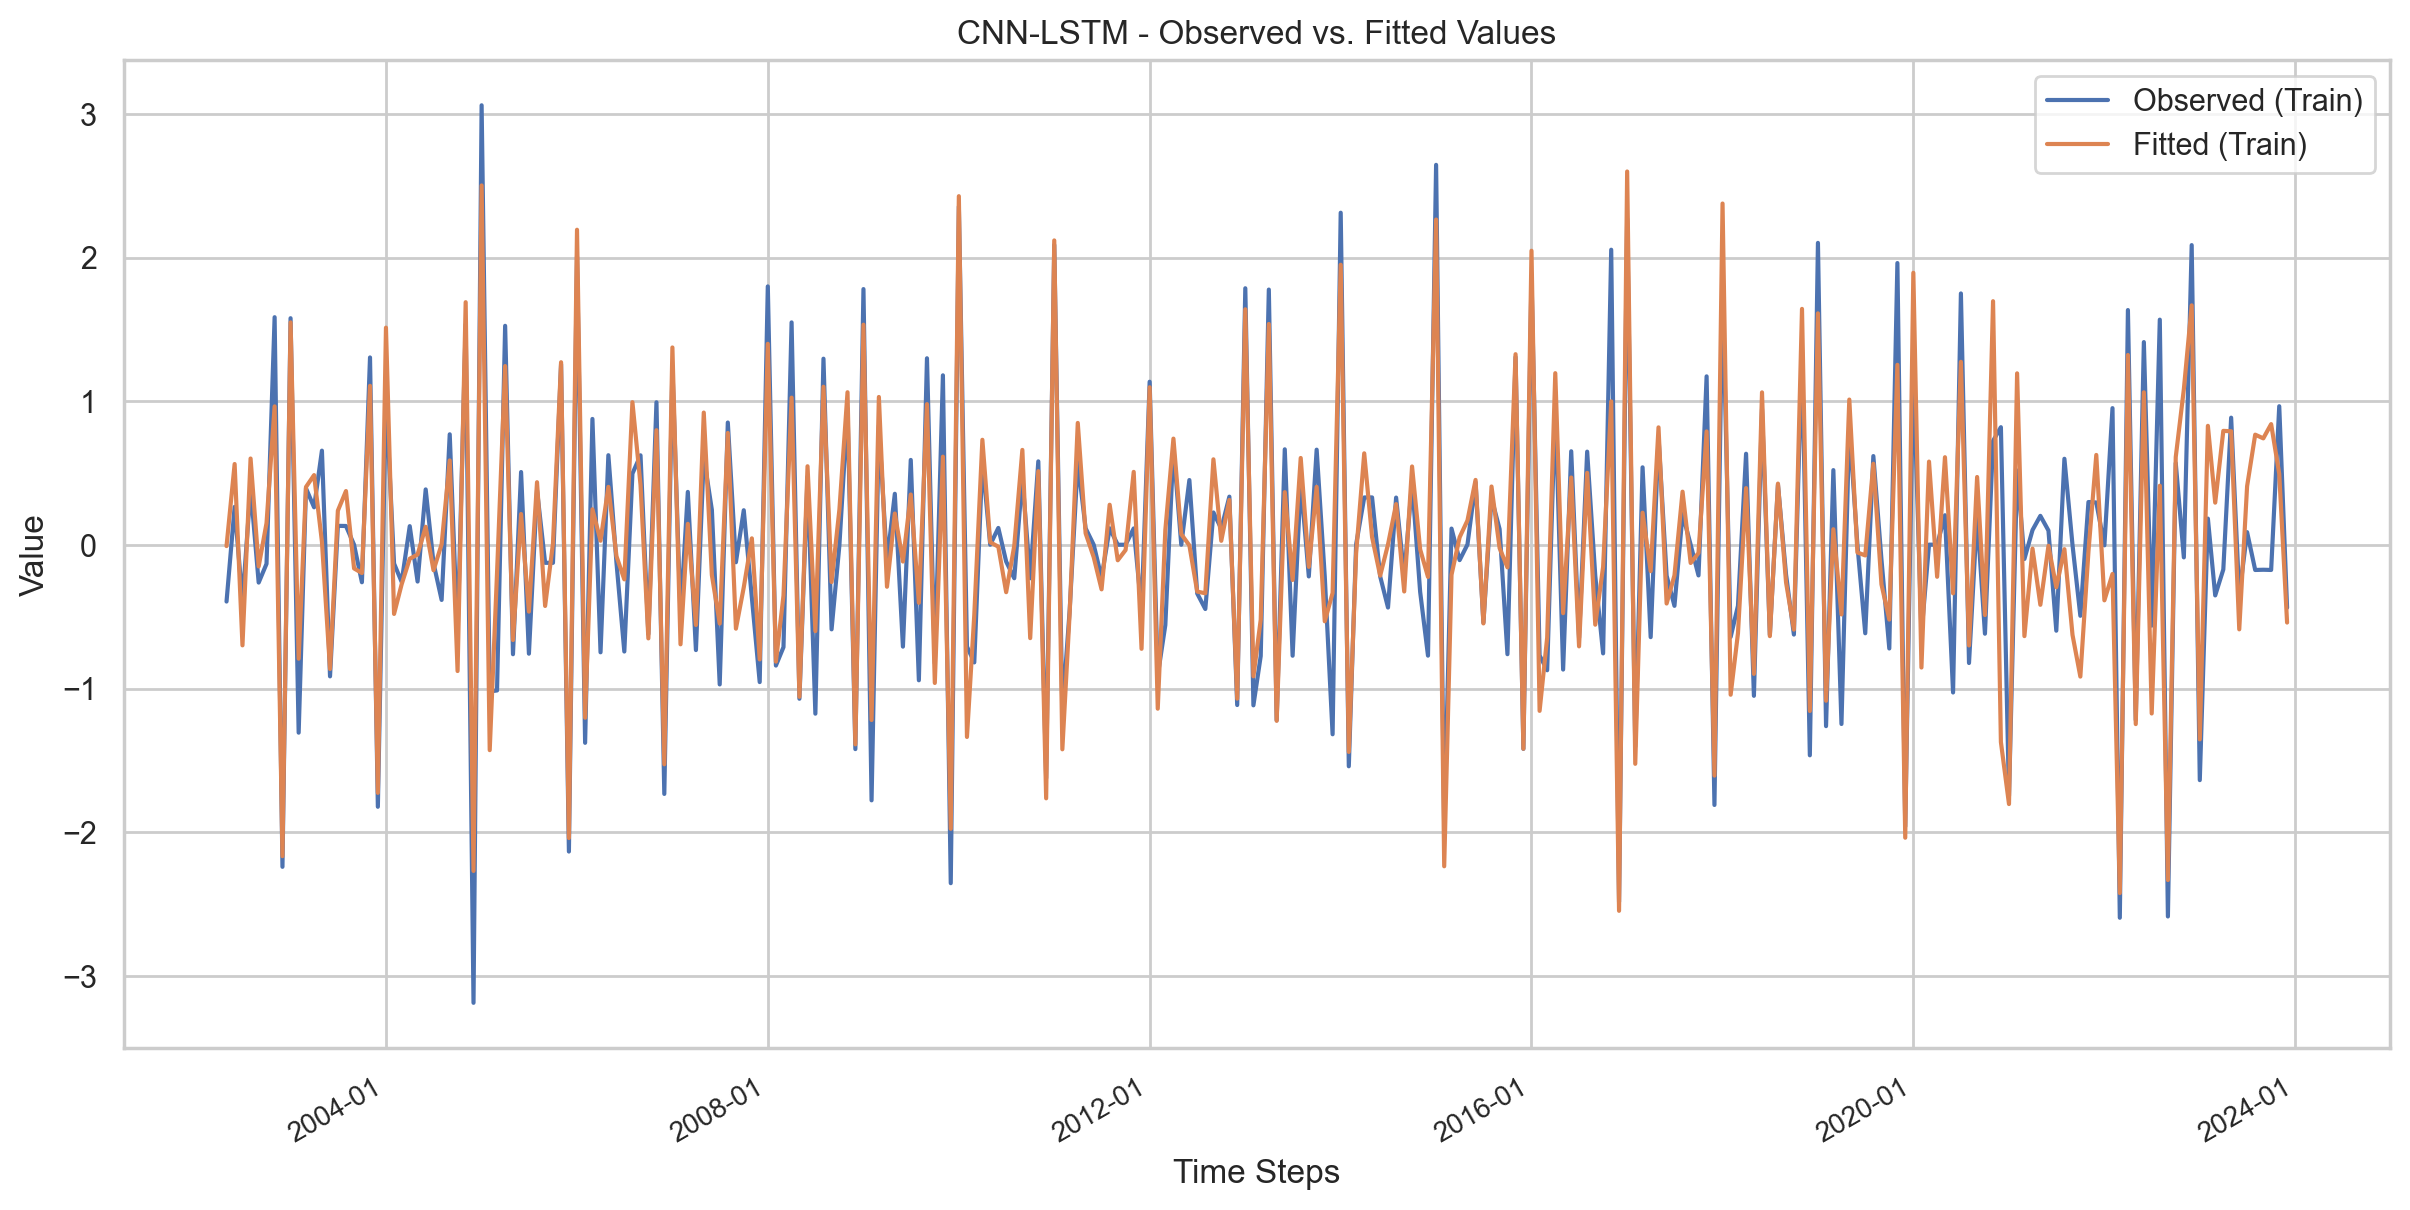

Mean Absolute Error (MAE): 0.34719082
Root Mean Squared Error (RMSE): 0.41287062


In [50]:
model_var_sel, X_train_var_sel, X_test_var_sel, cnn_mae_var_sel, cnn_rmse_var_sel, feature_names_var_sel = cnn_lstm_model(data_iv, test_size)


# CNN-LSTM + VAE

In [39]:

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(data - reconstruction), axis=1))
            mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
            reconstruction_loss = mse(data, reconstruction)
            # mse = tf.keras.losses.MeanSquaredError()
            # reconstruction_loss = mse(data, reconstruction)

            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

def build_vae(input_dim, latent_dim=7):
    # Encoder
    encoder_inputs = Input(shape=(input_dim,))
    x = layers.Dense(64, activation="selu")(encoder_inputs)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = layers.Dense(64, activation="selu")(latent_inputs)
    decoder_outputs = layers.Dense(input_dim, activation="selu")(x)
    decoder = Model(latent_inputs, decoder_outputs, name="decoder")

    # VAE Model
    vae = VAE(encoder, decoder)
    vae.compile(optimizer="adam")
    return vae, encoder


In [40]:
# # 1. Extract raw features (no lagging yet)
# X_vae = data.copy().drop(columns=['CPI'])
# y_target = data['CPI']
#
# # 2. Scale & run VAE (as you already have)
# vae, encoder = build_vae(X_vae.shape[1], latent_dim=5)
# vae.fit(X_vae, X_vae, epochs=50, batch_size=32)
# _, _, z_encoded = encoder.predict(X_vae)
#
# # 3. Combine compressed features + target
# compressed_df = pd.DataFrame(z_encoded, columns=[f'z{i+1}' for i in range(z_encoded.shape[1])], index=data.index)
# compressed_df['CPI'] = y_target.values
#
# # 4. Apply lagging
# data_ls_compressed = create_lag_features(compressed_df, columns=compressed_df.columns, lags=3)
# data_ls_compressed.dropna(inplace=True)

def prepare_vae_data(data):
    # 1. Extract raw features (no lagging yet)
    X_vae = data.copy().drop(columns=[target])
    y_target = data[target]

    # 2. Scale & run VAE (as you already have)
    vae, encoder = build_vae(X_vae.shape[1], latent_dim=7)
    vae.fit(X_vae, X_vae, epochs=50, batch_size=32, verbose=0)

    # print("Input to VAE:", X_vae.shape)
    # print(f"Any NaNs? {np.isnan(X_vae).any()}")
    # print(f"Any infs? {np.isinf(X_vae).any()}")
    # assert X_vae.shape[0] > 0 and X_vae.shape[1] > 0, f"X_vae shape is {X_vae.shape}"

    _, _, z_encoded = encoder.predict(X_vae)

    # 3. Combine compressed features + target
    compressed_df = pd.DataFrame(z_encoded, columns=[f'z{i+1}' for i in range(z_encoded.shape[1])], index=data.index)
    compressed_df[target] = y_target.values

    # 4. Apply lagging
    # data_ls_compressed = create_lag_features(compressed_df.copy(), columns=compressed_df.columns, lags=3)
    # data_ls_compressed.dropna(inplace=True)

    return compressed_df


In [42]:
data_comp = prepare_vae_data(data_m)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Epoch 1/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3404 - val_loss: 0.3139
Epoch 2/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3077 - val_loss: 0.2814
Epoch 3/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2749 - val_loss: 0.2481
Epoch 4/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2411 - val_loss: 0.2135
Epoch 5/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2059 - val_loss: 0.1777
Epoch 6/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1699 - val_loss: 0.1428
Epoch 7/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1353 - val_loss: 0.1123
Epoch 8/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1061 - val_loss: 0.0907
Epoch 9/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0863 - val_loss: 0.0793
Epoch 10/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0762 - val_loss: 0.0744
Epoch 11/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0716 - val_loss: 0.0712
Epoch 12/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

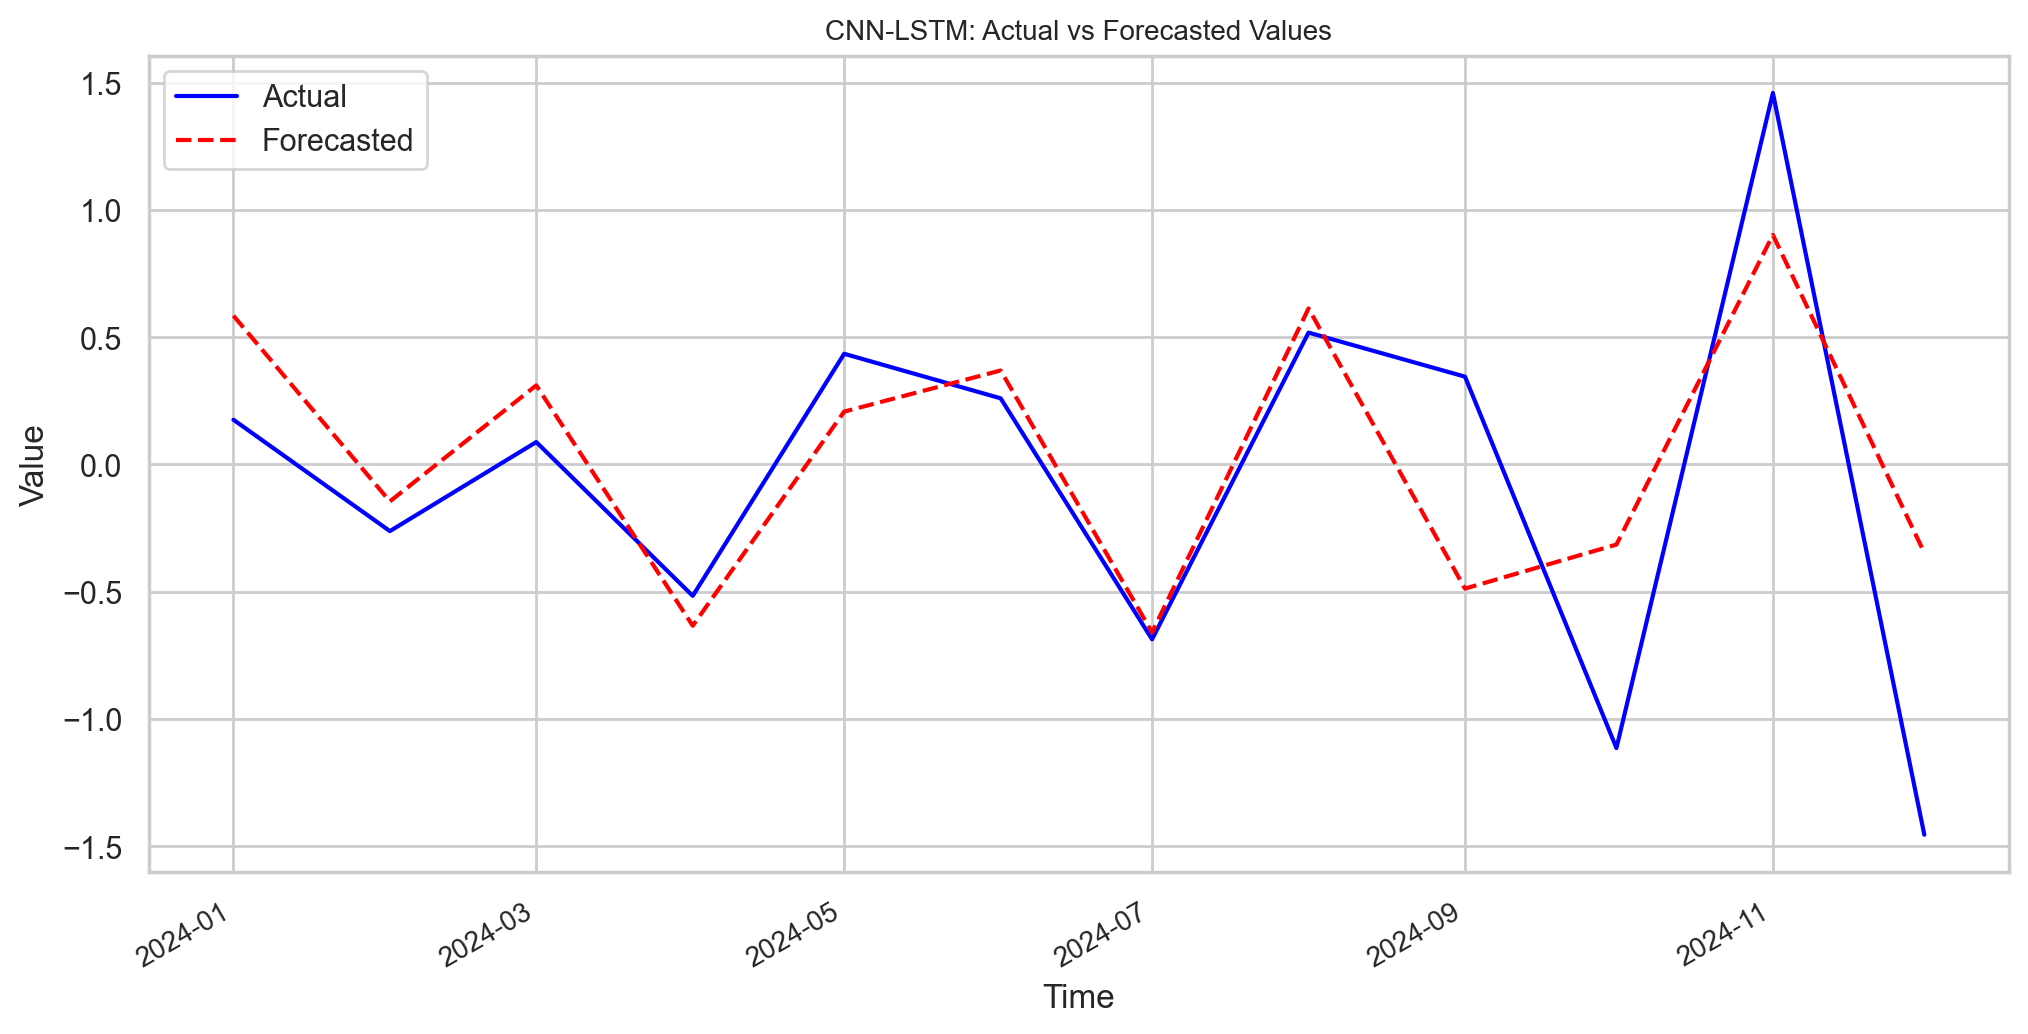

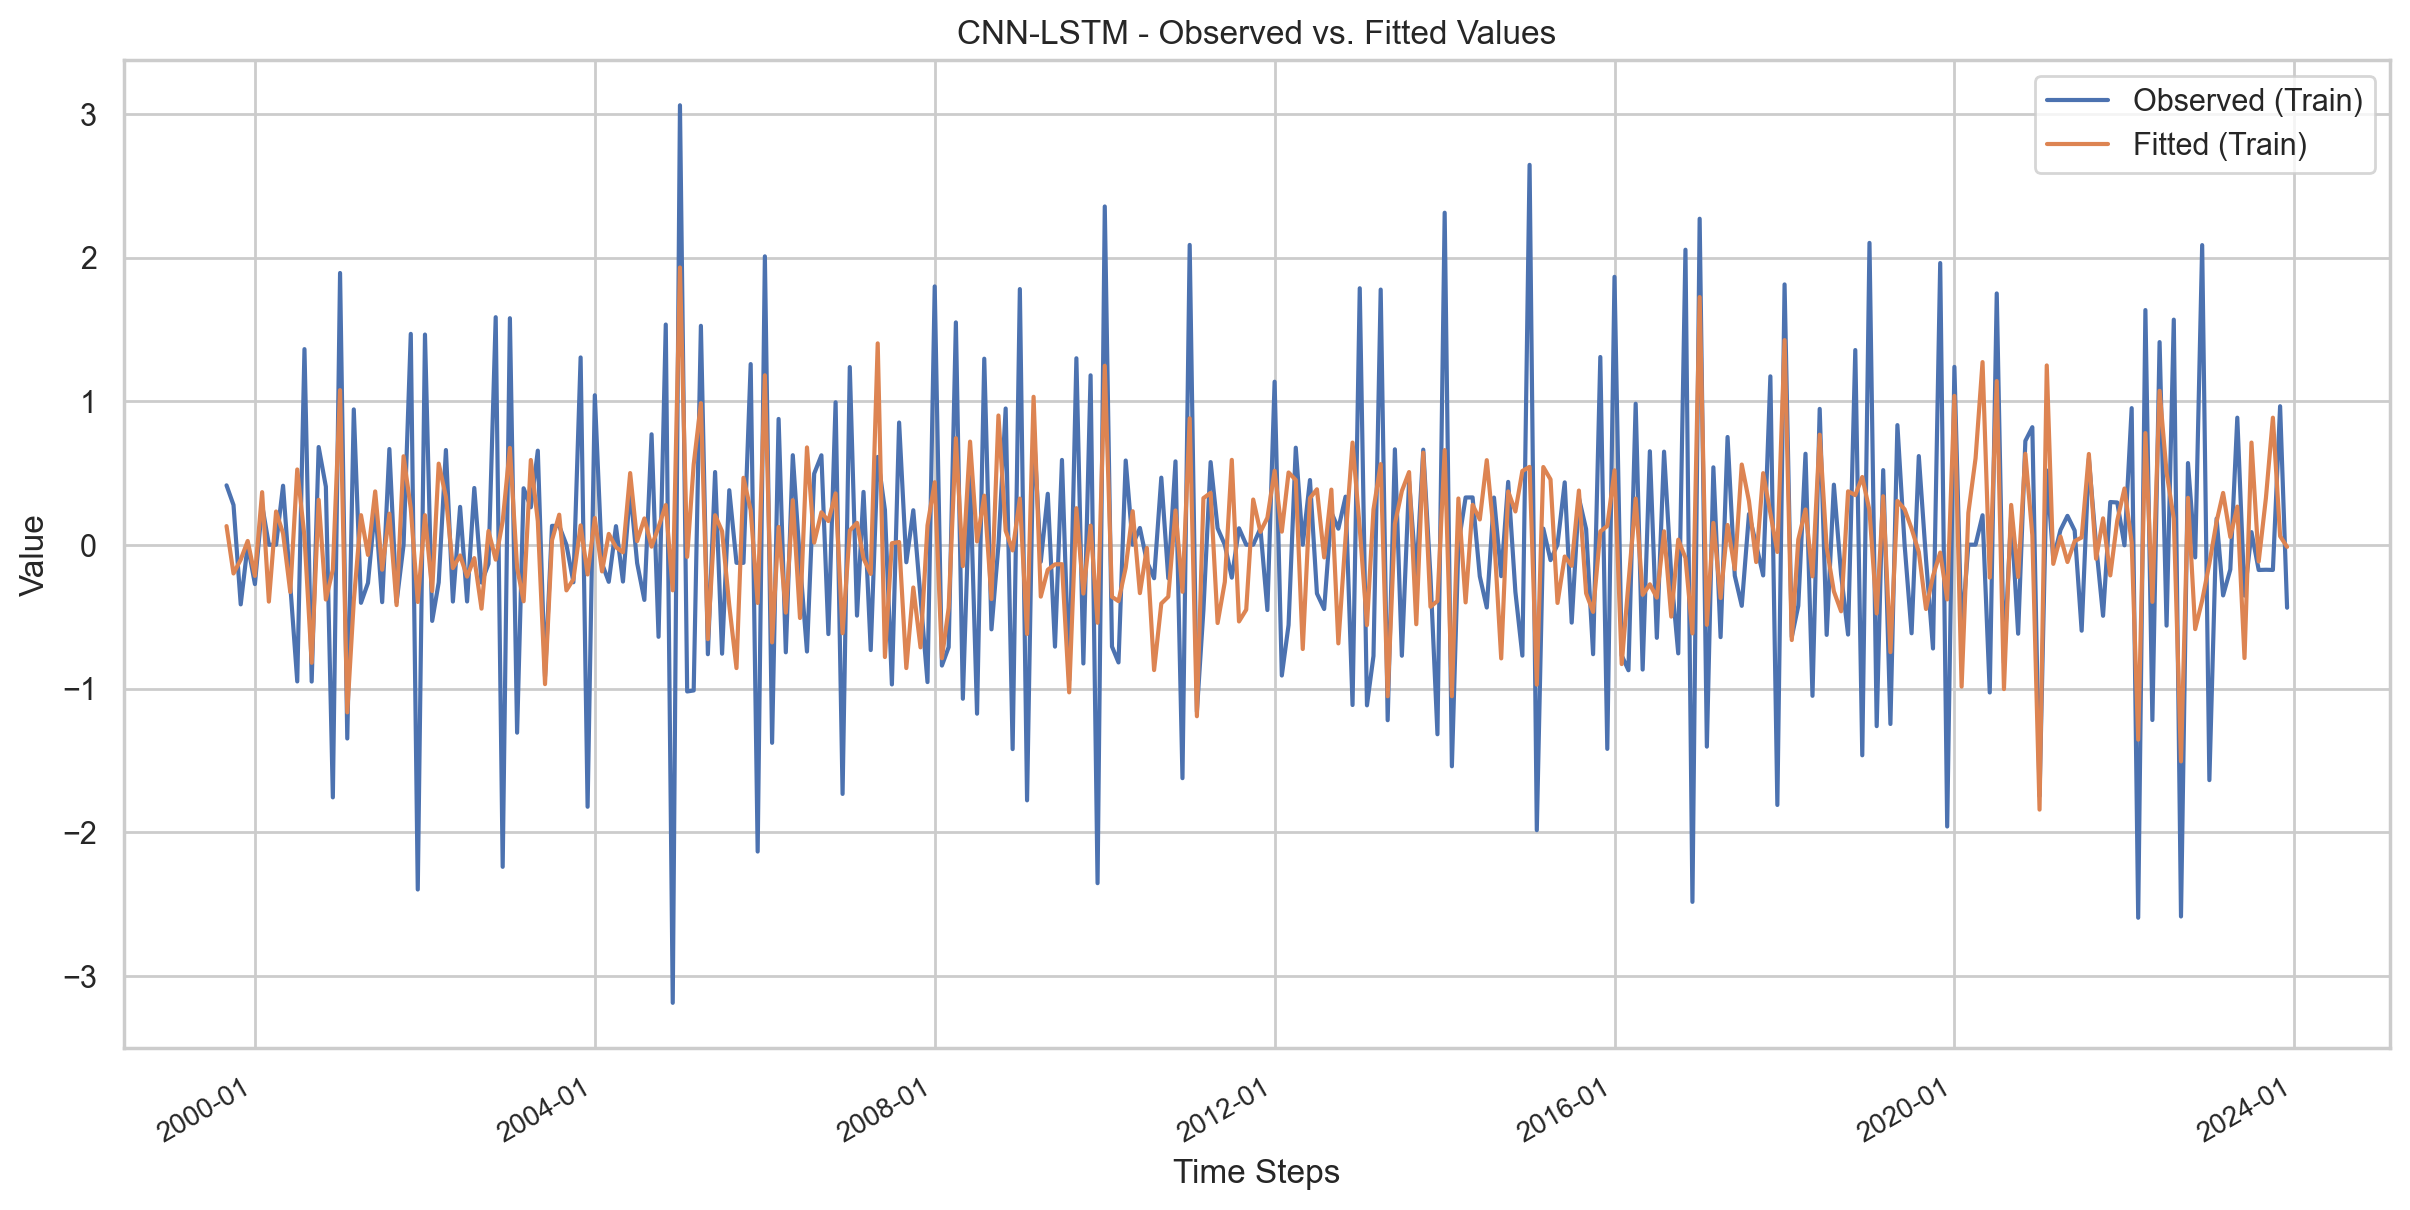

Mean Absolute Error (MAE): 0.38522325
Root Mean Squared Error (RMSE): 0.51550827


In [47]:
model_vae_1, X_train_vae_1, X_test_vae_1, cnn_mae_vae, cnn_rmse_vae, fnames = cnn_lstm_model(data_comp, test_size)


# All results including CNN-LSTM + Variable Selection (VarSel)
For one sample run

In [52]:
print(f'CNN-LSTM + ACF/PCF LAGS (MAE): {pacf_cnn_mae}')
print(f'CNN-LSTM + ACF/PCF LAGS (RMSE): {pacf_ccnn_rmse}')
print(f'CNN-LSTM (MAE) Five Lags: {five_lags_cnn_mae}')
print(f'CNN-LSTM (RMSE) Five Lags: {five_lags_cnn_rmse}')
print(f'CNN-LSTM (MAE): {no_lags_cnn_mae}')
print(f'CNN-LSTM (RMSE): {no_lags_cnn_rmse}')
print(f'CNN-LSTM + VAE (MAE): {cnn_mae_vae}')
print(f'CNN-LSTM + VAE (RMSE): {cnn_rmse_vae}')
print(f'CNN-LSTM + SHAP (MAE): {cnn_mae_var_sel}')
print(f'CNN-LSTM + SHAP (RMSE): {cnn_rmse_var_sel}')
print(f'VAR (MAE): {var_mae}')
print(f'VAR (RMSE): {var_rmse}')
print(f'ARIMA (MAE): {arima_mae}')
print(f'ARIMA (RMSE): {arima_rmse}')
print(f'SARIMA (MAE): {sarima_mae}')
print(f'SARIMA (RMSE): {sarima_rmse}')


CNN-LSTM + ACF/PCF LAGS (MAE): 0.34807973510247403
CNN-LSTM + ACF/PCF LAGS (RMSE): 0.4482611711888576
CNN-LSTM (MAE) Five Lags: 0.3695853737966941
CNN-LSTM (RMSE) Five Lags: 0.461124215549873
CNN-LSTM (MAE): 0.4140688627260014
CNN-LSTM (RMSE): 0.4562107049294147
CNN-LSTM + VAE (MAE): 0.38522325170883603
CNN-LSTM + VAE (RMSE): 0.515508265951256
CNN-LSTM + SHAP (MAE): 0.3471908152937156
CNN-LSTM + SHAP (RMSE): 0.4128706210791123
VAR (MAE): 0.5877618477364212
VAR (RMSE): 0.7477106130859954
ARIMA (MAE): 0.6471004631246271
ARIMA (RMSE): 0.7775001318325307
SARIMA (MAE): 0.5806824756469929
SARIMA (RMSE): 0.7769290897305442


# ***Robust Test***

# ***ALL Models***

In [34]:


def train_and_evaluate_arima_model(data, auto_arima_model, title='ARIMA: Observed vs Fitted', target_column=target, test_size=test_size):
    """
    Performs a rolling multi-step-ahead ARIMA forecast for the entire test dataset.

    Parameters:
    - train_df (pd.DataFrame): Training data
    - test_df (pd.DataFrame): Test data
    - target_column (str): The target variable for evaluation (default 'CPI')
    - steps (int): Number of steps ahead for each rolling forecast

    Returns:
    - forecast_df (pd.DataFrame): Forecasted values for the entire test period
    - mae (float): Mean Absolute Error
    - rmse (float): Root Mean Squared Error
    """

    train_df = data.iloc[:-test_size]
    test_df = data.iloc[-test_size:]

    # Extract target series
    train_series = train_df[target_column]
    test_series = test_df[target_column]

    arima_model = ARIMA(train_series.tolist(), order=auto_arima_model.order)
    model_fit = arima_model.fit()

    # Forecast `forecast_horizon` steps ahead (recursive)
    forecast = model_fit.forecast(steps=test_size)

    # Build output DataFrame
    forecast_index = test_series.index[:test_size]
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[target])
    actual_series = test_series.iloc[:test_size]

    # Metrics
    mae = mean_absolute_error(actual_series, forecast_df[target])
    rmse = np.sqrt(mean_squared_error(actual_series, forecast_df[target]))

    return mae, rmse, forecast_df


def train_eval_cnn_lstm_model(data, test_size=test_size):
    """Main function to execute the pipeline."""
    X_train, y_train, X_test, y_test, train_index, test_index, scaler_y, feature_names_used = prepare_data(data, target, test_size=test_size)
    model = build_model((1, 1, 1, X_train.shape[-1]))
    history = train_model(model, X_train, y_train)
    loss, predictions = evaluate_model(model, X_test, y_test)
    y_test_actual = inverse_transform(scaler_y, y_test)
    predictions_actual = inverse_transform(scaler_y, predictions)

    mae = mean_absolute_error(y_test_actual, predictions_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))

    return mae, rmse, predictions


def train_and_evaluate_var_model(data, lag_order, test_size):
    """
    Trains and evaluates a VAR model on a given dataset.

    Args:
        data (pd.DataFrame): DataFrame with lagged time series data.
        lag_order (int): The lag order for the VAR model.

    Returns:
        tuple: MAE, RMSE, and forecasted CPI values.
    """

    train_df = data.iloc[:-test_size]
    test_df = data.iloc[-test_size:]

    # Fit the VAR model
    model = VAR(train_df)
    var_model = model.fit(lag_order)

    input_data = train_df.values[-lag_order:]
    forecast = var_model.forecast(y=input_data, steps=test_size)

    # Build forecast DataFrame
    forecast_df = pd.DataFrame(forecast, columns=train_df.columns, index=test_df.index)

    # Extract actual and forecasted values for CPI
    actual_cpiauscl = test_df[target]
    forecasted_cpiauscl = forecast_df[target]

    # Compute evaluation metrics
    mae = mean_absolute_error(actual_cpiauscl, forecasted_cpiauscl)
    rmse = np.sqrt(mean_squared_error(actual_cpiauscl, forecasted_cpiauscl))

    return mae, rmse, forecasted_cpiauscl


def train_and_evaluate_sarima_model(data, auto_arima_model_sarima, test_size, target_column=target):

    # Extract target series for SARIMA
    train_df = data.iloc[:-test_size]
    test_df = data.iloc[-test_size:]

    # Extract target series for SARIMA
    train_cpiauscl_arima = train_df[target_column]
    test_cpiauscl_arima = test_df[target_column]

    # Ensure the index is datetime for proper date manipulation
    train_cpiauscl_arima.index = pd.to_datetime(train_cpiauscl_arima.index)

    history = train_cpiauscl_arima.tolist()
    sarima_model = SARIMAX(history,
                           order=auto_arima_model_sarima.order,
                           seasonal_order=auto_arima_model_sarima.seasonal_order,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    sarima_model_fit = sarima_model.fit(disp=False)  # disp=False to suppress convergence output
    forecast = sarima_model_fit.forecast(steps=test_size)
    forecast_df = pd.DataFrame(forecast, index=test_cpiauscl_arima.index, columns=[target_column])

    mae_sarima = mean_absolute_error(test_cpiauscl_arima, forecast_df[target_column])
    rmse_sarima = np.sqrt(mean_squared_error(test_cpiauscl_arima, forecast_df[target_column]))
    forecasted_cpi = forecast_df[target_column]

    return mae_sarima, rmse_sarima, forecasted_cpi


# 100 Subsample run

In [35]:
series_name = "dfCPI_full_dataset_subsample"


# Column Definitions

In [36]:
main_vars_ex_lags = main_vars.copy()
main_vars_plus_5lags = data.columns.tolist()
main_vars_plus_cpi_acf_pcf_lags = data_acf_pacf.columns.tolist()
test_size = 12

Error Arrays

In [37]:
var_maes = []
var_rmses = []
var_all_forecasts = []

arima_maes = []
arima_rmses = []
arima_all_forecasts = []

sarima_maes = []
sarima_rmses = []
sarima_all_forecasts = []

cnn_maes = []
cnn_rmses = []
cnn_all_predictions = []

cnn_5lags_maes = []
cnn_5lags_rmses = []
cnn_5lags_all_predictions = []

cnn_acf_pacf_lags_maes = []
cnn_acf_pacf_lags_rmses = []
cnn_acf_pacf_all_lags_predictions = []

cnn_shap_maes = []
cnn_shap_rmses = []
cnn_shap_all_predictions = []

cnn_vae_maes = []
cnn_vae_rmses = []
cnn_vae_all_predictions = []


In [49]:

for i in range(100):

    filename = f"{series_name}_{i + 1}.csv"
    file_path = os.path.join(all_LagsCPI_Dir, filename)
    data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    base_data = data[main_vars_ex_lags]

    # VAR
    var_mae, var_rmse, var_forecasted_cpi = train_and_evaluate_var_model(base_data, var_lag_order, test_size=test_size)
    var_maes.append(var_mae)
    var_rmses.append(var_rmse)
    var_all_forecasts.append(var_forecasted_cpi)

    # ARIMA
    arima_mae, arima_rmse, arima_forecasted = train_and_evaluate_arima_model(base_data, auto_arima_model_arima, test_size=test_size)
    arima_maes.append(arima_mae)
    arima_rmses.append(arima_rmse)
    arima_all_forecasts.append(arima_forecasted)

    # SARIMA
    sarima_mae, sarima_rmse, sarima_forecasted_cpi = train_and_evaluate_sarima_model(base_data, auto_arima_model_sarima, test_size, target_column=target)
    sarima_maes.append(sarima_mae)
    sarima_rmses.append(sarima_rmse)
    sarima_all_forecasts.append(sarima_forecasted_cpi)

    # CNN-LSTM BASE
    cnn_mae, cnn_rmse, cnn_predictions = train_eval_cnn_lstm_model(base_data, test_size=test_size)
    cnn_maes.append(cnn_mae)
    cnn_rmses.append(cnn_rmse)
    cnn_all_predictions.append(cnn_predictions)

    # CNN-LSTM 5 lags
    cnn_5lags_data = data[main_vars_plus_5lags]
    cnn_5_lags_mae, cnn_5lags_rmse, cnn_5lags_predictions = train_eval_cnn_lstm_model(cnn_5lags_data, test_size=test_size)
    cnn_5lags_maes.append(cnn_5_lags_mae)
    cnn_5lags_rmses.append(cnn_5lags_rmse)
    cnn_5lags_all_predictions.append(cnn_5lags_predictions)

    # CNN-LSTM 5 lags
    cnn_acf_pacf_lags_data = data[main_vars_plus_cpi_acf_pcf_lags]
    cnn_acf_pacf_lags_mae, cnn_acf_pacf_lags_rmse, cnn_acf_pacf_lags_prediction = train_eval_cnn_lstm_model(cnn_acf_pacf_lags_data, test_size=test_size)
    cnn_acf_pacf_lags_maes.append(cnn_acf_pacf_lags_mae)
    cnn_acf_pacf_lags_rmses.append(cnn_acf_pacf_lags_rmse)
    cnn_acf_pacf_all_lags_predictions.append(cnn_acf_pacf_lags_prediction)

    # CNN-LSTM SHAP vars
    cnn_shap_data = data[top_influential_variables]
    cnn_shap_mae, cnn_shap_rmse, cnn_shap_predictions = train_eval_cnn_lstm_model(cnn_shap_data, test_size=test_size)
    cnn_shap_maes.append(cnn_shap_mae)
    cnn_shap_rmses.append(cnn_shap_rmse)
    cnn_shap_all_predictions.append(cnn_shap_predictions)

    # CNN-LSTM VAE
    vae_data_comp = prepare_vae_data(base_data)
    cnn_vae_mae, cnn_vae_rmse, cnn_vae_predictions = train_eval_cnn_lstm_model(vae_data_comp, test_size=test_size)
    cnn_vae_maes.append(cnn_vae_mae)
    cnn_vae_rmses.append(cnn_vae_rmse)
    cnn_vae_all_predictions.append(cnn_vae_predictions)



/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
2025-05-26 18:21:49.110686: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [18,64] vs. [0]
	 [[{{function_node __inference_one_step_on_data_4295741}}{{node adam/truediv_1}}]]


InvalidArgumentError: Graph execution error:

Detected at node adam/truediv_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/var/folders/82/hxq3jkp51d38wnvh074k_2vh0000gn/T/ipykernel_1776/225592385.py", line 54, in <module>

  File "/var/folders/82/hxq3jkp51d38wnvh074k_2vh0000gn/T/ipykernel_1776/560854619.py", line 25, in prepare_vae_data

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/var/folders/82/hxq3jkp51d38wnvh074k_2vh0000gn/T/ipykernel_1776/1472657689.py", line 26, in train_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py", line 344, in apply_gradients

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py", line 409, in apply

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py", line 472, in _backend_apply_gradients

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/optimizer.py", line 122, in _backend_update_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/optimizer.py", line 136, in _distributed_tf_update_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/optimizer.py", line 133, in apply_grad_to_update_var

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/adam.py", line 147, in update_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 5876, in divide

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/sparse.py", line 780, in sparse_wrapper

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 2316, in divide

Incompatible shapes: [18,64] vs. [0]
	 [[{{node adam/truediv_1}}]] [Op:__inference_one_step_on_iterator_4295824]

In [45]:

# print(var_maes, arima_maes, sarima_maes, cnn_5lags_maes, cnn_acf_pacf_lags_maes, cnn_shap_maes, cnn_vae_maes)


In [ ]:
print()

In [70]:

# Calculate and print average MAE and RMSE for the ARIMA model
avg_arima_mae = np.mean(arima_maes)
avg_arima_rmse = np.mean(arima_rmses)

print(f'ARIMA Average MAE: {avg_arima_mae}')
print(f'ARIMA Average RMSE: {avg_arima_rmse}')


ARIMA Average MAE: 0.7529862939059849
ARIMA Average RMSE: 0.9509285208857976


VAR Average MAE: 0.9455281108145063
VAR Average RMSE: 1.149055155426176


ValueError: x and y must have same first dimension, but have shapes (100,) and (17,)

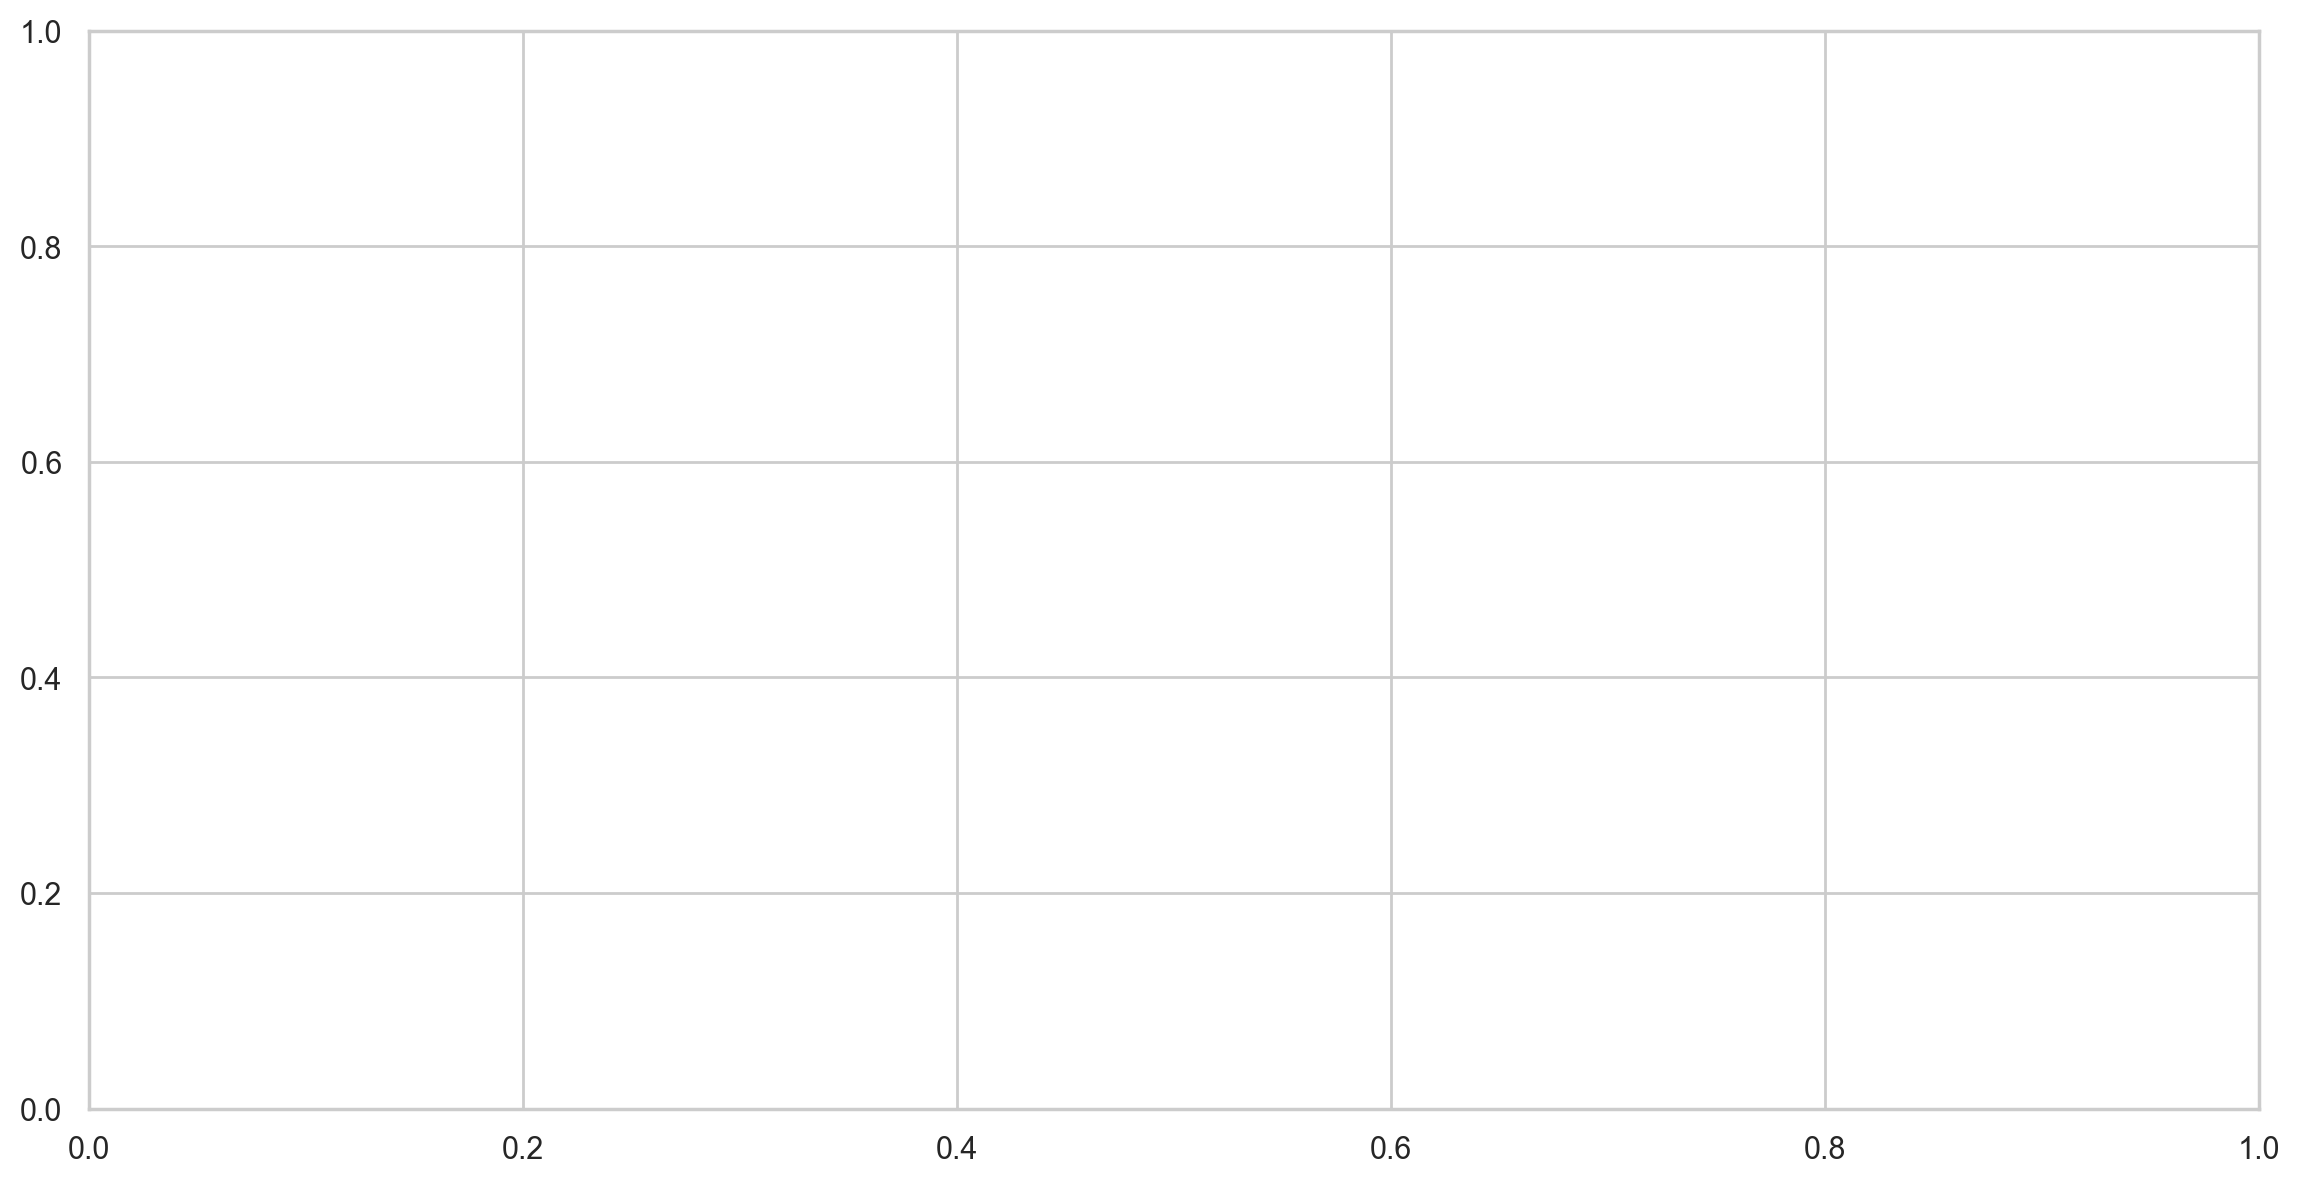

In [46]:

# Calculate and print average MAE and RMSE for the VAR model
avg_arima_mae = np.mean(arima_maes)
avg_arima_rmse = np.mean(arima_rmses)

print(f'VAR Average MAE: {avg_arima_mae}')
print(f'VAR Average RMSE: {avg_arima_rmse}')

# Calculate standard deviation for MAE and RMSE
std_arima_mae = np.std(arima_maes)
std_arima_rmse = np.std(arima_rmses)

# Plotting the MAEs and RMSEs with shaded confidence intervals
plt.figure(figsize=(14, 7))

# Plot VAR MAEs with shaded confidence interval
plt.plot(range(1, 101), arima_maes, label='ARIMA MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 101),
                 np.array(arima_maes) - std_arima_mae,
                 np.array(arima_maes) + std_arima_mae,
                 color='blue', alpha=0.2, label='MAE Confidence Interval')

# Add horizontal lines for average MAE and RMSE
plt.axhline(y=avg_arima_mae, color='blue', linestyle='--', alpha=0.5, label=f'Avg ARIMA MAE: {avg_arima_mae:.4f}')

# Add annotations for average values
plt.text(101, avg_arima_mae, f'Avg MAE: {avg_arima_mae:.4f}', color='blue', va='center', ha='left')

# Customize the plot
plt.title('ARIMA: MAE and RMSE over 100 Random States with Confidence Intervals', fontsize=16)
plt.xlabel('Random State', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ***VAR***

VAR Average MAE: 0.78721248870649
VAR Average RMSE: 0.9717018438313285


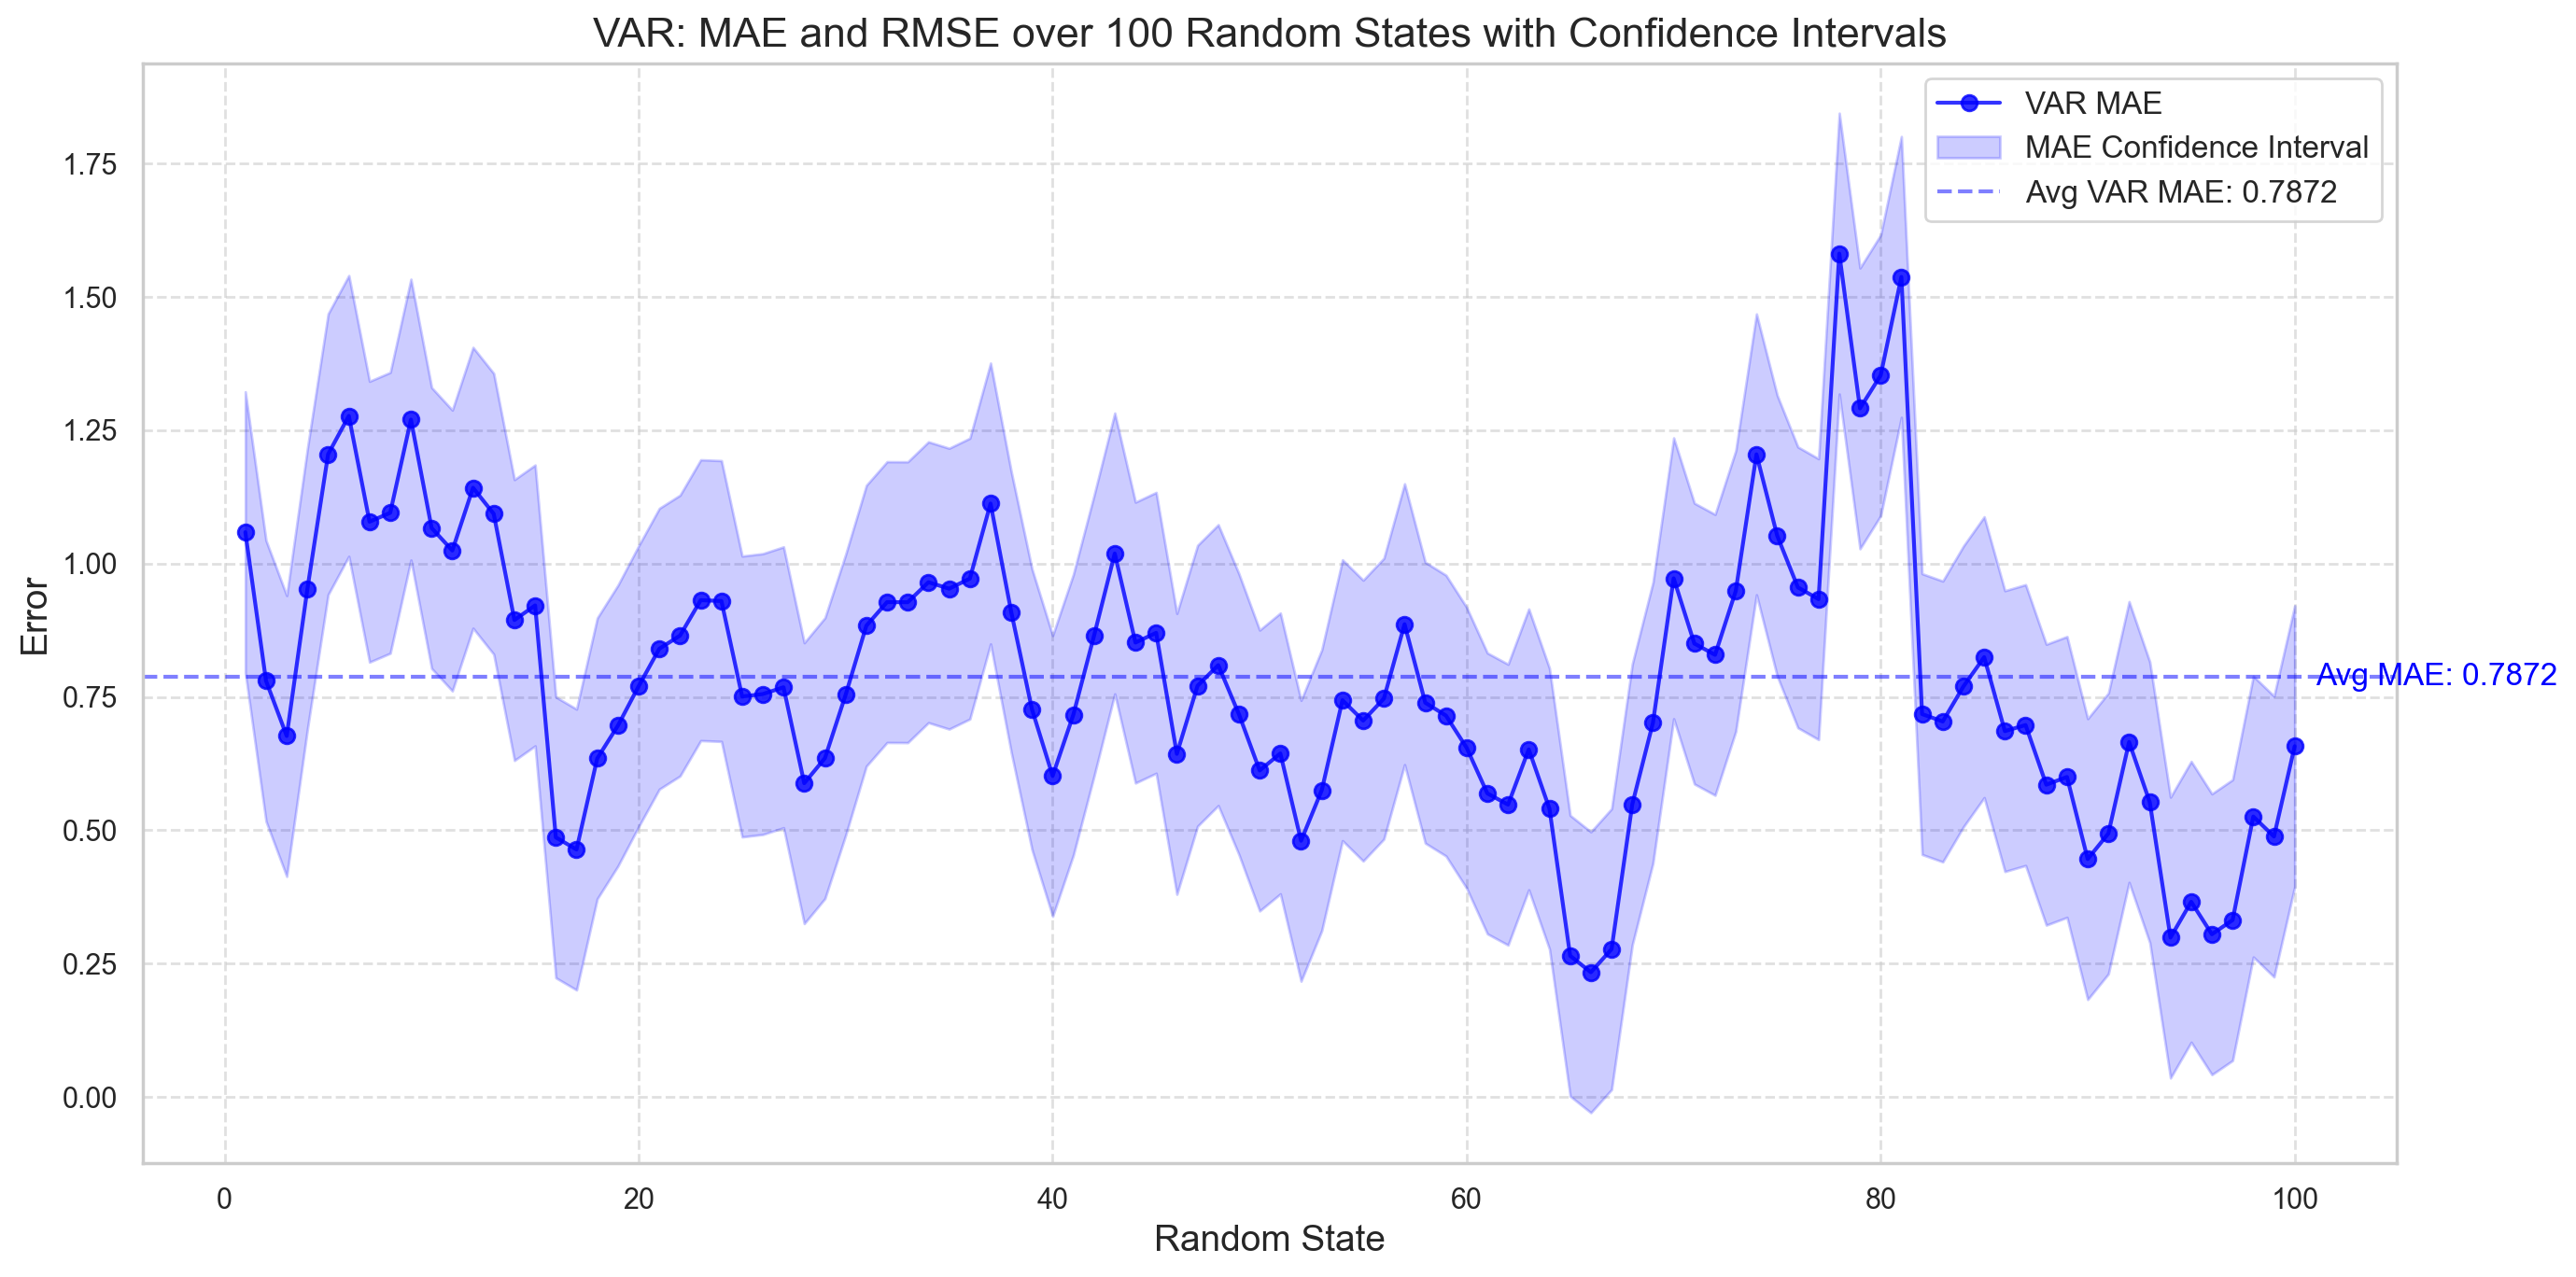

In [62]:

# Calculate and print average MAE and RMSE for the VAR model
avg_var_mae = np.mean(var_maes)
avg_var_rmse = np.mean(var_rmses)

print(f'VAR Average MAE: {avg_var_mae}')
print(f'VAR Average RMSE: {avg_var_rmse}')

# Calculate standard deviation for MAE and RMSE
std_var_mae = np.std(var_maes)
std_var_rmse = np.std(var_rmses)

# Plotting the MAEs and RMSEs with shaded confidence intervals
plt.figure(figsize=(14, 7))

# Plot VAR MAEs with shaded confidence interval
plt.plot(range(1, 101), var_maes, label='VAR MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 101),
                 np.array(var_maes) - std_var_mae,
                 np.array(var_maes) + std_var_mae,
                 color='blue', alpha=0.2, label='MAE Confidence Interval')

# Add horizontal lines for average MAE and RMSE
plt.axhline(y=avg_var_mae, color='blue', linestyle='--', alpha=0.5, label=f'Avg VAR MAE: {avg_var_mae:.4f}')

# Add annotations for average values
plt.text(101, avg_var_mae, f'Avg MAE: {avg_var_mae:.4f}', color='blue', va='center', ha='left')

# Customize the plot
plt.title('VAR: MAE and RMSE over 100 Random States with Confidence Intervals', fontsize=16)
plt.xlabel('Random State', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ***SARIMA***

SARIMA Average MAE: 0.7085595359770843
SARIMA Average RMSE: 0.9105527171333319


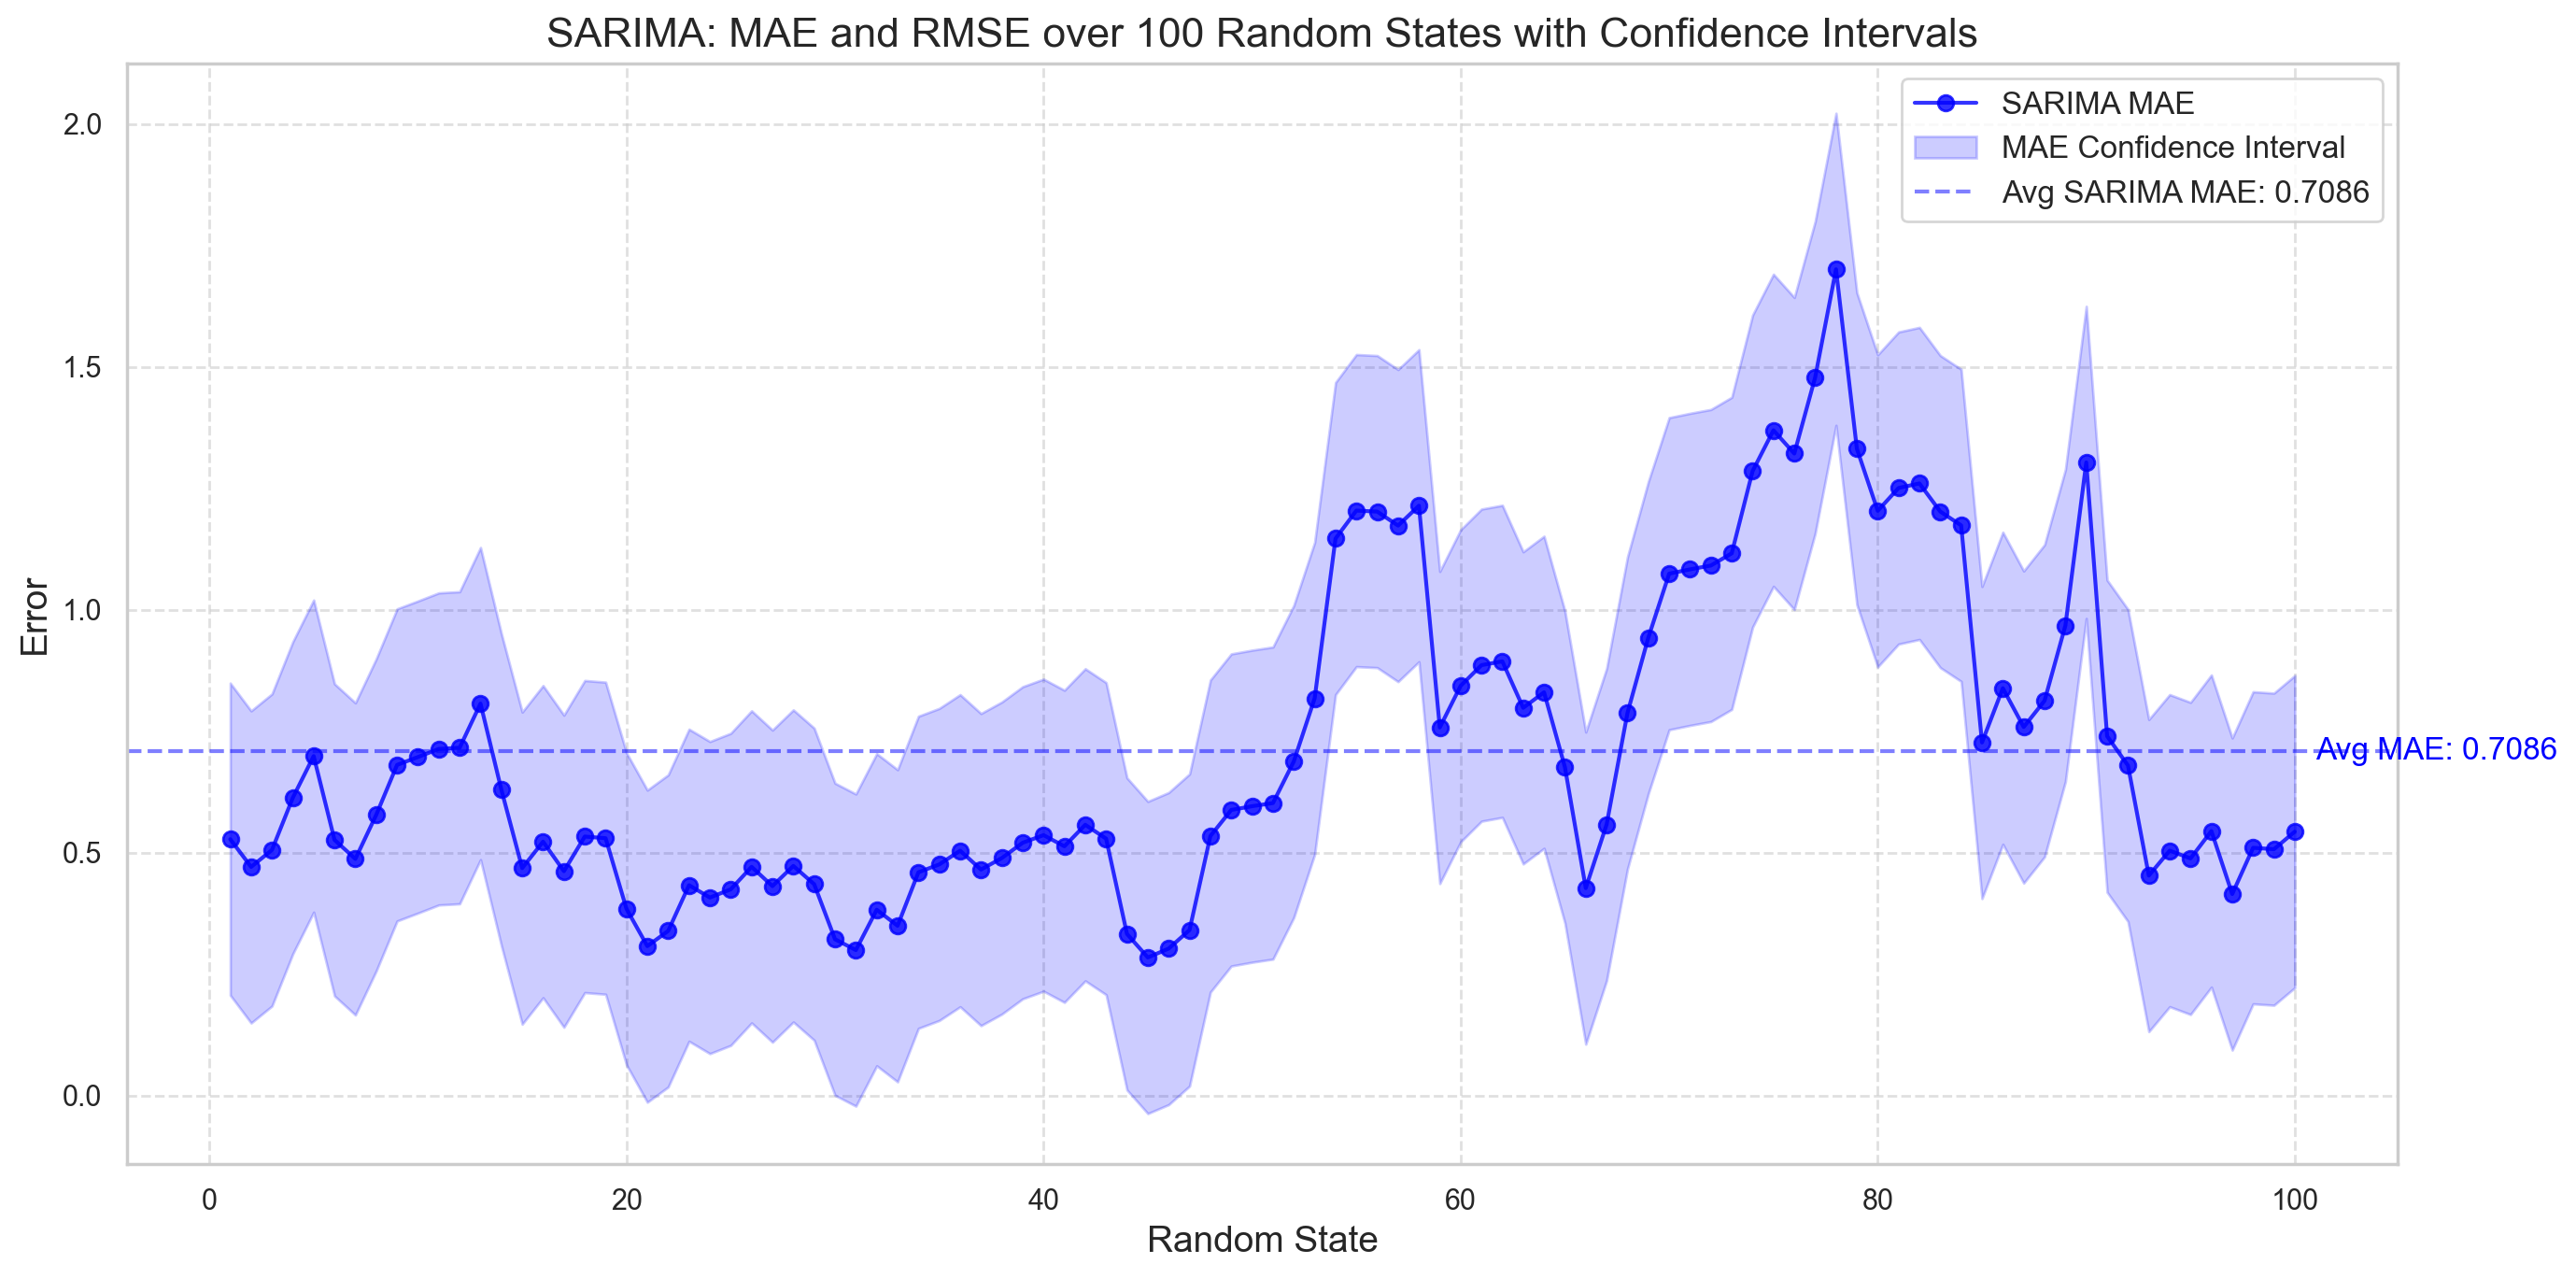

In [67]:

# Calculate and print average MAE and RMSE for the VAR model
avg_sarima_mae = np.mean(sarima_maes)
avg_sarima_rmse = np.mean(sarima_rmses)

print(f'SARIMA Average MAE: {avg_sarima_mae}')
print(f'SARIMA Average RMSE: {avg_sarima_rmse}')

# Calculate standard deviation for MAE and RMSE
std_sarima_mae = np.std(sarima_maes)
std_sarima_rmse = np.std(sarima_rmses)

# Plotting the MAEs and RMSEs with shaded confidence intervals
plt.figure(figsize=(14, 7))

# Plot VAR MAEs with shaded confidence interval
plt.plot(range(1, 101), sarima_maes, label='SARIMA MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 101),
                 np.array(sarima_maes) - std_sarima_mae,
                 np.array(sarima_maes) + std_sarima_mae,
                 color='blue', alpha=0.2, label='MAE Confidence Interval')

# Add horizontal lines for average MAE and RMSE
plt.axhline(y=avg_sarima_mae, color='blue', linestyle='--', alpha=0.5, label=f'Avg SARIMA MAE: {avg_sarima_mae:.4f}')

# Add annotations for average values
plt.text(101, avg_sarima_mae, f'Avg MAE: {avg_sarima_mae:.4f}', color='blue', va='center', ha='left')

# Customize the plot
plt.title('SARIMA: MAE and RMSE over 100 Random States with Confidence Intervals', fontsize=16)
plt.xlabel('Random State', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 # ***CNN-LSTM Base***

CNN-LSTM Average MAE: 2.744249506898298
CNN-LSTM Average RMSE: 2.9266302964007007


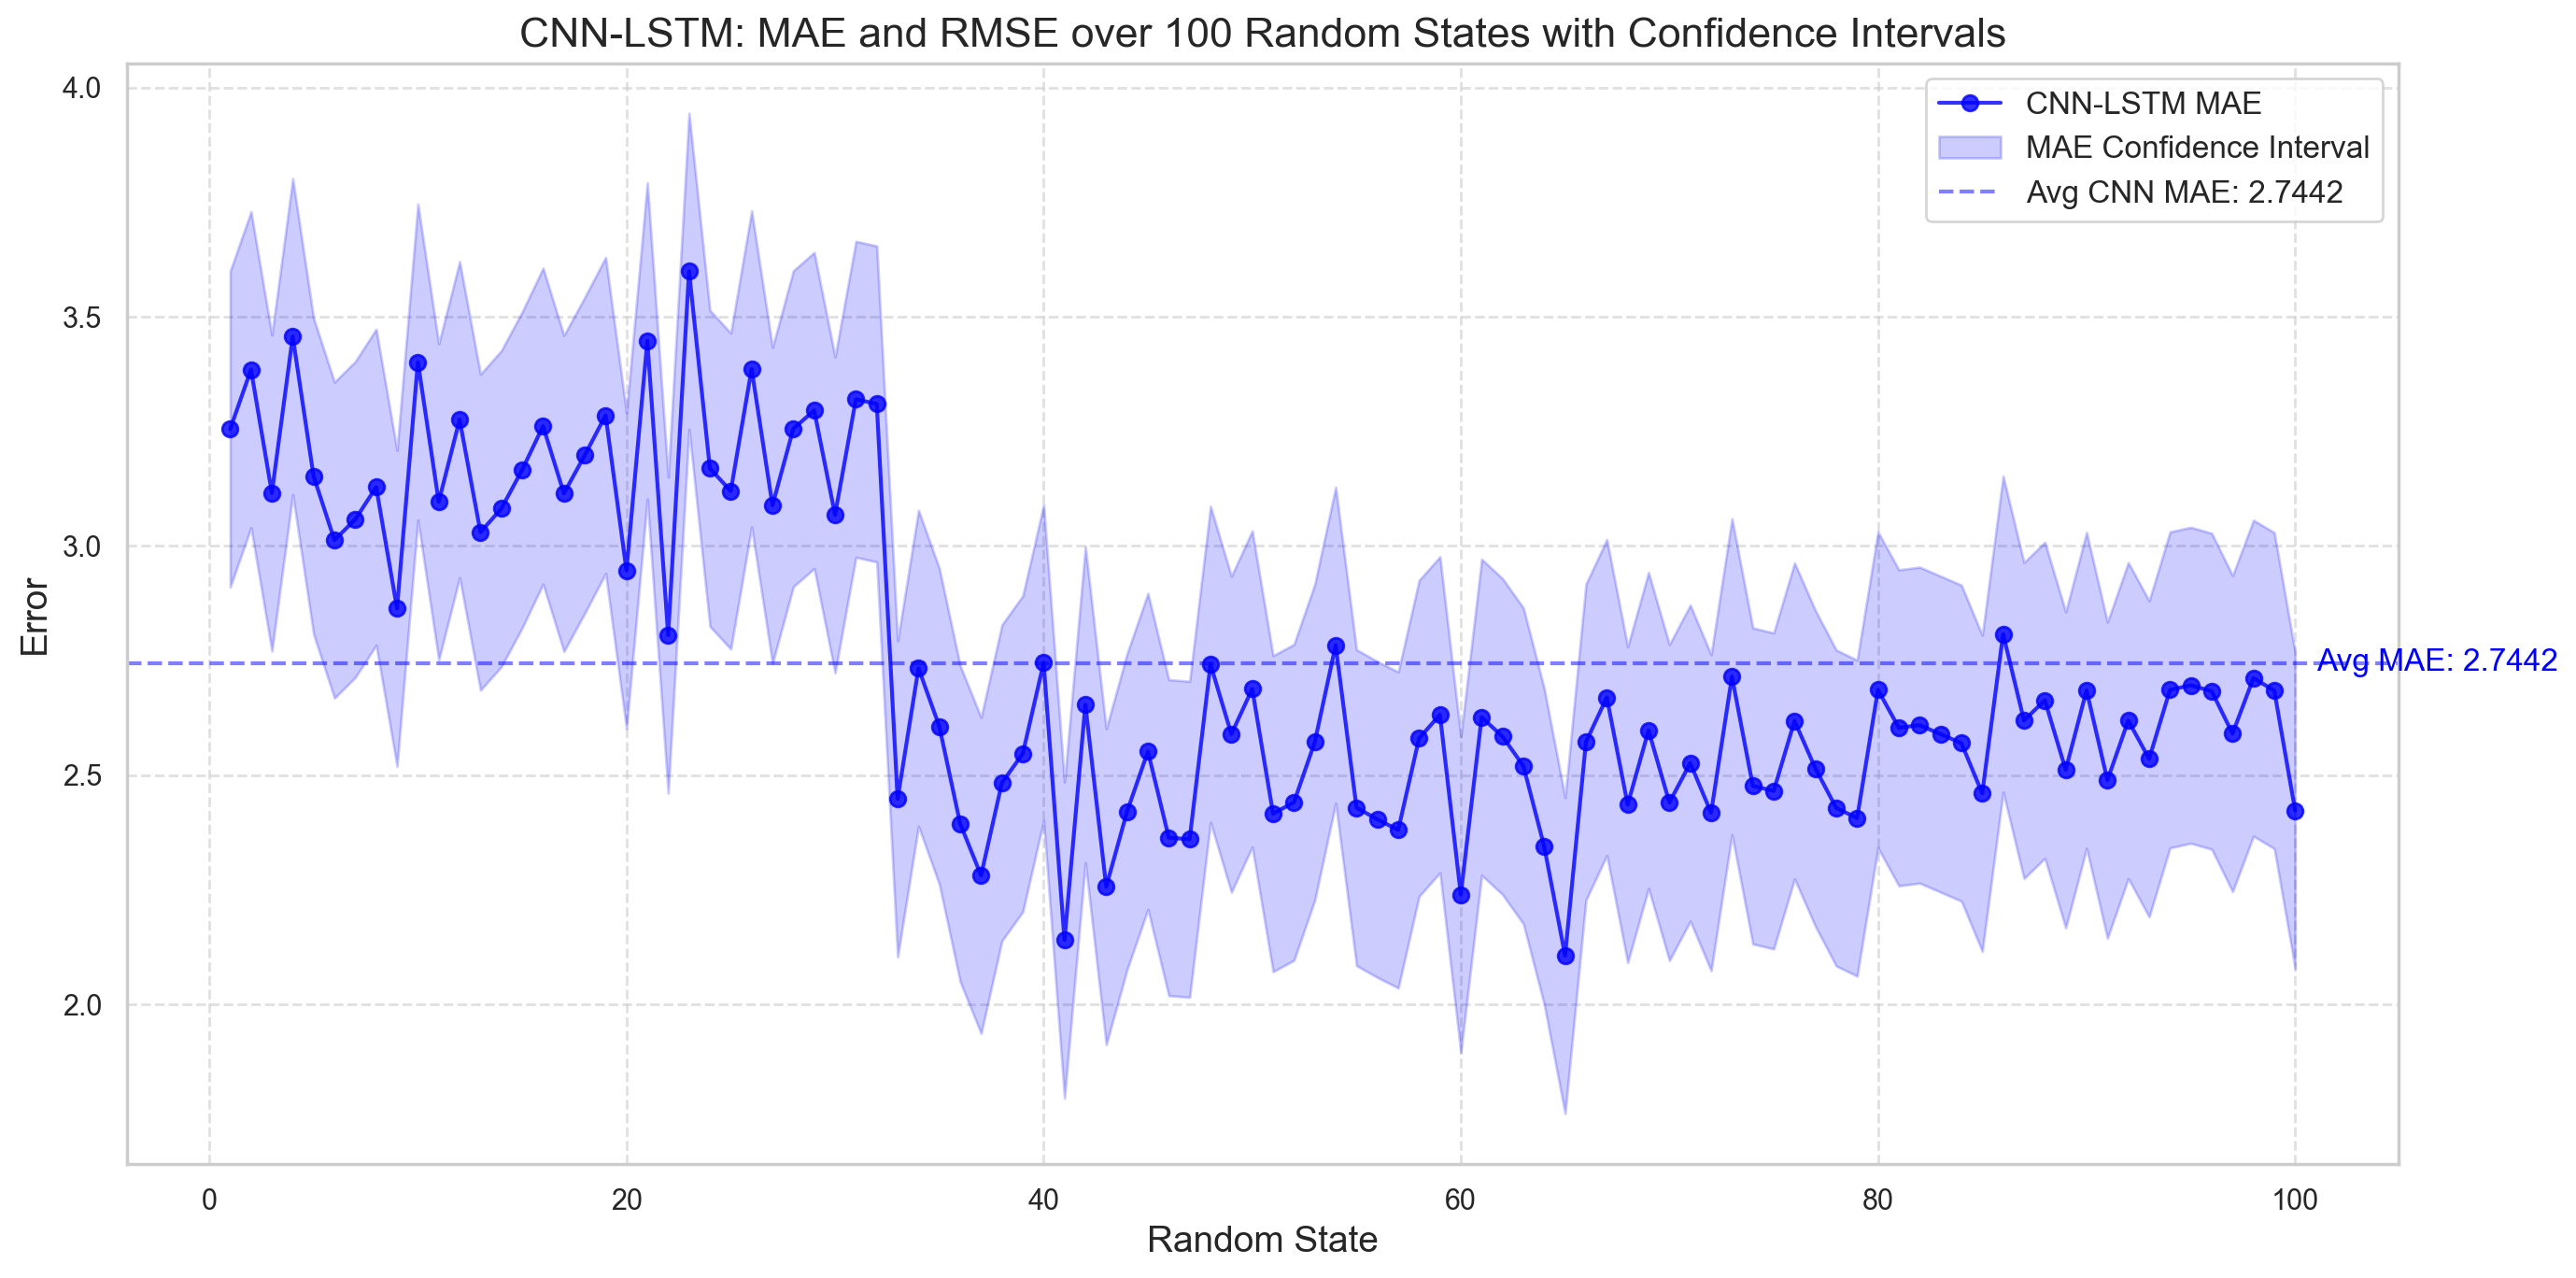

In [79]:
# Calculate and print average MAE and RMSE
avg_cnn_mae = np.mean(cnn_maes)
avg_cnn_rmse = np.mean(cnn_rmses)

# Calculate and print average MAE and RMSE for the VAR model

print(f'CNN-LSTM Average MAE: {avg_cnn_mae}')
print(f'CNN-LSTM Average RMSE: {avg_cnn_rmse}')

# Calculate standard deviation for MAE and RMSE
std_cnn_mae = np.std(cnn_maes)
std_cnn_rmse = np.std(cnn_rmses)

# Plotting the MAEs and RMSEs with shaded confidence intervals
plt.figure(figsize=(14, 7))

# Plot VAR MAEs with shaded confidence interval
plt.plot(range(1, 101), cnn_maes, label='CNN-LSTM MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 101),
                 np.array(cnn_maes) - std_cnn_mae,
                 np.array(cnn_maes) + std_cnn_mae,
                 color='blue', alpha=0.2, label='MAE Confidence Interval')

# Add horizontal lines for average MAE and RMSE
plt.axhline(y=avg_cnn_mae, color='blue', linestyle='--', alpha=0.5, label=f'Avg CNN MAE: {avg_cnn_mae:.4f}')

# Add annotations for average values
plt.text(101, avg_cnn_mae, f'Avg MAE: {avg_cnn_mae:.4f}', color='blue', va='center', ha='left')

# Customize the plot
plt.title('CNN-LSTM: MAE and RMSE over 100 Random States with Confidence Intervals', fontsize=16)
plt.xlabel('Random State', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# CNN-LSTM 5 lags

In [ ]:
# Calculate and print average MAE and RMSE
avg_5lags_cnn_mae = np.mean(cnn_5lags_maes)
avg_5lags_cnn_rmse = np.mean(cnn_5lags_rmses)

print(f'Average MAE: {avg_5lags_cnn_mae}')
print(f'Average RMSE: {avg_5lags_cnn_rmse}')

# CNN-LSTM With ACF/PACF lags

In [ ]:
# Calculate and print average MAE and RMSE
avg_cnn_acf_pacf_lags_maes = np.mean(cnn_acf_pacf_lags_maes)
avg_cnn_acf_pacf_lags_rmses = np.mean(cnn_acf_pacf_lags_rmses)

print(f'Average MAE: {avg_5lags_cnn_mae}')
print(f'Average RMSE: {avg_5lags_cnn_rmse}')


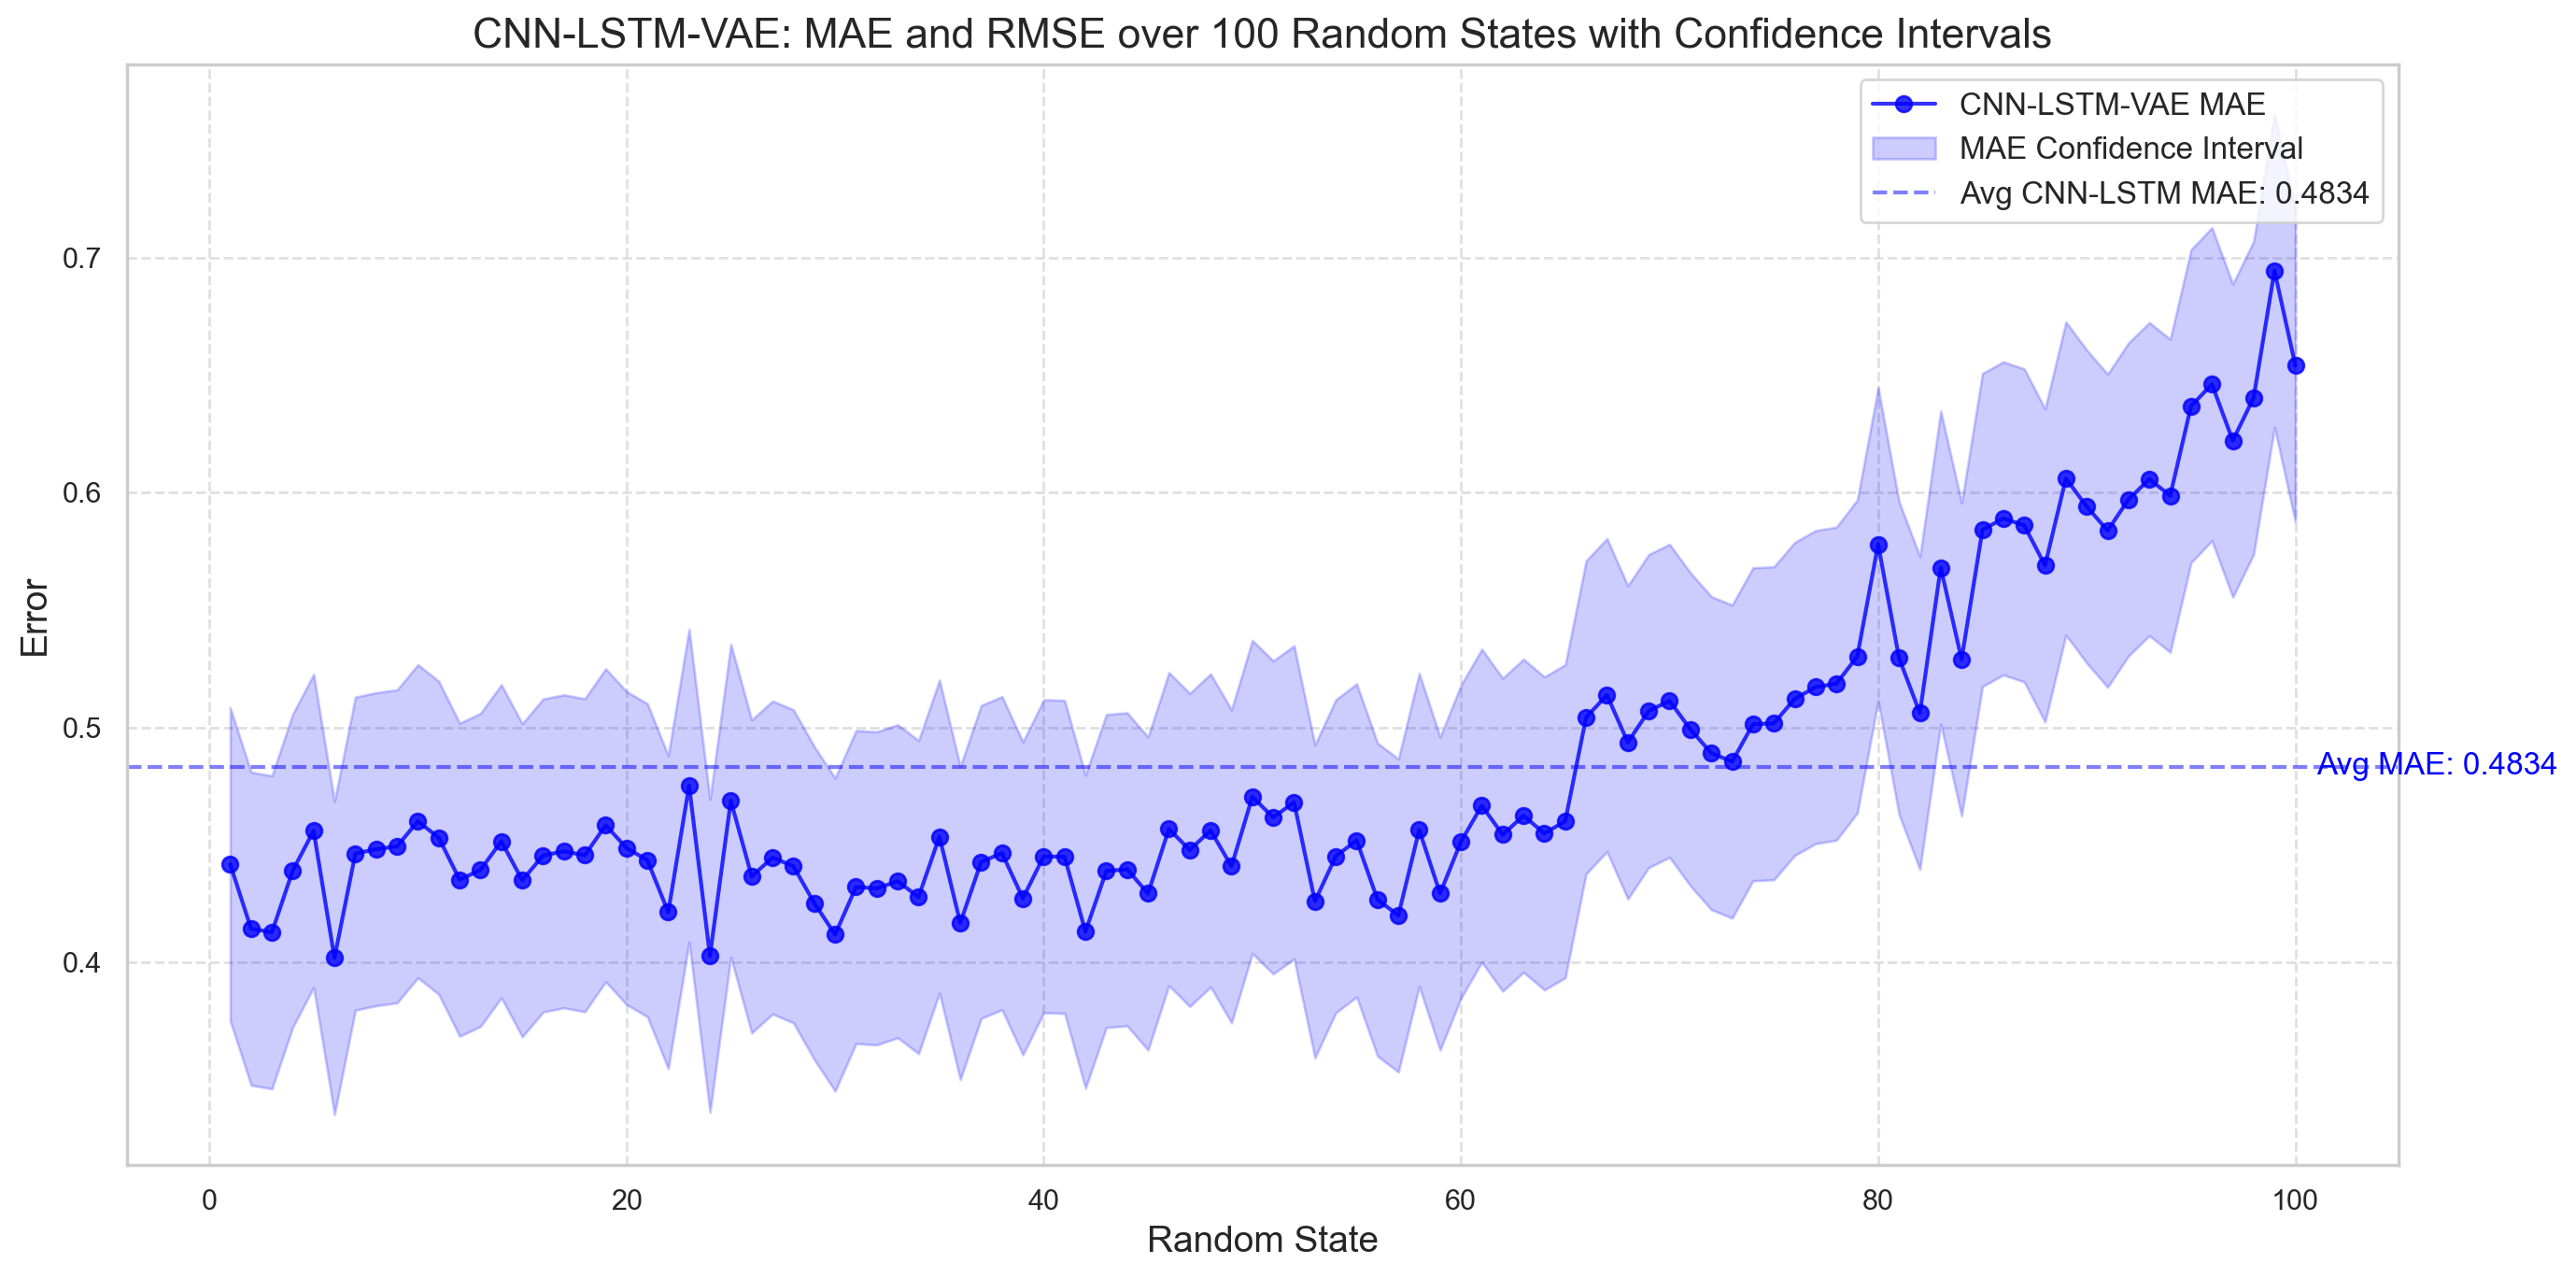

In [74]:

# Calculate standard deviation for MAE and RMSE
std_cnn_vae_mae = np.std(cnn_vae_maes)
std_cnn_vae_rmse = np.std(cnn_vae_rmses)

# Plotting the MAEs and RMSEs with shaded confidence intervals
plt.figure(figsize=(14, 7))

# Plot VAR MAEs with shaded confidence interval
plt.plot(range(1, 101), cnn_vae_maes, label='CNN-LSTM-VAE MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 101),
                 np.array(cnn_vae_maes) - std_cnn_vae_mae,
                 np.array(cnn_vae_maes) + std_cnn_vae_mae,
                 color='blue', alpha=0.2, label='MAE Confidence Interval')

# Add horizontal lines for average MAE and RMSE
plt.axhline(y=avg_cnn_vae_mae, color='blue', linestyle='--', alpha=0.5, label=f'Avg CNN-LSTM MAE: {avg_cnn_vae_mae:.4f}')
# plt.axhline(y=avg_var_rmse, color='green', linestyle='--', alpha=0.5, label=f'Avg VAR RMSE: {avg_var_rmse:.2f}')

# Add annotations for average values
plt.text(101, avg_cnn_vae_mae, f'Avg MAE: {avg_cnn_vae_mae:.4f}', color='blue', va='center', ha='left')
# plt.text(101, avg_var_rmse, f'Avg RMSE: {avg_var_rmse:.2f}', color='green', va='center', ha='left')

# Customize the plot
plt.title('CNN-LSTM-VAE: MAE and RMSE over 100 Random States with Confidence Intervals', fontsize=16)
plt.xlabel('Random State', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ***CNN-LSTM + Variable Selection***

In [81]:
# avg_sarima_mae = np.mean(var_maes)
# avg_sarima_rmse = np.mean(var_rmses)
print(f'CNN-LSTM + VAE Average MAE: {avg_cnn_vae_mae}')
print(f'CNN-LSTM + VAE Average RMSE: {avg_cnn_vae_rmse}')
print(f'CNN-LSTM + VS Average MAE: {cnn_sel_avg_mae}')
print(f'CNN-LSTM + VS Selection Average RMSE: {cnn_sel_avg_rmse}')
print(f'CNN-LSTM Average MAE: {avg_cnn_mae}')
print(f'CNN-LSTM Average RMSE: {avg_cnn_rmse}')
print(f'ARIMA Average MAE: {avg_arima_mae}')
print(f'ARIMA Average RMSE: {avg_arima_rmse}')
print(f'VAR Average MAE: {avg_var_mae}')
print(f'VAR Average RMSE: {avg_var_rmse}')
print(f'SARIMA Average MAE: {avg_sarima_mae}')
print(f'SARIMA Average RMSE: {avg_sarima_rmse}')

# print(f'Average RMSE: {avg_sarima_rmse}')


CNN-LSTM + VAE Average MAE: 0.4834472037289188
CNN-LSTM + VAE Average RMSE: 0.5884032873441271
CNN-LSTM + VS Average MAE: 0.6510814471911242
CNN-LSTM + VS Selection Average RMSE: 0.8844694343794334
CNN-LSTM Average MAE: 0.7716346086368081
CNN-LSTM Average RMSE: 1.0372559540283055
ARIMA Average MAE: 0.7460256308991967
ARIMA Average RMSE: 1.0108396976208913
VAR Average MAE: 0.8410981342837528
VAR Average RMSE: 1.1122534049859518
SARIMA Average MAE: 0.6595296780712195
SARIMA Average RMSE: 0.9317762285298445


CNN-LSTM + VAE Average MAE: 0.5393014362022318
CNN-LSTM + VAE Average RMSE: 0.6787154713028031
CNN-LSTM + VAR Selection Average MAE: 0.7658127914870214
CNN-LSTM + VAR Selection Average RMSE: 1.0100588830617963
CNN-LSTM Average MAE: 0.7659900972401679
CNN-LSTM Average RMSE: 1.0100522966124255
ARIMA Average MAE: 0.7809771728748376
ARIMA Average RMSE: 1.022385917431453
VAR Average MAE: 0.9573785345932904
VAR Average RMSE: 1.217397658046333
SARIMA Average MAE: 0.7797789243994218
SARIMA Average RMSE: 1.0196980215715252

# ***SUMMARY STATISTICS***

In [80]:

# Create a DataFrame for error metrics
error_df = pd.DataFrame({
    'Model': ['CNN-LSTM', 'CNN-LSTM-VAE', 'SARIMA', 'VAR', 'ARIMA'],
    'Mean MAE': [np.mean(cnn_maes), np.mean(cnn_vae_maes), np.mean(sarima_maes), np.mean(var_maes), np.mean(arima_maes)],
    'Median MAE': [np.median(cnn_maes), np.median(cnn_vae_maes), np.median(sarima_maes), np.median(var_maes), np.median(arima_maes)],
    'Std Dev MAE': [np.std(cnn_maes), np.std(cnn_vae_maes), np.std(sarima_maes), np.std(var_maes), np.std(arima_maes)],
    'Mean RMSE': [np.mean(cnn_rmses), np.mean(cnn_vae_rmses), np.mean(sarima_rmses), np.mean(var_rmses), np.mean(arima_rmses)],
    'Median RMSE': [np.median(cnn_rmses), np.mean(cnn_vae_rmses), np.median(sarima_rmses), np.median(var_rmses), np.median(arima_rmses)],
    'Std Dev RMSE': [np.std(cnn_rmses), np.mean(cnn_vae_rmses), np.std(sarima_rmses), np.std(var_rmses), np.std(arima_rmses)]
})

# Print summary table
print(error_df)


          Model  Mean MAE  Median MAE  Std Dev MAE  Mean RMSE  Median RMSE  \
0      CNN-LSTM  0.771635    0.678466     0.209979   1.037256     0.852375   
1  CNN-LSTM-VAE  0.483447    0.454725     0.066633   0.588403     0.588403   
2        SARIMA  0.659530    0.593198     0.209419   0.931776     0.749541   
3           VAR  0.841098    0.786927     0.180082   1.112253     1.061254   
4         ARIMA  0.746026    0.655252     0.236296   1.010840     0.808135   

   Std Dev RMSE  
0      0.337543  
1      0.588403  
2      0.353588  
3      0.236201  
4      0.369408  


In [85]:
# Compare performance at each step
conv_lstm_vae_errors = np.array(cnn_vae_all_predictions).reshape(100, test_size)  # Reshape to (100, 12)
conv_lstm_sel_step_errors = np.array(cnn_sel_all_predictions).reshape(100, test_size)  # Reshape to (100, 12)
conv_lstm_step_errors = np.array(cnn_all_predictions).reshape(100, test_size)
sarima_step_errors = np.array(sarima_all_forecasts).reshape(100, test_size)
arima_step_errors = np.array(arima_all_forecasts).reshape(100, test_size)  # Reshape to (100, 12)
var_step_errors = np.array(var_all_forecasts).reshape(100, test_size)

# Calculate standard deviation for each step
conv_lstm_vae_step_std = np.std(np.abs(conv_lstm_vae_errors), axis=0)
conv_lstm_sel_step_std = np.std(np.abs(conv_lstm_sel_step_errors), axis=0)
conv_lstm_step_std = np.std(np.abs(conv_lstm_step_errors), axis=0)  # Standard deviation across 100 runs
sarima_step_std = np.std(np.abs(sarima_step_errors), axis=0)
arima_step_std = np.std(np.abs(arima_step_errors), axis=0)  # Standard deviation across 100 runs
var_step_std = np.std(np.abs(var_step_errors), axis=0)

# Calculate mean absolute error for each step
conv_lstm_vae_step_mae = np.mean(np.abs(conv_lstm_vae_errors), axis=0)  # Average across 100 runs
conv_lstm_sel_step_mae = np.mean(np.abs(conv_lstm_sel_step_errors), axis=0)
conv_lstm_step_mae = np.mean(np.abs(conv_lstm_step_errors), axis=0)  # Average across 100 runs
sarima_step_mae = np.mean(np.abs(sarima_step_errors), axis=0)
arima_step_mae = np.mean(np.abs(arima_step_errors), axis=0)  # Average across 100 runs
var_step_mae = np.mean(np.abs(var_step_errors), axis=0)


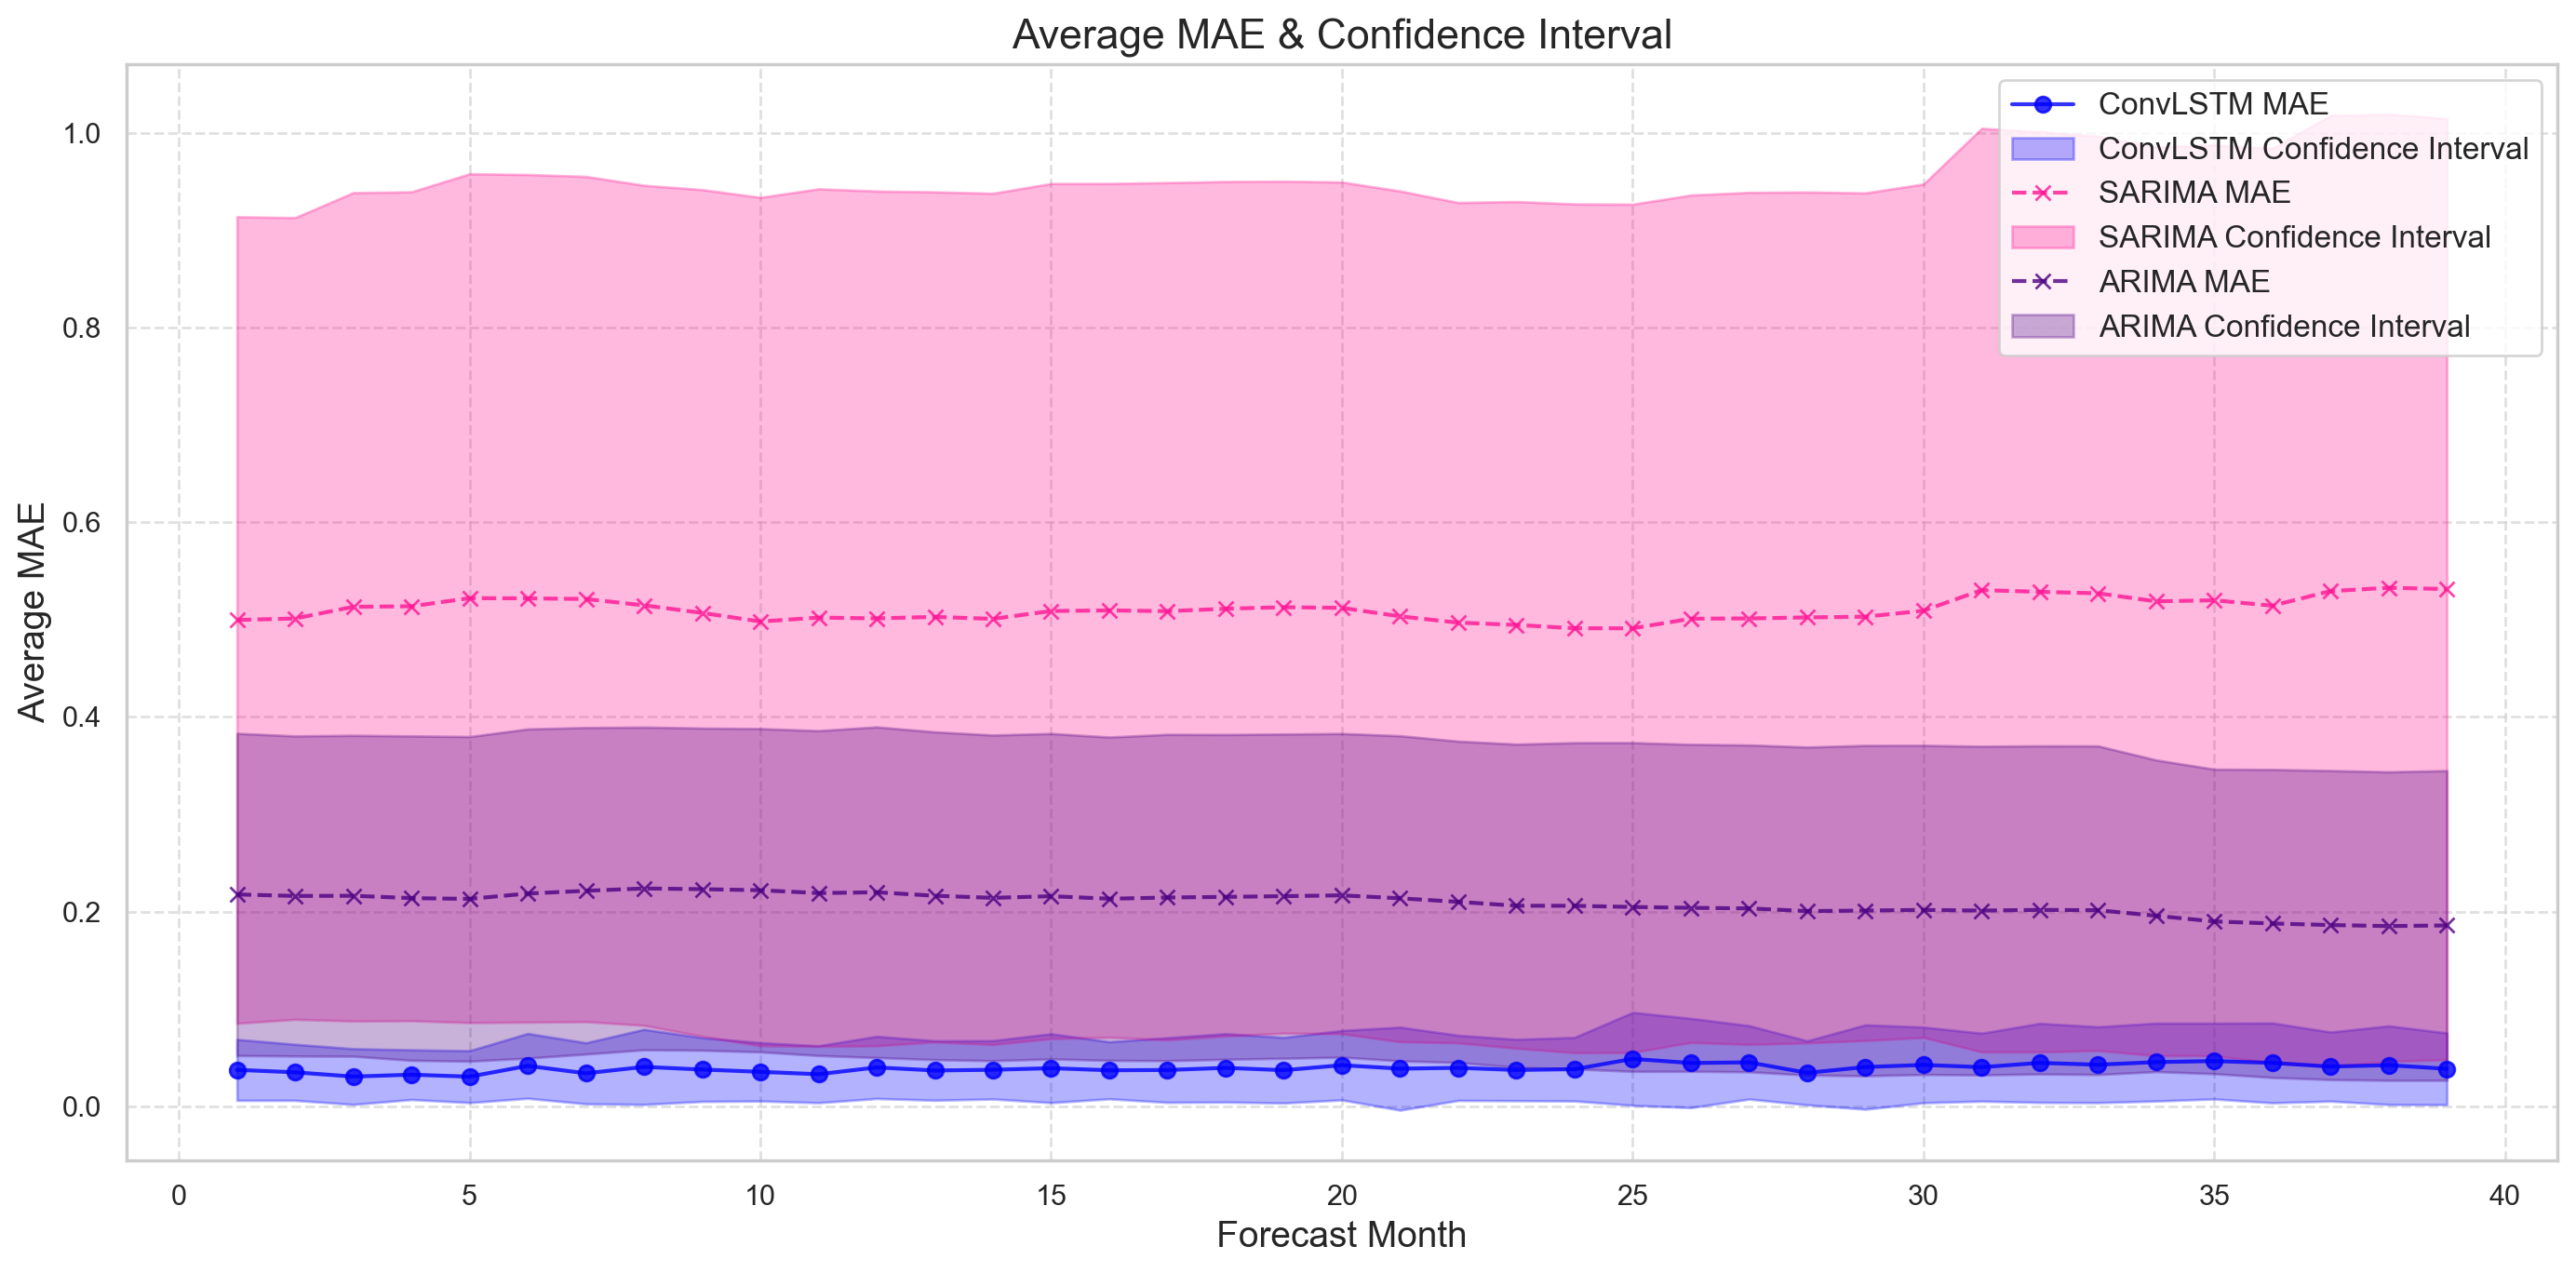

In [87]:


# Plotting
plt.figure(figsize=(14, 7))

# Plot ConvLSTM MAE with shaded confidence interval
# plt.plot(range(1, 25), var_step_mae, label='VAR', marker='o', linestyle='-', color='green', alpha=0.8)

# plt.plot(range(1, 25), conv_lstm_sel_step_mae, label='ConvLSTM + Var Sel MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_sel_step_mae - conv_lstm_sel_step_std,
#                  conv_lstm_sel_step_mae + conv_lstm_sel_step_std,
#                  color='gray', alpha=0.2, label='ConvLSTM Confidence Interval')

# Plot ConvLSTM MAE with shaded confidence interval
plt.plot(range(1, test_size+1), conv_lstm_step_mae, label='ConvLSTM MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, test_size+1),
                 conv_lstm_step_mae - conv_lstm_step_std,
                 conv_lstm_step_mae + conv_lstm_step_std,
                 color='blue', alpha=0.3, label='ConvLSTM Confidence Interval')

# Plot SARIMA MAE with shaded confidence interval
plt.plot(range(1, test_size+1), sarima_step_mae, label='SARIMA MAE', marker='x', linestyle='--', color='deeppink', alpha=0.8)
plt.fill_between(range(1, test_size+1),
                 sarima_step_mae - sarima_step_std,
                 sarima_step_mae + sarima_step_std,
                 color='deeppink', alpha=0.3, label='SARIMA Confidence Interval')

# Plot ARIMA MAE with shaded confidence interval
plt.plot(range(1, test_size+1), arima_step_mae, label='ARIMA MAE', marker='x', linestyle='--', color='indigo', alpha=0.8)
plt.fill_between(range(1, test_size+1),
                 arima_step_mae - arima_step_std,
                 arima_step_mae + arima_step_std,
                 color='indigo', alpha=0.3, label='ARIMA Confidence Interval')

# Customize the plot
plt.title('Average MAE & Confidence Interval', fontsize=16)
plt.xlabel('Forecast Month', fontsize=14)
plt.ylabel('Average MAE', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



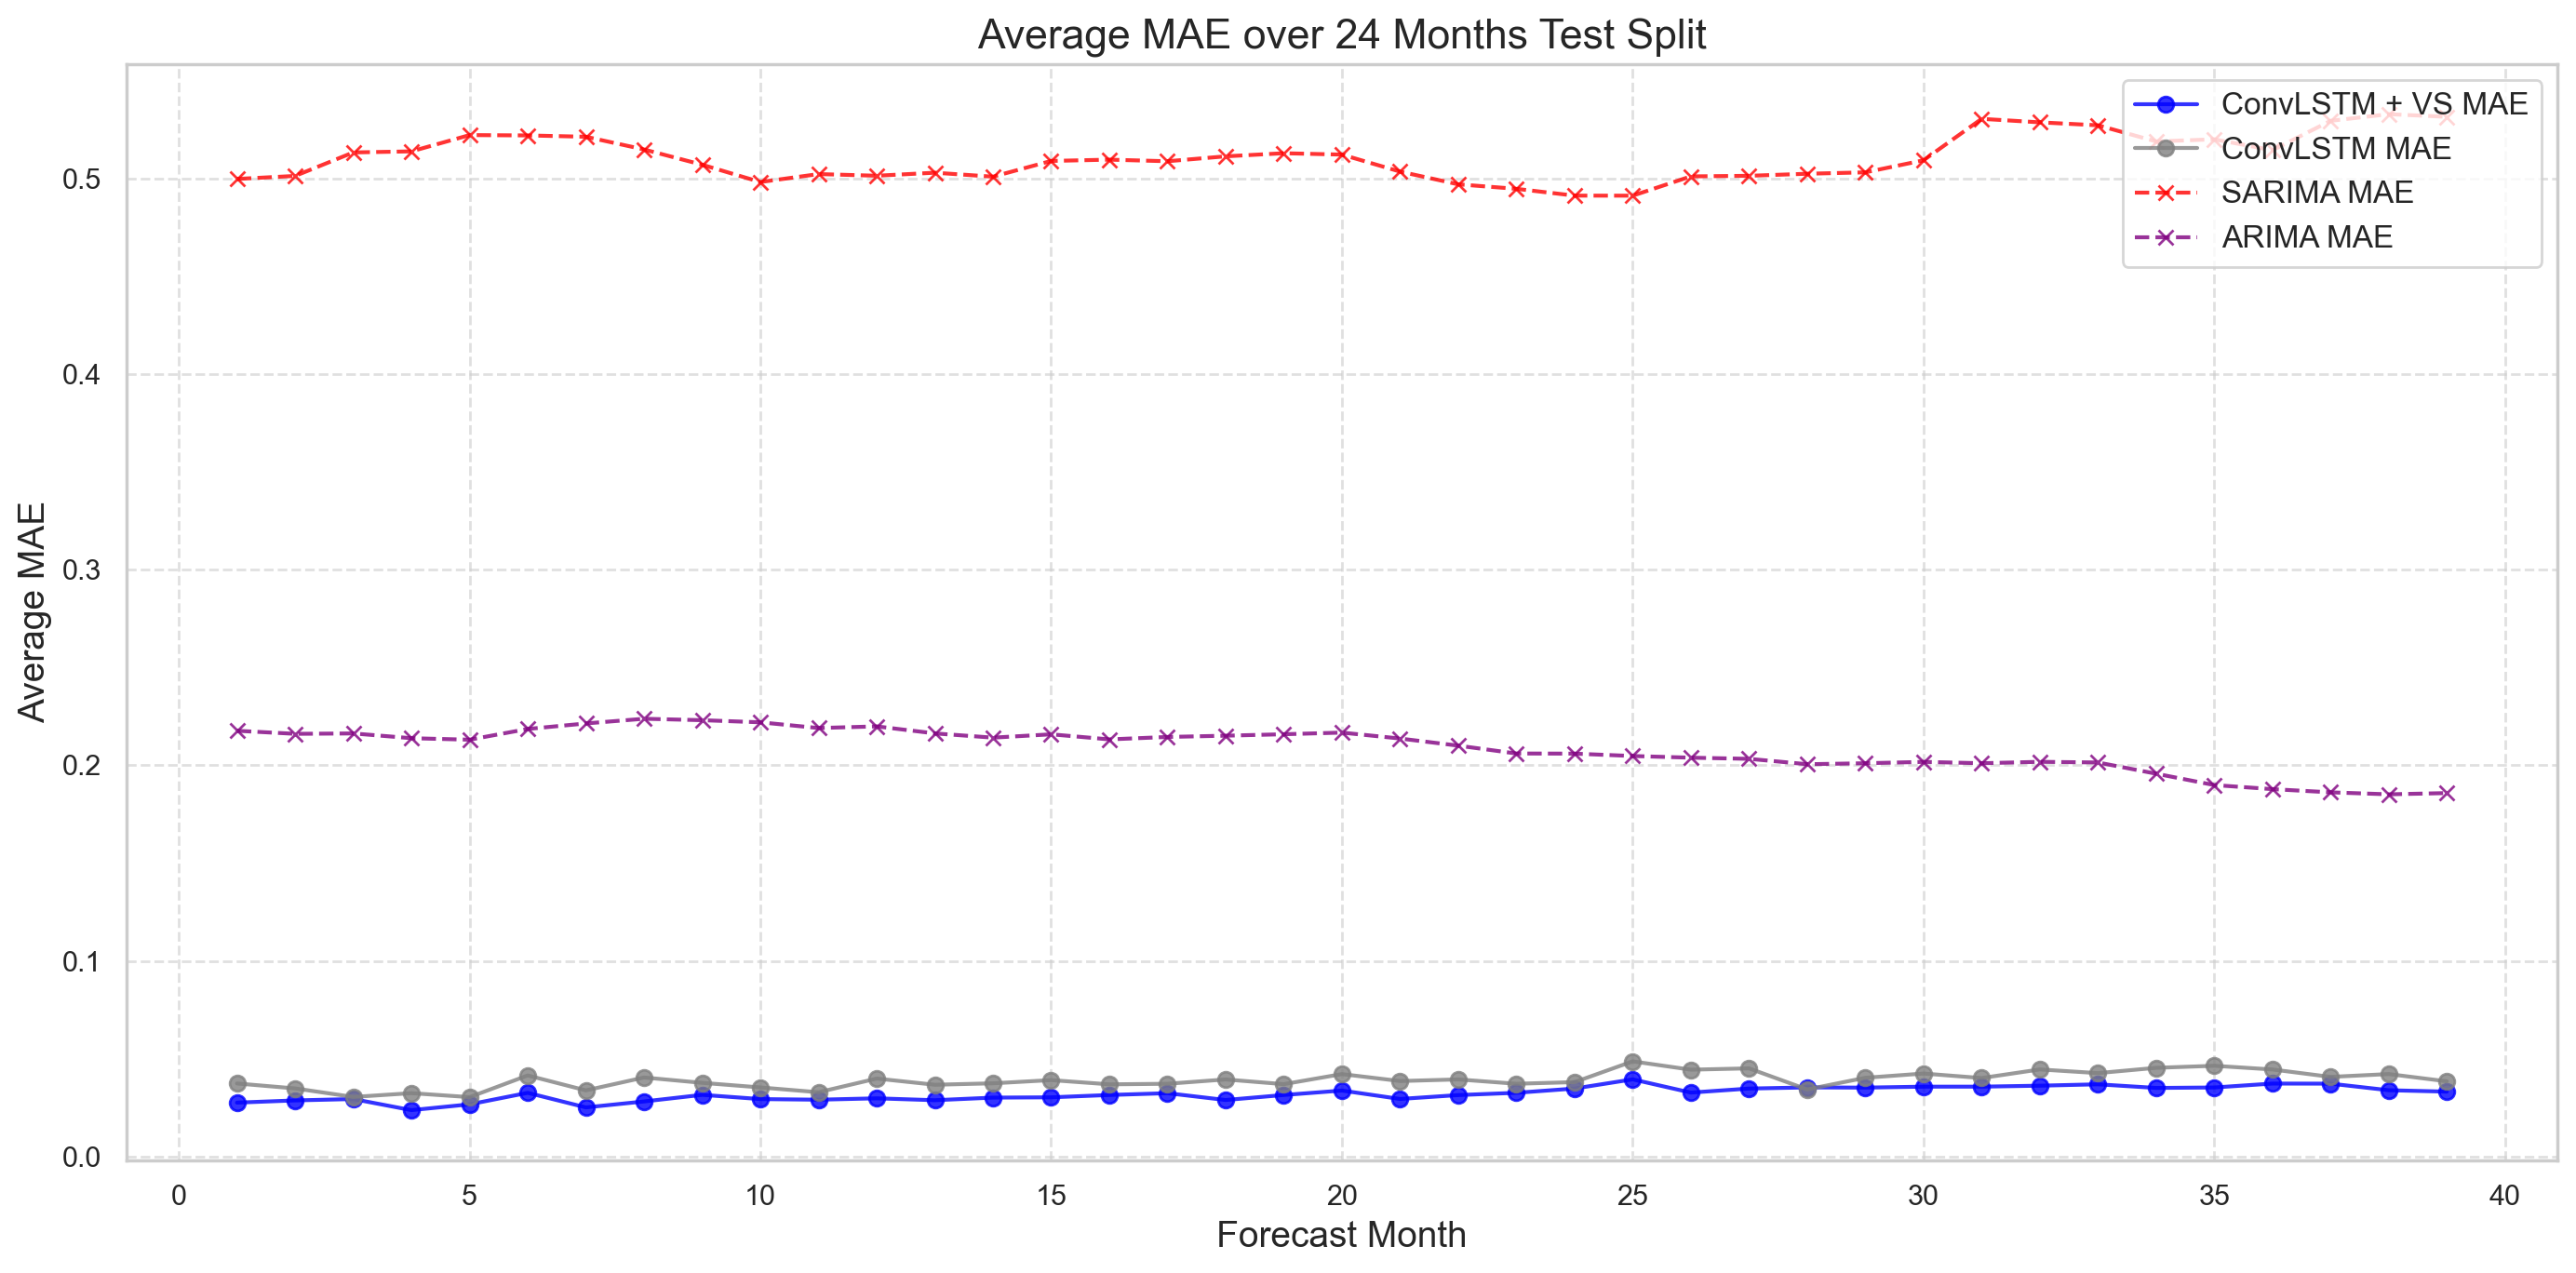

In [90]:


# Plotting
plt.figure(figsize=(14, 7))

# Plot ConvLSTM MAE with shaded confidence interval

# plt.plot(range(1, test_size+1), var_step_mae, label='ConvLSTM + VS MAE', marker='o', linestyle='-', color='green', alpha=0.8)

plt.plot(range(1, test_size+1), conv_lstm_sel_step_mae, label='ConvLSTM + VS MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_sel_step_mae - conv_lstm_sel_step_std,
#                  conv_lstm_sel_step_mae + conv_lstm_sel_step_std,
#                  color='gray', alpha=0.2, label='ConvLSTM Confidence Interval')

# Plot ConvLSTM MAE with shaded confidence interval
plt.plot(range(1, test_size+1), conv_lstm_step_mae, label='ConvLSTM MAE', marker='o', linestyle='-', color='gray', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_step_mae - conv_lstm_step_std,
#                  conv_lstm_step_mae + conv_lstm_step_std,
#                  color='blue', alpha=0.2, label='ConvLSTM Confidence Interval')

# Plot SARIMA MAE with shaded confidence interval
plt.plot(range(1, test_size+1), sarima_step_mae, label='SARIMA MAE', marker='x', linestyle='--', color='red', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  sarima_step_mae - sarima_step_std,
#                  sarima_step_mae + sarima_step_std,
#                  color='red', alpha=0.2, label='SARIMA Confidence Interval')

# Plot ARIMA MAE with shaded confidence interval
plt.plot(range(1, test_size+1), arima_step_mae, label='ARIMA MAE', marker='x', linestyle='--', color='purple', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  arima_step_mae - arima_step_std,
#                  arima_step_mae + arima_step_std,
#                  color='purple', alpha=0.2, label='ARIMA Confidence Interval')

# Customize the plot
plt.title('Average MAE over 24 Months Test Split', fontsize=16)
plt.xlabel('Forecast Month', fontsize=14)
plt.ylabel('Average MAE', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



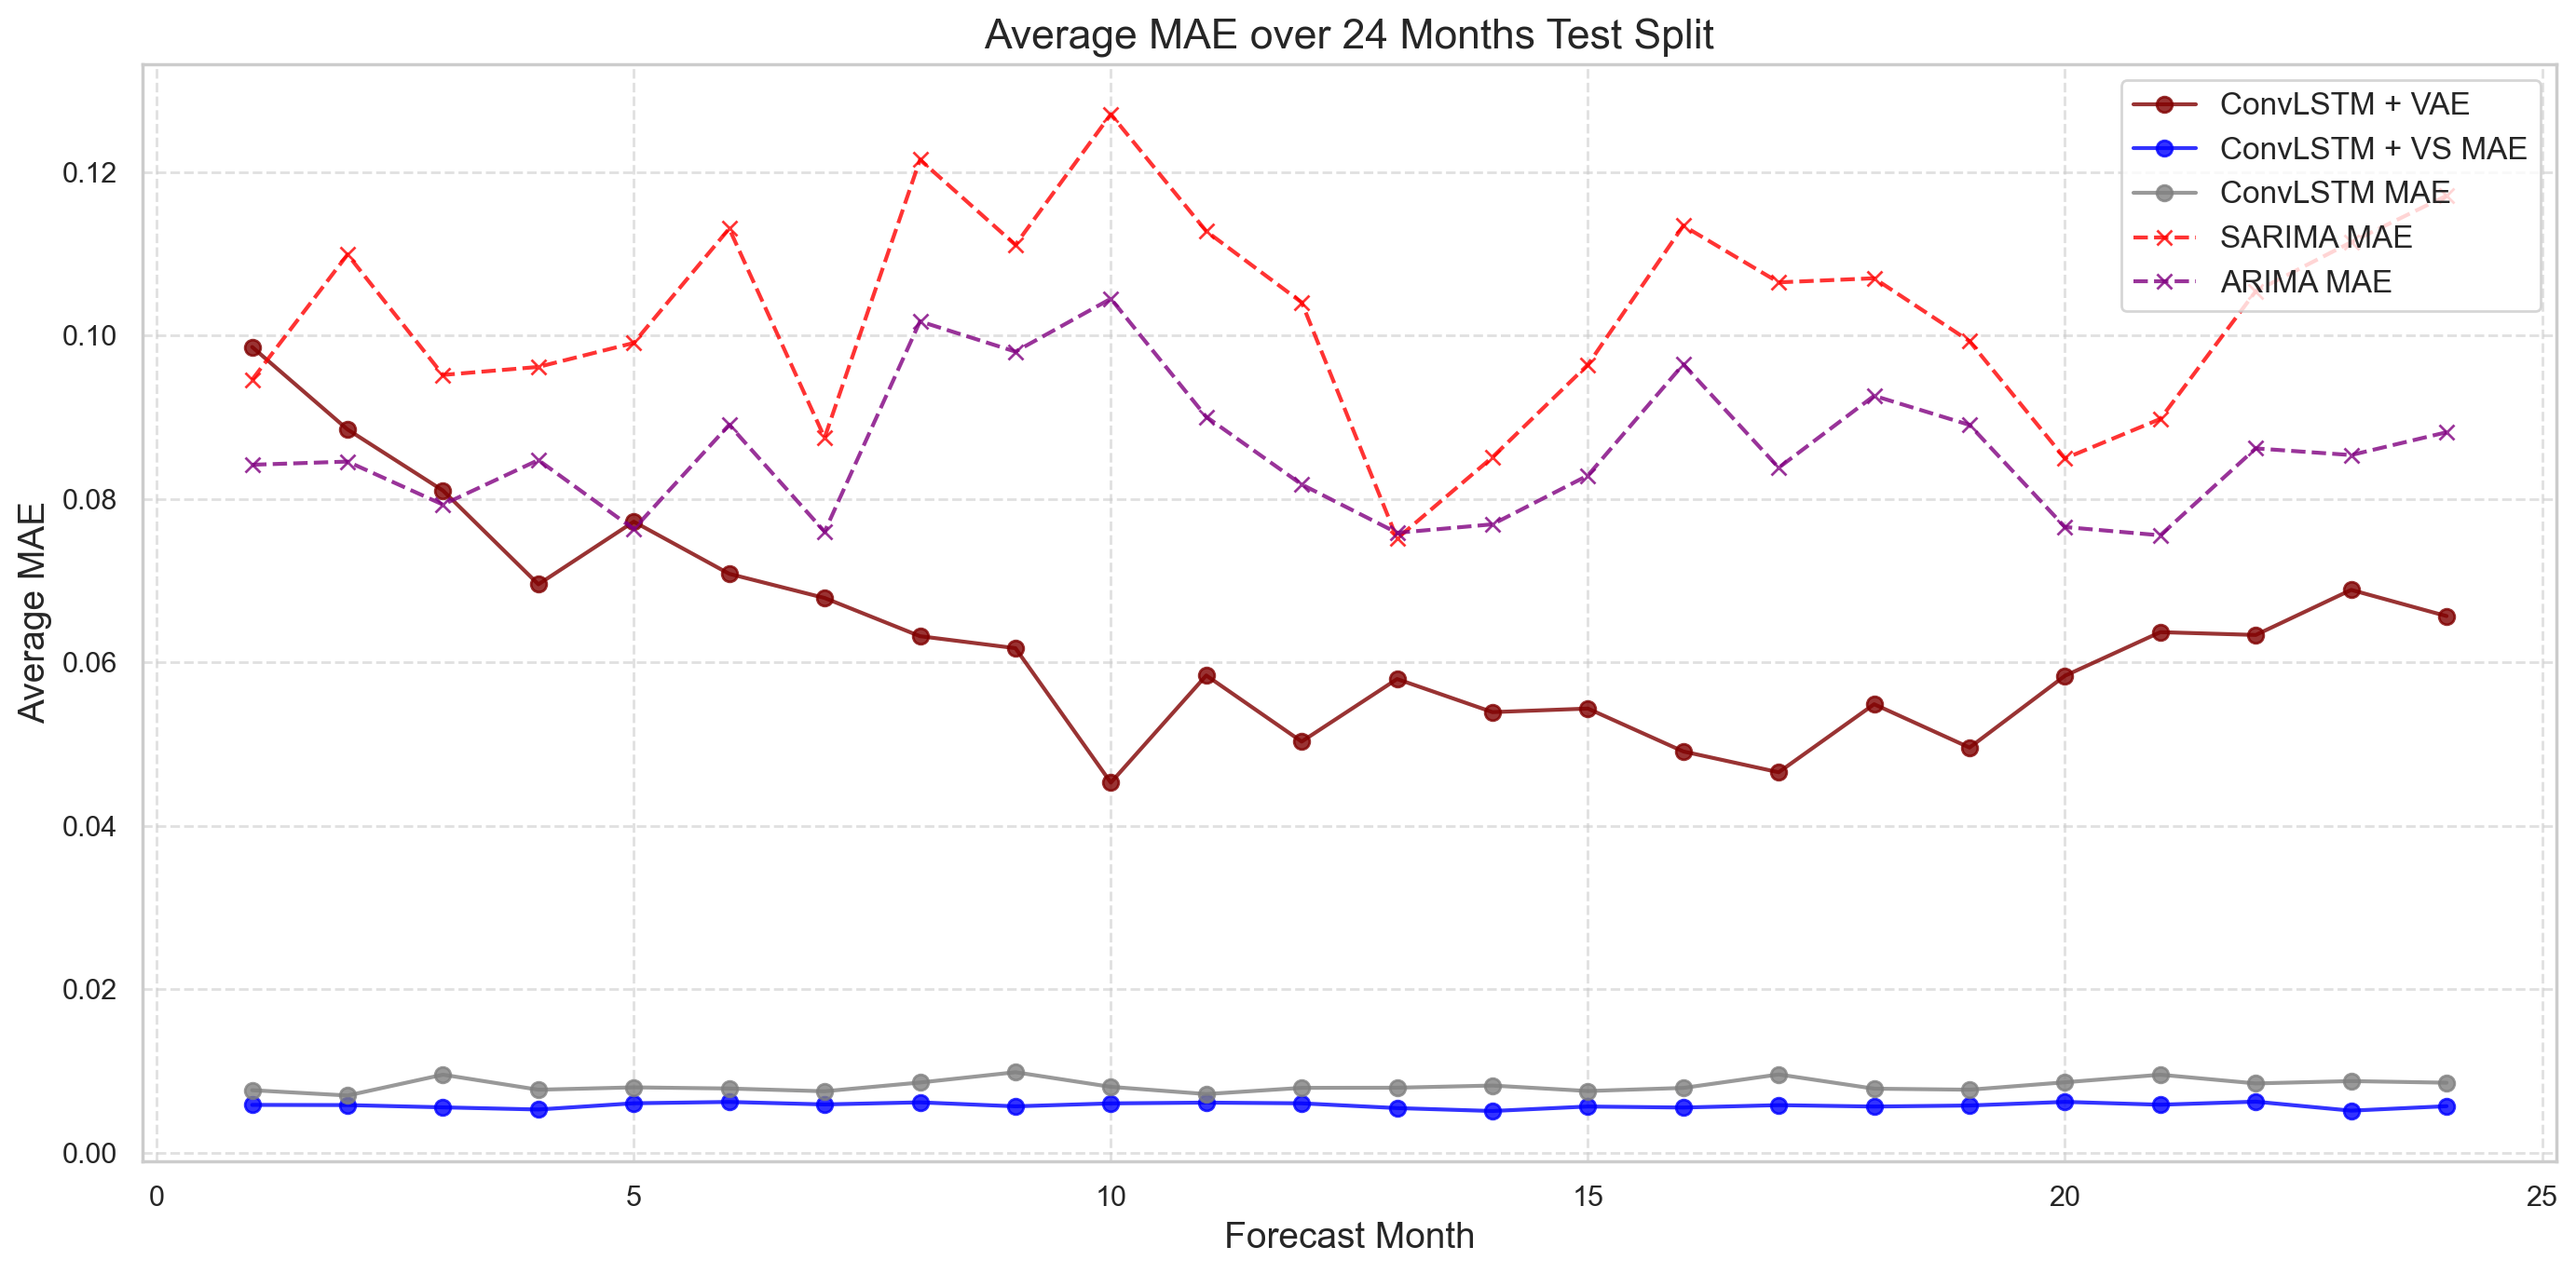

In [273]:


# Plotting
plt.figure(figsize=(14, 7))

# Plot ConvLSTM MAE with shaded confidence interval

# plt.plot(range(1, 25), var_step_mae, label='ConvLSTM + VS MAE', marker='o', linestyle='-', color='green', alpha=0.8)
plt.plot(range(1, 25), conv_lstm_vae_step_mae, label='ConvLSTM + VAE', marker='o', linestyle='-', color='maroon', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_sel_step_mae - conv_lstm_sel_step_std,
#                  conv_lstm_sel_step_mae + conv_lstm_sel_step_std,
#                  color='gray', alpha=0.2, label='ConvLSTM Confidence Interval')

plt.plot(range(1, 25), conv_lstm_sel_step_mae, label='ConvLSTM + VS MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_sel_step_mae - conv_lstm_sel_step_std,
#                  conv_lstm_sel_step_mae + conv_lstm_sel_step_std,
#                  color='gray', alpha=0.2, label='ConvLSTM Confidence Interval')

# Plot ConvLSTM MAE with shaded confidence interval
plt.plot(range(1, 25), conv_lstm_step_mae, label='ConvLSTM MAE', marker='o', linestyle='-', color='gray', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  conv_lstm_step_mae - conv_lstm_step_std,
#                  conv_lstm_step_mae + conv_lstm_step_std,
#                  color='blue', alpha=0.2, label='ConvLSTM Confidence Interval')

# Plot SARIMA MAE with shaded confidence interval
plt.plot(range(1, 25), sarima_step_mae, label='SARIMA MAE', marker='x', linestyle='--', color='red', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  sarima_step_mae - sarima_step_std,
#                  sarima_step_mae + sarima_step_std,
#                  color='red', alpha=0.2, label='SARIMA Confidence Interval')

# Plot ARIMA MAE with shaded confidence interval
plt.plot(range(1, 25), arima_step_mae, label='ARIMA MAE', marker='x', linestyle='--', color='purple', alpha=0.8)
# plt.fill_between(range(1, 25),
#                  arima_step_mae - arima_step_std,
#                  arima_step_mae + arima_step_std,
#                  color='purple', alpha=0.2, label='ARIMA Confidence Interval')

# Customize the plot
plt.title('Average MAE over 24 Months Test Split', fontsize=16)
plt.xlabel('Forecast Month', fontsize=14)
plt.ylabel('Average MAE', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [157]:
# Compare performance at each step
conv_lstm_sel_step_errors = np.array(cnn_sel_all_predictions).reshape(100, 24)  # Reshape to (100, 12)
conv_lstm_step_errors = np.array(cnn_all_predictions).reshape(100, 24)

# Calculate standard deviation for each step
conv_lstm_sel_step_std = np.std(np.abs(conv_lstm_sel_step_errors), axis=0)
conv_lstm_step_std = np.std(np.abs(conv_lstm_step_errors), axis=0)  # Standard deviation across 100 runs

# Calculate mean absolute error for each step
conv_lstm_sel_step_mae = np.mean(np.abs(conv_lstm_sel_step_errors), axis=0)
conv_lstm_step_mae = np.mean(np.abs(conv_lstm_step_errors), axis=0)  # Average across 100 runs


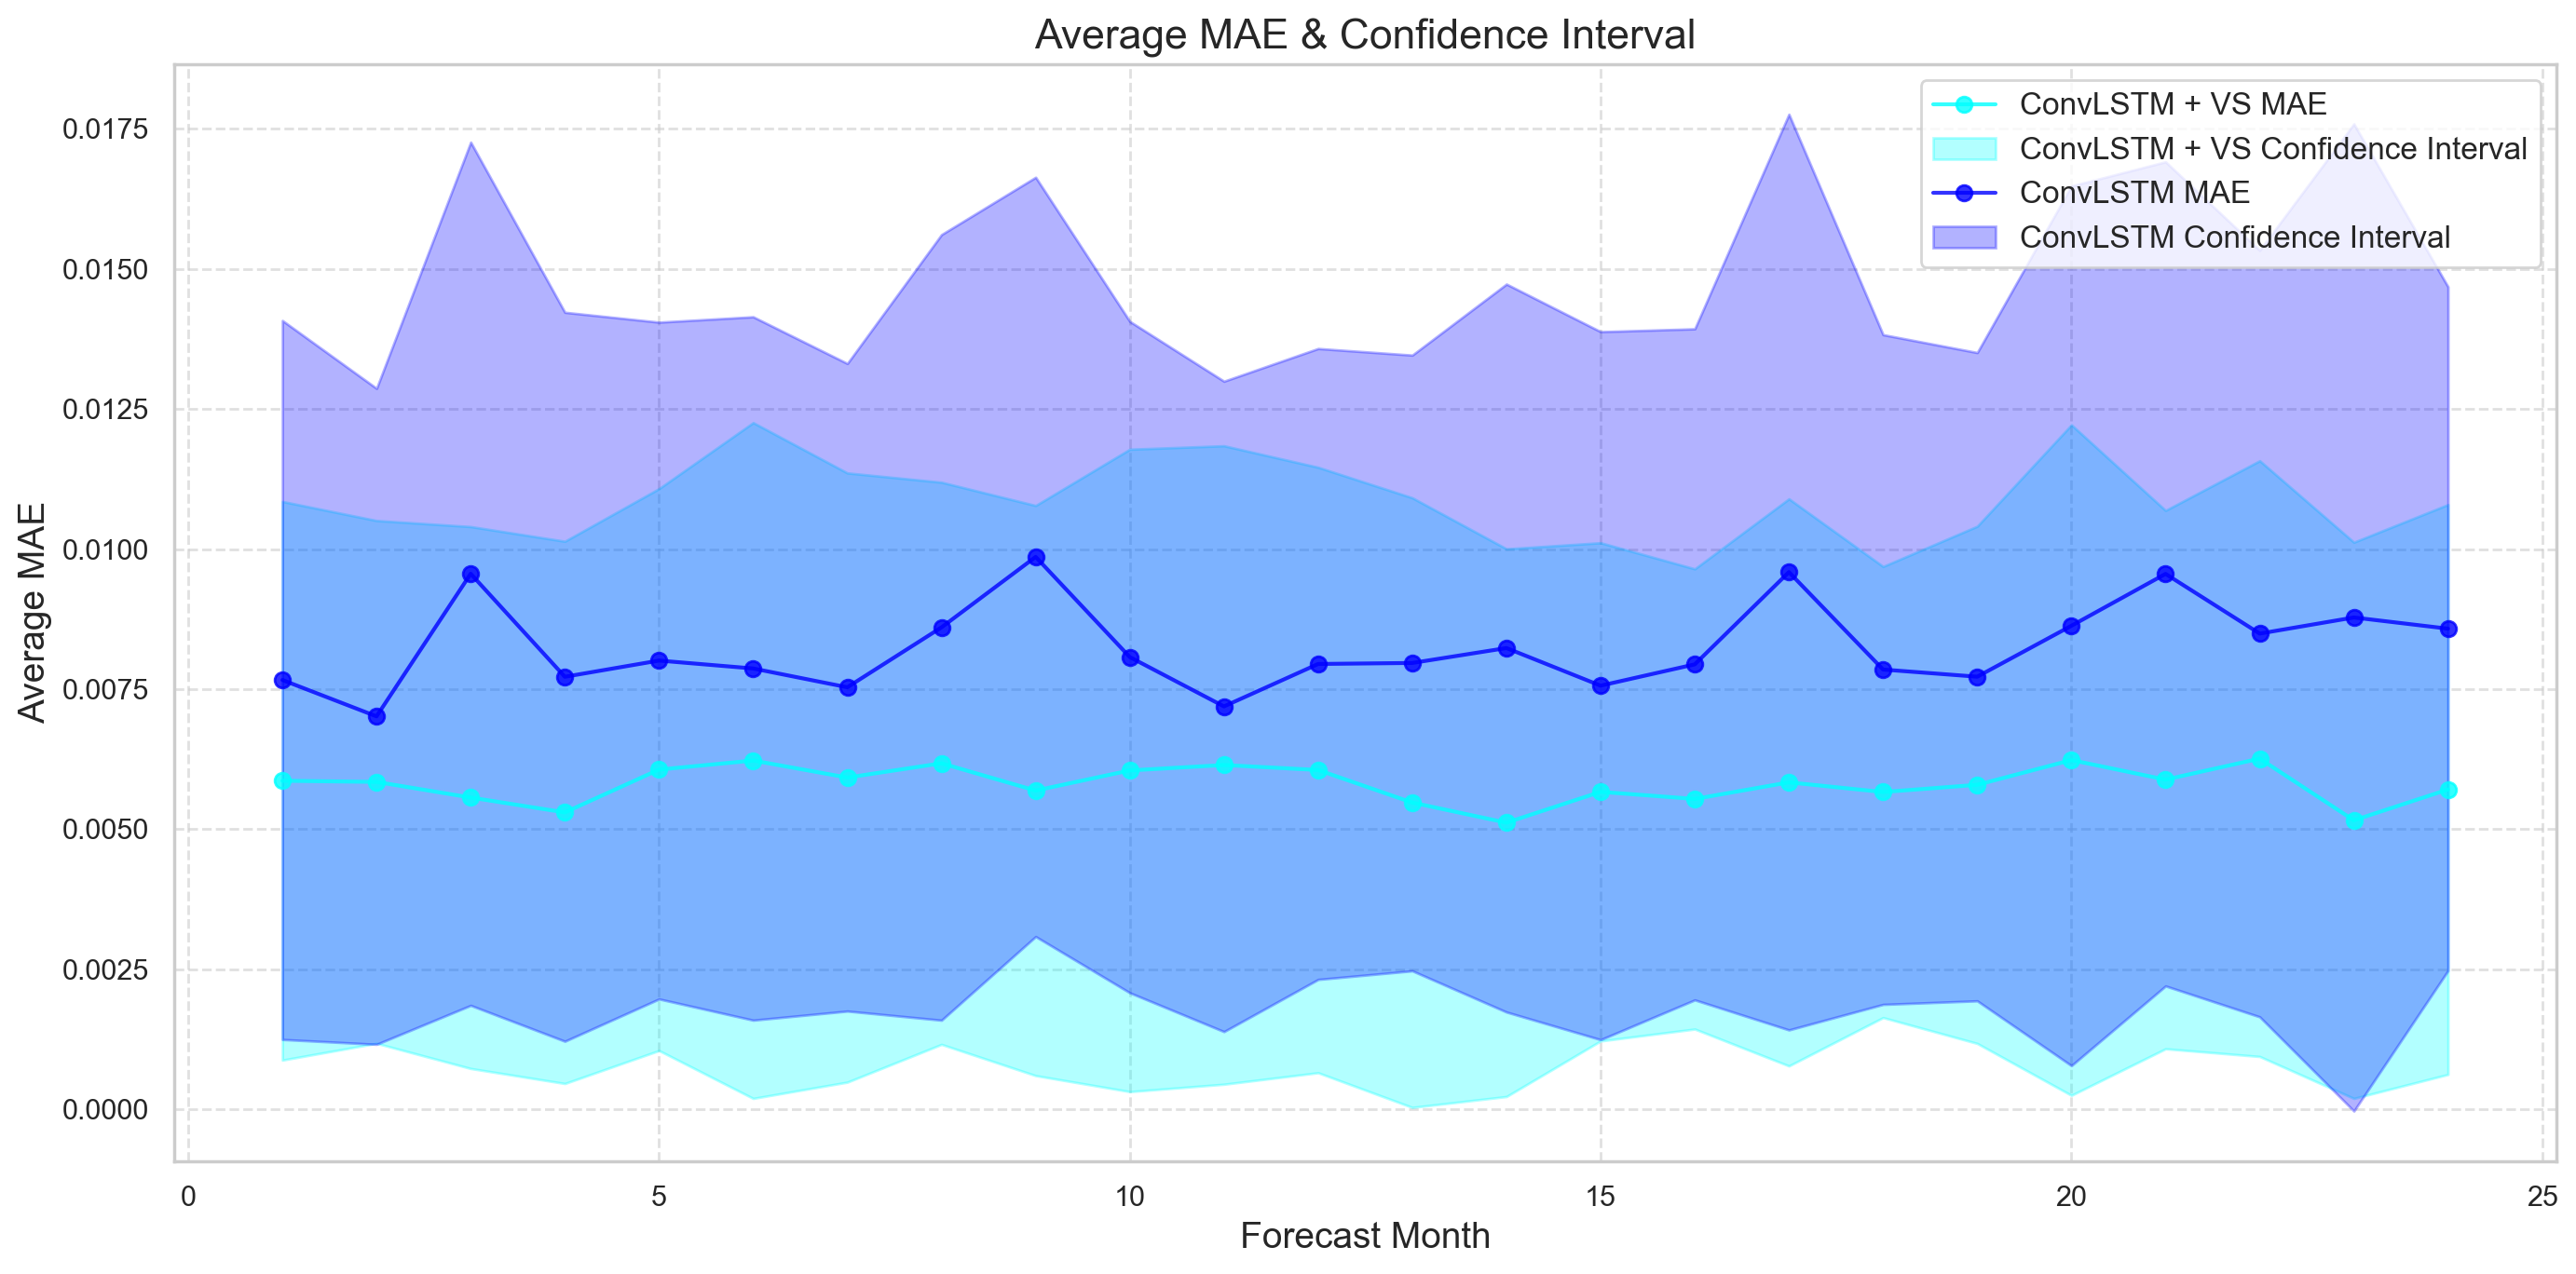

In [158]:


# Plotting
plt.figure(figsize=(14, 7))

# Plot ConvLSTM + Variable Selection MAE with shaded confidence interval
plt.plot(range(1, 25), conv_lstm_sel_step_mae, label='ConvLSTM + VS MAE', marker='o', linestyle='-', color='cyan', alpha=0.8)
plt.fill_between(range(1, 25),
                 conv_lstm_sel_step_mae - conv_lstm_sel_step_std,
                 conv_lstm_sel_step_mae + conv_lstm_sel_step_std,
                 color='cyan', alpha=0.3, label='ConvLSTM + VS Confidence Interval')

# Plot ConvLSTM MAE with shaded confidence interval
plt.plot(range(1, 25), conv_lstm_step_mae, label='ConvLSTM MAE', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.fill_between(range(1, 25),
                 conv_lstm_step_mae - conv_lstm_step_std,
                 conv_lstm_step_mae + conv_lstm_step_std,
                 color='blue', alpha=0.3, label='ConvLSTM Confidence Interval')

# Customize the plot
plt.title('Average MAE & Confidence Interval', fontsize=16)
plt.xlabel('Forecast Month', fontsize=14)
plt.ylabel('Average MAE', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

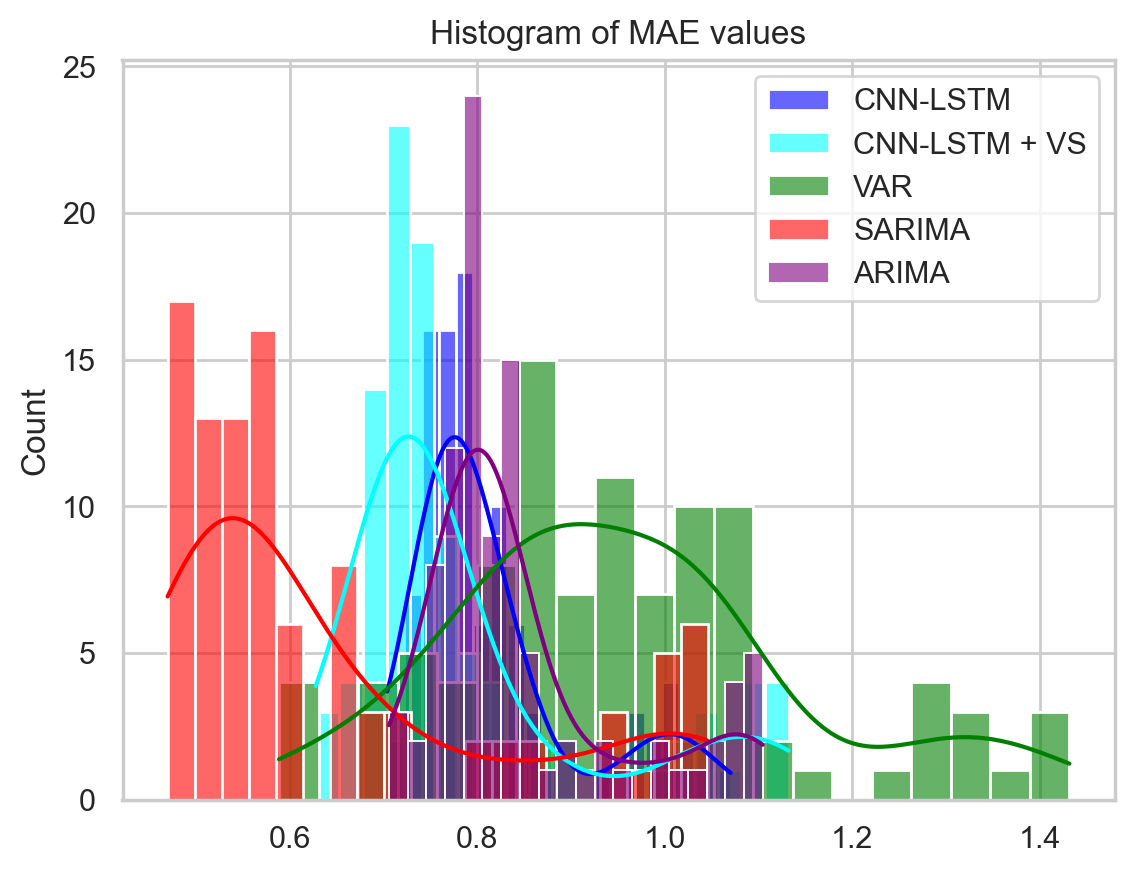

In [91]:
sns.histplot(cnn_maes, kde=True, bins=20, label="CNN-LSTM", color="blue", alpha=0.6)
sns.histplot(cnn_sel_maes, kde=True, bins=20, label="CNN-LSTM + VS", color="cyan", alpha=0.6)
sns.histplot(var_maes, kde=True, bins=20, label="VAR", color="green", alpha=0.6)
sns.histplot(sarima_maes, kde=True, bins=20, label="SARIMA", color="red", alpha=0.6)
sns.histplot(arima_maes, kde=True, bins=20, label="ARIMA", color="purple", alpha=0.6)

plt.legend()
plt.title("Histogram of MAE values")
plt.show()

t.show()
Kolmogorov-Smirnov (K-S) Test
Best for large samples (n > 50).

If p < 0.05, the data is not normally distributed.

In [160]:
from scipy.stats import kstest

print("Kolmogorov-Smirnov (K-S) Test for Normality")
print("if p < 0.05, the data is not normally distributed\n")

stat, p = kstest(cnn_maes, 'norm', args=(np.mean(cnn_maes), np.std(cnn_maes)))
print(f"K-S Test for CNN-LSTM MAE: p-value = {p}")

stat, p = kstest(cnn_sel_maes, 'norm', args=(np.mean(cnn_sel_maes), np.std(cnn_sel_maes)))
print(f"K-S Test for CNN-LSTM + VS MAE: p-value = {p}")

stat, p = kstest(sarima_maes, 'norm', args=(np.mean(sarima_maes), np.std(sarima_maes)))
print(f"K-S Test for SARIMA MAE: p-value = {p}")

stat, p = kstest(arima_maes, 'norm', args=(np.mean(arima_maes), np.std(arima_maes)))
print(f"K-S Test for ARIMA MAE: p-value = {p}")

stat, p = kstest(var_maes, 'norm', args=(np.mean(var_maes), np.std(var_maes)))
print(f"K-S Test for VAR MAE: p-value = {p}")


Kolmogorov-Smirnov (K-S) Test for Normality
if p < 0.05, the data is not normally distributed

K-S Test for CNN-LSTM MAE: p-value = 0.9842448625782724
K-S Test for CNN-LSTM + VS MAE: p-value = 0.9420885913104129
K-S Test for SARIMA MAE: p-value = 0.7691984175168359
K-S Test for ARIMA MAE: p-value = 0.8073766723737531
K-S Test for VAR MAE: p-value = 0.9629974985508127


Significance Test

In [161]:
import scipy.stats as stats

f_statistic, p_value = stats.f_oneway(cnn_maes, cnn_sel_maes, sarima_maes, arima_maes, var_maes)

print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")

# Decision
if p_value < 0.05:
    print("Significant difference found! Proceed with post-hoc analysis.")
else:
    print("No significant difference between the models.")


ANOVA F-statistic: 37.22316392680368, p-value: 3.1521755292005757e-27
Significant difference found! Proceed with post-hoc analysis.


Post-hoc Analysis

Pairwise t-tests with Bonferroni correction

In [162]:
from itertools import combinations

models = {
    "CNN-LSTM": cnn_maes,
    "CNN-LSTM + VS": cnn_sel_maes,
    "SARIMA": sarima_maes,
    "ARIMA": arima_maes,
    "VAR": var_maes
}

# Perform pairwise t-tests with Bonferroni correction
# Generate all possible model pairs
model_pairs = list(combinations(models.keys(), 2))
num_tests = len(model_pairs)  # Number of comparisons

# Bonferroni-adjusted significance level
alpha = 0.05
adjusted_alpha = alpha / num_tests

# Perform paired t-tests and apply Bonferroni correction
results = []
for model1, model2 in model_pairs:
    t_stat, p_value = stats.ttest_rel(models[model1], models[model2])  # Paired T-Test
    significant = p_value < adjusted_alpha  # Check significance after Bonferroni correction
    results.append((model1, model2, p_value, significant))

# Print results
print(f"Bonferroni-adjusted alpha: {adjusted_alpha:.5f}\n")
print(f"{'Model 1':<15}{'Model 2':<15}{'p-value':<20}{'Significant?'}")
print("-" * 60)
for model1, model2, p_value, significant in results:
    print(f"{model1:<15}{model2:<15}{p_value:<20.6f}{'Yes' if significant else 'No'}")



Bonferroni-adjusted alpha: 0.00500

Model 1        Model 2        p-value             Significant?
------------------------------------------------------------
CNN-LSTM       CNN-LSTM + VS  0.544298            No
CNN-LSTM       SARIMA         0.000009            Yes
CNN-LSTM       ARIMA          0.000000            Yes
CNN-LSTM       VAR            0.000000            Yes
CNN-LSTM + VS  SARIMA         0.000007            Yes
CNN-LSTM + VS  ARIMA          0.000000            Yes
CNN-LSTM + VS  VAR            0.000000            Yes
SARIMA         ARIMA          0.375213            No
SARIMA         VAR            0.000000            Yes
ARIMA          VAR            0.000000            Yes


# CODE OF AGES

In [98]:
f_result_Dir = "ForecastResults/"
m_result_Dir = "MAEsResults/"
r_result_Dir = "RMSEsResults/"
read_dir = r_State_Dir

In [58]:
# Function for created multi-step ahead data sets
def shift_target_per_step(data, target_col='CPI', horizon=1):
    data = data.copy()
    data[target_col] = data[target_col].shift(-horizon + 1)
    return data.dropna()

In [ ]:
forecast_horizons = [1, 2, 3]  # Corresponds to dfCPI_L1, dfCPI_L2, dfCPI_L3
num_subsamples = 100

for horizon in forecast_horizons:
    horizon_name = f"dfCPI_L{horizon}"

    # Initialize metrics and forecasts for each model
    metrics = {
        "VAR": {"maes": [], "rmses": [], "forecasts": []},
        "CNN-LSTM": {"maes": [], "rmses": [], "forecasts": []},
        "CNN-LSTM + VS": {"maes": [], "rmses": [], "forecasts": []},
        "SARIMA": {"maes": [], "rmses": [], "forecasts": []},
        "ARIMA": {"maes": [], "rmses": [], "forecasts": []}
    }

    for i in range(num_subsamples):
        filename = f"{horizon_name}_rolling_data_norm_{i+1}.csv"
        file_path = os.path.join(all_LagsCPI_Dir, filename)
        data = pd.read_csv(file_path, index_col=0, parse_dates=True)

        # --- CNN-LSTM ---
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_r(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        _, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        metrics["CNN-LSTM"]["maes"].append(mean_absolute_error(y_test_actual, predictions_actual))
        metrics["CNN-LSTM"]["rmses"].append(np.sqrt(mean_squared_error(y_test_actual, predictions_actual)))
        metrics["CNN-LSTM"]["forecasts"].append(pd.Series(predictions_actual.flatten(), index=test_index))

        # --- CNN-LSTM + Variable Selection ---
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_var_sel(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        _, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        metrics["CNN-LSTM + VS"]["maes"].append(mean_absolute_error(y_test_actual, predictions_actual))
        metrics["CNN-LSTM + VS"]["rmses"].append(np.sqrt(mean_squared_error(y_test_actual, predictions_actual)))
        metrics["CNN-LSTM + VS"]["forecasts"].append(pd.Series(predictions_actual.flatten(), index=test_index))

        # --- SARIMA ---
        mae, rmse, forecast = train_and_evaluate_sarima_model(data, auto_arima_model_sarima, test_size=62)
        metrics["SARIMA"]["maes"].append(mae)
        metrics["SARIMA"]["rmses"].append(rmse)
        metrics["SARIMA"]["forecasts"].append(forecast)

        # --- ARIMA ---
        forecast, mae, rmse = train_and_evaluate_arima_model(data, auto_arima_model_arima, test_size=62)
        metrics["ARIMA"]["maes"].append(mae)
        metrics["ARIMA"]["rmses"].append(rmse)
        metrics["ARIMA"]["forecasts"].append(forecast)

        # --- VAR ---
        mae, rmse, forecast = train_and_evaluate_var_model(data, lag_order, test_size=62)
        metrics["VAR"]["maes"].append(mae)
        metrics["VAR"]["rmses"].append(rmse)
        metrics["VAR"]["forecasts"].append(forecast)

    # --- Save Forecasts ---
    for model_name, values in metrics.items():
        forecast_df = pd.concat(values["forecasts"], axis=1)
        forecast_df.columns = [f"Forecast_{i+1}" for i in range(len(values["forecasts"]))]
        forecast_path = os.path.join(f_result_Dir, f"{model_name.replace(' ', '_')}_forecasts_{horizon}_month_ahead.csv")
        forecast_df.to_csv(forecast_path)

    # --- Save Metrics ---
    maes_df = pd.DataFrame({model: data["maes"] for model, data in metrics.items()})
    maes_df.to_csv(os.path.join(m_result_Dir, f"maess_{horizon}_month_ahead.csv"), index=False)

    rmses_df = pd.DataFrame({model: data["rmses"] for model, data in metrics.items()})
    rmses_df.to_csv(os.path.join(r_result_Dir, f"rmses_{horizon}_month_ahead.csv"), index=False)

    print(f"[{horizon_name}] Forecasts and metrics saved for {horizon}-month ahead.")


In [96]:

forecast_horizons = [1, 2, 3]

for steps in forecast_horizons:

    # Initialize lists for each model
    var_maes, var_rmses, var_all_forecasts = [], [], []
    cnn_maes, cnn_rmses, cnn_all_predictions = [], [], []
    cnn_sel_maes, cnn_sel_rmses, cnn_sel_all_predictions = [], [], []
    sarima_maes, sarima_rmses, sarima_all_forecasts = [], [], []
    arima_maes, arima_rmses, arima_all_forecasts = [], [], []

    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        # data = shift_target_per_step(pd.read_csv(file_path), horizon=steps)

        # CNN-LSTM model
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_r(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        mae = mean_absolute_error(y_test_actual, predictions_actual)
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
        cnn_maes.append(mae)
        cnn_rmses.append(rmse)
        predictions_series = pd.Series(predictions_actual.flatten(), index=test_index)
        cnn_all_predictions.append(predictions_series)

        # CNN-LSTM + VarSel model
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_var_sel(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        mae_cnn_sel = mean_absolute_error(y_test_actual, predictions_actual)
        rmse_cnn_sel = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
        cnn_sel_maes.append(mae_cnn_sel)
        cnn_sel_rmses.append(rmse_cnn_sel)
        predictions_series = pd.Series(predictions_actual.flatten(), index=test_index)
        cnn_sel_all_predictions.append(predictions_series)

        # SARIMA model
        mae_sarima, rmse_sarima, forecasted_sarima = train_and_evaluate_sarima_model(data, auto_arima_model_sarima, test_size=62)
        sarima_maes.append(mae_sarima)
        sarima_rmses.append(rmse_sarima)
        sarima_all_forecasts.append(forecasted_sarima)

        # ARIMA model
        forecasted_arima, mae_arima, rmse_arima = train_and_evaluate_arima_model(data, auto_arima_model_arima, test_size=62)
        arima_maes.append(mae_arima)
        arima_rmses.append(rmse_arima)
        arima_all_forecasts.append(forecasted_arima)

        # VAR model
        mae_var, rmse_var, forecasted_var = train_and_evaluate_var_model(data, lag_order, test_size=62)
        var_maes.append(mae_var)
        var_rmses.append(rmse_var)
        var_all_forecasts.append(forecasted_var)

    models_maes = {
        "CNN-LSTM": cnn_maes,
        "CNN-LSTM + VS": cnn_sel_maes,
        "SARIMA": sarima_maes,
        "ARIMA": arima_maes,
        "VAR": var_maes
    }

    models_rmses = {
        "CNN-LSTM": cnn_rmses,
        "CNN-LSTM + VS": cnn_sel_rmses,
        "SARIMA": sarima_rmses,
        "ARIMA": arima_rmses,
        "VAR": var_rmses
    }

    sarima_forecast_df = pd.concat(sarima_all_forecasts, axis=1)
    sarima_forecast_df.columns = [f"Forecast_{i+1}" for i in range(len(sarima_all_forecasts))]

    cnn_all_predictions_df = pd.concat(cnn_all_predictions, axis=1)
    cnn_all_predictions_df.columns = [f"Forecast_{i+1}" for i in range(len(cnn_all_predictions))]

    cnn_sel_all_predictions_df = pd.concat(cnn_sel_all_predictions, axis=1)
    cnn_sel_all_predictions_df.columns = [f"Forecast_{i+1}" for i in range(len(cnn_sel_all_predictions))]

    arima_all_forecasts_df = pd.concat(arima_all_forecasts, axis=1)
    arima_all_forecasts_df.columns = [f"Forecast_{i+1}" for i in range(len(arima_all_forecasts))]

    var_all_forecasts_df = pd.concat(var_all_forecasts, axis=1)
    var_all_forecasts_df.columns = [f"Forecast_{i+1}" for i in range(len(var_all_forecasts))]


    models_forecasts = {
        "CNN-LSTM": cnn_all_predictions_df,
        "CNN-LSTM + VS": cnn_sel_all_predictions_df,
        "SARIMA":  sarima_forecast_df,
        "ARIMA": arima_all_forecasts_df,
        "VAR": var_all_forecasts_df
    }

    # Save each model's forecast as a separate CSV file
    for model_name, df in models_forecasts.items():
        output_path = os.path.join(f_result_Dir, f"{model_name.replace(' ', '_')}_forecasts_{steps}_month_ahead.csv")
        df.to_csv(output_path)

    maes_df = pd.DataFrame(models_maes)
    maes_df.to_csv(os.path.join(m_result_Dir, f"maess_{steps}_month_ahead.csv"), index=False)

    rmses_df = pd.DataFrame(models_rmses)
    rmses_df.to_csv(os.path.join(r_result_Dir, f"rmses_{steps}_month_ahead.csv"), index=False)

    print(f"Forecasts and MAEs for {steps}-month ahead saved to CSV files.")

Forecasts and MAEs for 1-month ahead saved to CSV files.
Forecasts and MAEs for 2-month ahead saved to CSV files.
Forecasts and MAEs for 3-month ahead saved to CSV files.


In [101]:

forecast_horizons = [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12]

for steps in forecast_horizons:

    # Initialize lists for each model
    var_maes, var_rmses, var_all_forecasts = [], [], []
    cnn_maes, cnn_rmses, cnn_all_predictions = [], [], []
    cnn_sel_maes, cnn_sel_rmses, cnn_sel_all_predictions = [], [], []
    sarima_maes, sarima_rmses, sarima_all_forecasts = [], [], []
    arima_maes, arima_rmses, arima_all_forecasts = [], [], []

    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        data = shift_target_per_step(pd.read_csv(file_path), horizon=steps)

        # CNN-LSTM model
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_r(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        mae = mean_absolute_error(y_test_actual, predictions_actual)
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
        cnn_maes.append(mae)
        # cnn_rmses.append(rmse)
        # predictions_series = pd.Series(predictions_actual.flatten(), index=test_index)
        # cnn_all_predictions.append(predictions_series)

        # CNN-LSTM + VarSel model
        X_train, y_train, X_test, y_test, scaler_y, test_index = prep_data_for_cnn_var_sel(data, 'CPI', test_size=62)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
        mae_cnn_sel = mean_absolute_error(y_test_actual, predictions_actual)
        rmse_cnn_sel = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
        cnn_sel_maes.append(mae_cnn_sel)
        # cnn_sel_rmses.append(rmse_cnn_sel)
        # predictions_series = pd.Series(predictions_actual.flatten(), index=test_index)
        # cnn_sel_all_predictions.append(predictions_series)

        # SARIMA model
        mae_sarima, rmse_sarima, forecasted_sarima = train_and_evaluate_sarima_model(data, auto_arima_model_sarima, test_size=62)
        sarima_maes.append(mae_sarima)
        # sarima_rmses.append(rmse_sarima)
        # sarima_all_forecasts.append(forecasted_sarima)

        # ARIMA model
        forecasted_arima, mae_arima, rmse_arima = train_and_evaluate_arima_model(data, auto_arima_model_arima, test_size=62)
        arima_maes.append(mae_arima)
        # arima_rmses.append(rmse_arima)
        # arima_all_forecasts.append(forecasted_arima)

        # VAR model
        mae_var, rmse_var, forecasted_var = train_and_evaluate_var_model(data, lag_order, test_size=62)
        var_maes.append(mae_var)
        # var_rmses.append(rmse_var)
        # var_all_forecasts.append(forecasted_var)

    models_maes = {
        "CNN-LSTM": cnn_maes,
        "CNN-LSTM + VS": cnn_sel_maes,
        "SARIMA": sarima_maes,
        "ARIMA": arima_maes,
        "VAR": var_maes
    }

    # models_rmses = {
    #     "CNN-LSTM": cnn_rmses,
    #     "CNN-LSTM + VS": cnn_sel_rmses,
    #     "SARIMA": sarima_rmses,
    #     "ARIMA": arima_rmses,
    #     "VAR": var_rmses
    # }

    # sarima_forecast_df = pd.concat(sarima_all_forecasts, axis=1)
    # sarima_forecast_df.columns = [f"Forecast_{i+1}" for i in range(len(sarima_all_forecasts))]
    # 
    # cnn_all_predictions_df = pd.concat(cnn_all_predictions, axis=1)
    # cnn_all_predictions_df.columns = [f"Forecast_{i+1}" for i in range(len(cnn_all_predictions))]
    # 
    # cnn_sel_all_predictions_df = pd.concat(cnn_sel_all_predictions, axis=1)
    # cnn_sel_all_predictions_df.columns = [f"Forecast_{i+1}" for i in range(len(cnn_sel_all_predictions))]
    # 
    # arima_all_forecasts_df = pd.concat(arima_all_forecasts, axis=1)
    # arima_all_forecasts_df.columns = [f"Forecast_{i+1}" for i in range(len(arima_all_forecasts))]
    # 
    # var_all_forecasts_df = pd.concat(var_all_forecasts, axis=1)
    # var_all_forecasts_df.columns = [f"Forecast_{i+1}" for i in range(len(var_all_forecasts))]
    # 

    # models_forecasts = {
    #     "CNN-LSTM": cnn_all_predictions_df,
    #     "CNN-LSTM + VS": cnn_sel_all_predictions_df,
    #     "SARIMA":  sarima_forecast_df,
    #     "ARIMA": arima_all_forecasts_df,
    #     "VAR": var_all_forecasts_df
    # }

    # Save each model's forecast as a separate CSV file
    for model_name, df in models_forecasts.items():
        output_path = os.path.join(f_result_Dir, f"{model_name.replace(' ', '_')}_forecasts_{steps}_month_ahead.csv")
        df.to_csv(output_path)

    maes_df = pd.DataFrame(models_maes)
    maes_df.to_csv(os.path.join(m_result_Dir, f"maess_{steps}_month_ahead.csv"), index=False)
    # 
    # rmses_df = pd.DataFrame(models_rmses)
    # rmses_df.to_csv(os.path.join(r_result_Dir, f"rmses_{steps}_month_ahead.csv"), index=False)

    print(f"Forecasts and MAEs for {steps}-month ahead saved to CSV files.")

Forecasts and MAEs for 1-month ahead saved to CSV files.
Forecasts and MAEs for 2-month ahead saved to CSV files.
Forecasts and MAEs for 3-month ahead saved to CSV files.
Forecasts and MAEs for 4-month ahead saved to CSV files.
Forecasts and MAEs for 5-month ahead saved to CSV files.
Forecasts and MAEs for 6-month ahead saved to CSV files.
Forecasts and MAEs for 7-month ahead saved to CSV files.
Forecasts and MAEs for 8-month ahead saved to CSV files.
Forecasts and MAEs for 9-month ahead saved to CSV files.
Forecasts and MAEs for 9-month ahead saved to CSV files.
Forecasts and MAEs for 10-month ahead saved to CSV files.
Forecasts and MAEs for 11-month ahead saved to CSV files.
Forecasts and MAEs for 12-month ahead saved to CSV files.


Forecasts and MAEs for 10-month ahead saved to CSV files.
Forecasts and MAEs for 11-month ahead saved to CSV files.
Forecasts and MAEs for 12-month ahead saved to CSV files.


In [81]:
print(f"Auto ARIMA Order: {auto_arima_model_sarima.order}")
print(f"Auto ARIMA Seasonal Order: {auto_arima_model_sarima.seasonal_order}")

print(len(data) // 5)

Auto ARIMA Order: (0, 0, 4)
Auto ARIMA Seasonal Order: (1, 0, 1, 12)
62


# JUNK

# IGNORE

In [ ]:
forecast_horizons = [1, 2, 3]

var_results = {}
cnn_sel_results = {}
sarima_results = {}
arima_results = {}


for steps in forecast_horizons:

    # VAR model for each random state
    var_maes, var_rmses, var_all_forecasts = [], [], []
    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        data = random_data.copy()

        mae, rmse, forecasted_cpiauscl = train_and_evaluate_var_model(data, lag_order, steps=steps)
        var_maes.append(mae)
        var_rmses.append(rmse)
        var_all_forecasts.append(forecasted_cpiauscl)

    # var_results[f"{steps}_month_ahead"] = {
    #     "maes": var_maes,
    #     "rmses": var_rmses,
    #     "forecasts": var_all_forecasts
    # }

    # CNN-LSTM + VarSel model for each random state
    cnn_sel_maes, cnn_sel_rmses, cnn_sel_all_predictions = [], [], []
    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        shuffled_data = pd.read_csv(file_path)

        X_train, y_train, X_test, y_test, scaler_y = prep_data_for_cnn_var_sel(shuffled_data, 'CPI', forecast_horizon=steps, test_size=24)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)

        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)

        mae = mean_absolute_error(y_test_actual, predictions_actual)
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))

        cnn_sel_maes.append(mae)
        cnn_sel_rmses.append(rmse)
        cnn_sel_all_predictions.append(predictions)

    # cnn_sel_results[f"{steps}_month_ahead"] = {
    #     "maes": cnn_sel_maes,
    #     "rmses": cnn_sel_rmses,
    #     "forecasts": cnn_sel_all_predictions
    # }

    # SARIMA model for each random state
    sarima_maes, sarima_rmses, sarima_all_forecasts = [], [], []
    for i in range(100):
        # Read shuffled data from CSV file
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        # Create data DataFrame with selected columns
        data = random_data.copy()
        mae, rmse, forecasted_cpiauscl = train_and_evaluate_sarima_model(data, auto_arima_model_sarima)
        sarima_maes.append(mae)
        sarima_rmses.append(rmse)
        sarima_all_forecasts.append(forecasted_cpiauscl)

    # sarima_results[f"{steps}_month_ahead"] = {
    #     "maes": sarima_maes,
    #     "rmses": sarima_rmses,
    #     "forecasts": sarima_all_forecasts
    # }

    # ARIMA model for each random state
    arima_maes, arima_rmses, arima_all_forecasts = [], [], []
    for i in range(100):
        # Read shuffled data from CSV file
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        # Create data DataFrame with selected columns
        data = random_data.copy()
        train_df = data.iloc[:-24]
        test_df = data.iloc[-24:]
        forecasted_cpi, mae, rmse = train_and_evaluate_arima_model(train_df, test_df, auto_arima_model_arima)
        arima_maes.append(mae)
        arima_rmses.append(rmse)
        arima_all_forecasts.append(forecasted_cpi)

    # sarima_results[f"{steps}_month_ahead"] = {
    #     "maes": sarima_maes,
    #     "rmses": sarima_rmses,
    #     "forecasts": sarima_all_forecasts
    # }

    models_maes = {
        "CNN-LSTM": cnn_maes,
        "CNN-LSTM + VS": cnn_sel_maes,
        "SARIMA": sarima_maes,
        "ARIMA": arima_maes,
        "VAR": var_maes
    }
    
    models_forecasts = {
        "CNN-LSTM": cnn_all_predictions,
        "CNN-LSTM + VS": cnn_sel_all_predictions,
        "SARIMA": sarima_all_forecasts,
        "ARIMA": arima_all_forecasts,
        "VAR": var_all_forecasts
    }

    # --- Save the forecasts to a CSV file ---
    forecasts_df = pd.DataFrame(models_forecasts)
    forecasts_df.to_csv(f"forecasts_{steps}_month_ahead.csv", index=False)
    # --- Save the MAEs to a CSV file ---
    maes_df = pd.DataFrame(models_maes)
    maes_df.to_csv(f"maes_{steps}_month_ahead.csv", index=False)
    
    print(f"Forecasts and MAEs for {steps}-month ahead saved to CSV files.")





In [ ]:
forecast_horizons = [1, 2, 3]

var_results = {}
for steps in forecast_horizons:
    var_maes, var_rmses, var_all_forecasts = [], [], []

    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        data = random_data.copy()

        mae, rmse, forecasted_cpiauscl = train_and_evaluate_var_model(data, lag_order, steps=steps)
        var_maes.append(mae)
        var_rmses.append(rmse)
        var_all_forecasts.append(forecasted_cpiauscl)

    var_results[f"{steps}_month_ahead"] = {
        "maes": var_maes,
        "rmses": var_rmses,
        "forecasts": var_all_forecasts
    }

cnn_sel_results = {}
for steps in forecast_horizons:
    cnn_sel_maes, cnn_sel_rmses, cnn_sel_all_predictions = [], [], []

    for i in range(100):
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        shuffled_data = pd.read_csv(file_path)
    
        X_train, y_train, X_test, y_test, scaler_y = prep_data_for_cnn_var_sel(shuffled_data, 'CPI', forecast_horizon=steps, test_size=24)
        model = build_model((1, 1, 1, X_train.shape[-1]))
        loss, predictions = evaluate_model(model, X_test, y_test)
    
        y_test_actual = inverse_transform(scaler_y, y_test)
        predictions_actual = inverse_transform(scaler_y, predictions)
    
        mae = mean_absolute_error(y_test_actual, predictions_actual)
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
    
        cnn_sel_maes.append(mae)
        cnn_sel_rmses.append(rmse)
        cnn_sel_all_predictions.append(predictions)

    cnn_sel_results[f"{steps}_month_ahead"] = {
        "maes": cnn_sel_maes,
        "rmses": cnn_sel_rmses,
        "forecasts": cnn_sel_all_predictions
    }


sarima_results = {}
for steps in forecast_horizons:
    sarima_maes, sarima_rmses, sarima_all_forecasts = [], [], []

    for i in range(100):
    # Read shuffled data from CSV file
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        # Create data DataFrame with selected columns
        data = random_data.copy()
        mae, rmse, forecasted_cpiauscl = train_and_evaluate_sarima_model(data, auto_arima_model_sarima)
        sarima_maes.append(mae)
        sarima_rmses.append(rmse)
        sarima_all_forecasts.append(forecasted_cpiauscl)

    sarima_results[f"{steps}_month_ahead"] = {
        "maes": sarima_maes,
        "rmses": sarima_rmses,
        "forecasts": sarima_all_forecasts
    }

arima_results = {}
for steps in forecast_horizons:
    arima_maes, arima_rmses, arima_all_forecasts = [], [], []

    for i in range(100):
    # Read shuffled data from CSV file
        file_path = os.path.join(read_dir, f"random_data_{i+1}.csv")
        random_data = pd.read_csv(file_path)
        # Create data DataFrame with selected columns
        data = random_data.copy()
        train_df = data.iloc[:-24]
        test_df = data.iloc[-24:]
        forecasted_cpi, mae, rmse = train_and_evaluate_arima_model(train_df, test_df, auto_arima_model_arima)
        arima_maes.append(mae)
        arima_rmses.append(rmse)
        arima_all_forecasts.append(forecasted_cpi)

    sarima_results[f"{steps}_month_ahead"] = {
        "maes": sarima_maes,
        "rmses": sarima_rmses,
        "forecasts": sarima_all_forecasts
    }


